In [82]:
# from 2c: Regular Python library imports 
import xarray as xr 
import numpy as np
import holoviews as hv
import pandas as pd
import hvplot.pandas # noqa
import hvplot.xarray

# Helper functions for reading the data from the bucket and plotting
from utils.read_data_utils import read_IS2SITMOGR4, read_book_data
from utils.plotting_utils import static_winter_comparison_lineplot, staticArcticMaps, interactiveArcticMaps, compute_gridcell_winter_means, interactive_winter_comparison_lineplot, compute_gridcell_winter_means # Plotting utils 

# Plotting dependencies
#%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
# Sets figure size in the notebook
mpl.rcParams['figure.dpi'] = 300 

# Remove warnings to improve display
import warnings 
warnings.filterwarnings('ignore') 

In [83]:
# For working with gridded climate data 
import xarray as xr 
# Helper function for reading the data from the bucket
from utils.read_data_utils import read_IS2SITMOGR4 
from utils.plotting_utils import static_winter_comparison_lineplot, staticArcticMaps, staticArcticMaps_overlayDrifts, interactiveArcticMaps, compute_gridcell_winter_means, interactive_winter_comparison_lineplot, compute_gridcell_winter_means # Plotting utils 
import numpy as np
# Plotting dependencies
#%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
# Sets figure size in the notebook
mpl.rcParams['figure.dpi'] = 150 

# Remove warnings to improve display
import warnings 
warnings.filterwarnings('ignore') 



In [84]:
#Read in the raw monthly gridded winter Arctic sea ice data from S3
IS2SITMOGR4_all = read_IS2SITMOGR4() 

load zarr from S3 bucket:  icesat-2-sea-ice-us-west-2
zarr_path: s3://icesat-2-sea-ice-us-west-2/IS2SITMOGR4_V3/zarr/IS2SITMOGR4_V3_201811-202304.zarr/all/


In [85]:
IS2SITMOGR4_v3 = read_IS2SITMOGR4(data_type='zarr-s3', 
                                   local_data_path='./data/IS2SITMOGR4/', version='V3', download=False,
                                   persist=True) 

IS2SITMOGR4_v3

load zarr from S3 bucket:  icesat-2-sea-ice-us-west-2
zarr_path: s3://icesat-2-sea-ice-us-west-2/IS2SITMOGR4_V3/zarr/IS2SITMOGR4_V3_201811-202304.zarr/all/


<xarray.Dataset>
Dimensions:                         (time: 38, y: 448, x: 304)
Coordinates:
    latitude                        (y, x) float32 31.1 31.2 ... 34.58 34.47
    longitude                       (y, x) float32 168.3 168.1 ... -10.18 -9.999
  * time                            (time) datetime64[ns] 2018-11-01 ... 2023...
  * x                               (x) float32 -3.838e+06 ... 3.738e+06
  * y                               (y) float32 5.838e+06 ... -5.338e+06
Data variables: (12/27)
    crs                             (time) int32 dask.array<chunksize=(38,), meta=np.ndarray>
    freeboard                       (time, y, x) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    freeboard_int                   (time, y, x) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    ice_density                     (time, y, x) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    ice_density_j22                 (time, y, x) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    ice_thickness                   (time, y, x) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    ...                              ...
    snow_density_sm                 (time, y, x) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    snow_density_w99                (time, y, x) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    snow_depth                      (time, y, x) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    snow_depth_int                  (time, y, x) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    snow_depth_mw99                 (time, y, x) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    snow_depth_sm                   (time, y, x) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
Attributes:
    contact:      Alek Petty (akpetty@umd.edu)
    description:  November 2018 to April 2023 (zarr xarray dataset) IS2SITMOG...
    history:      Created 04/12/23
    reference:    Official NSIDC data doi: 10.5067/CV6JEXEE31HF. Derived data...

In [86]:
# Years over which to perform analysis
years = [2019,2020,2021,2022,2023]

load zarr from S3 bucket:  icesat-2-sea-ice-us-west-2
zarr_path: s3://icesat-2-sea-ice-us-west-2/IS2SITMOGR4_V3/zarr/IS2SITMOGR4_V3_201811-202304.zarr/all/


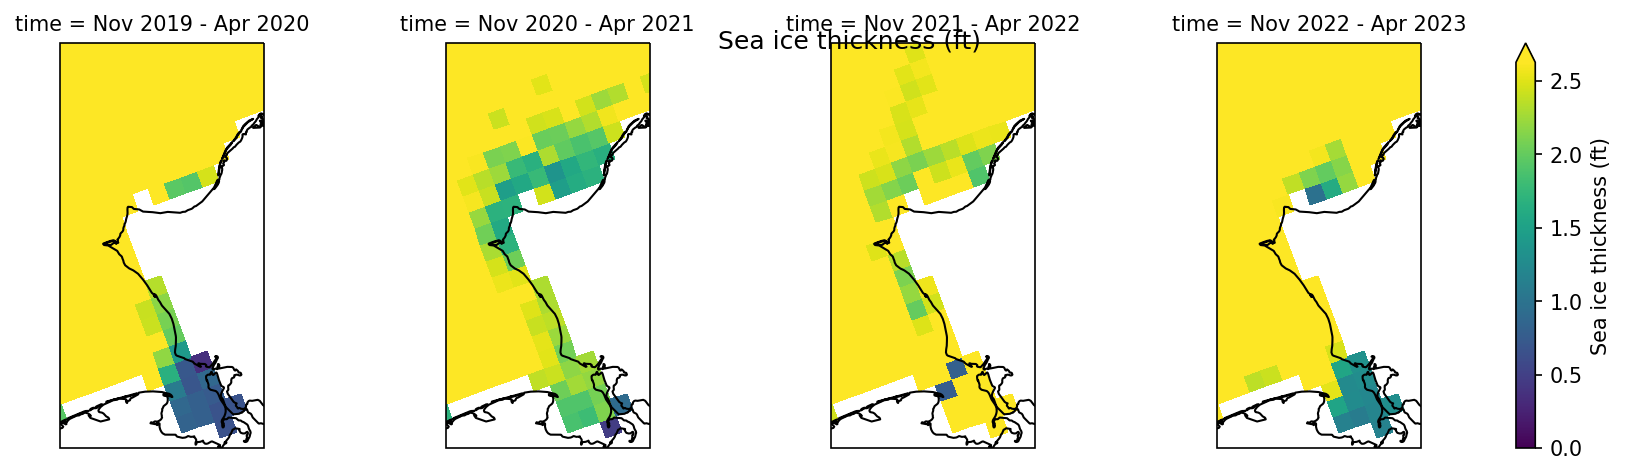

In [87]:
# Define the latitude and longitude bounds for the region around Kivalina, AK, including Point Hope and Kotzebue to give a zoomed out view
lat_bounds = [66, 71]
lon_bounds = [-167, -162]

# Plot the data, focusing on the region of interest
map_extent = [lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]]

import xarray as xr
from utils.read_data_utils import read_IS2SITMOGR4
from utils.plotting_utils import (
    static_winter_comparison_lineplot, staticArcticMaps,
    staticArcticMaps_overlayDrifts, interactiveArcticMaps,
    compute_gridcell_winter_means, interactive_winter_comparison_lineplot
)
import numpy as np
import matplotlib as mpl
import warnings
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 150
warnings.filterwarnings('ignore')

IS2SITMOGR4_all = read_IS2SITMOGR4()

# Constants for conversion
METERS_TO_FEET = 3.28084

def staticArcticMaps(data, dates, set_cbarlabel, cmap, col_wrap, vmin, vmax, out_str, map_extent=None):
    # Convert vmin and vmax from meters to feet for the colorbar scale
    vmin_feet = vmin * METERS_TO_FEET
    vmax_feet = vmax * METERS_TO_FEET

    p = data.plot(x="longitude", y="latitude", 
                  col="time", 
                  col_wrap=col_wrap, 
                  vmin=vmin_feet,  # Use the converted min value
                  vmax=vmax_feet,  # Use the converted max value
                  cmap=cmap,
                  subplot_kws={'projection': ccrs.NorthPolarStereo(central_longitude=-155)}, 
                  transform=ccrs.PlateCarree())

    for ax in p.axes.flat:
        ax.coastlines()
        if map_extent:
            ax.set_extent(map_extent, ccrs.PlateCarree())

    # Assuming p is the FacetGrid object returned by xarray.plot
    # Update the colorbar label to reflect feet instead of meters
    p.cbar.set_label(set_cbarlabel)

    plt.suptitle(set_cbarlabel)
    plt.show()

# Define the latitude and longitude bounds for the region around Kivalina, AK
lat_bounds = [66, 71]
lon_bounds = [-167, -162]

# Compute the winter means for the entire dataset
years = [2019,2020, 2021, 2022, 2023]
thickness_winter_means = compute_gridcell_winter_means(IS2SITMOGR4_all.ice_thickness_int, years=years)

# Plot the data, focusing on the region of interest
map_extent = [lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]]

# Convert the sea ice thickness data from meters to feet before plotting
thickness_winter_means_in_feet = thickness_winter_means * METERS_TO_FEET

staticArcticMaps(thickness_winter_means_in_feet, 
                 dates=thickness_winter_means_in_feet.time.values, 
                 set_cbarlabel="Sea ice thickness (ft)",  # Updated label
                 cmap="viridis", 
                 col_wrap=4, 
                 vmin=0,  # Minimum value in feet, which remains 0
                 vmax=0.8,  # Maximum value in meters, which will be converted inside the function
                 out_str='thickness_winter_region_2018_2023',
                 map_extent=map_extent)



In [88]:
# January Ice Thickness - 10 miles west from Kivalina 
import numpy as np
import xarray as xr

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

# Kivalina coordinates
kivalina_longitude = -164.5636
kivalina_latitude = 67.7316

# Define the conversion from miles to degrees (approximation)
MILES_TO_DEGREES_LONG = 1 / (np.cos(np.radians(kivalina_latitude)) * 69)

# Calculate the longitude 10 miles west of Kivalina
longitude_10m_west = kivalina_longitude - (10 * MILES_TO_DEGREES_LONG)

# Function to find the index of the grid cell that is closest to a given latitude and longitude
def find_nearest_grid_cell(latitudes, longitudes, lat_point, lon_point):
    # Calculate the absolute difference between each grid cell's coordinates and the given point
    absolute_diff_lat = np.abs(latitudes - lat_point)
    absolute_diff_lon = np.abs(longitudes - lon_point)

    # Combine the differences into a single distance measure
    distance = np.sqrt(absolute_diff_lat**2 + absolute_diff_lon**2)

    # Find the index of the minimum distance
    return np.unravel_index(np.argmin(distance, axis=None), distance.shape)

# Get the latitude and longitude values from the dataset
latitudes = IS2SITMOGR4_all['latitude'].values
longitudes = IS2SITMOGR4_all['longitude'].values

# Find the grid cell closest to the point 10 miles west of Kivalina
nearest_y, nearest_x = find_nearest_grid_cell(latitudes, longitudes, kivalina_latitude, longitude_10m_west)

# Initialize a dictionary to hold the results
thickness_values = {}

# Loop through each January from 2019 to 2023
for year in range(2019, 2024):
    # Select the data for January of the given year
    january_data = IS2SITMOGR4_all.sel(time=IS2SITMOGR4_all['time'].dt.month == 1)
    year_data = january_data.sel(time=january_data['time'].dt.year == year)

    # Check if there is valid data for the year
    if year_data.sizes['time'] > 0:
        # Get the sea ice thickness value for the nearest grid cell in January
        # We use .isel to index by position and then extract the values
        sea_ice_thickness_value = year_data.isel(x=nearest_x, y=nearest_y).ice_thickness_int.values * METERS_TO_FEET

        # Handle potential NaN values and summarize the results
        if np.isnan(sea_ice_thickness_value).all():
            print(f"No valid data for the grid cell 10 miles west of Kivalina for January {year}.")
        else:
            # Calculate the average thickness for January if there are multiple measurements
            average_thickness = np.nanmean(sea_ice_thickness_value)
            thickness_values[year] = average_thickness
            print(f"Average sea ice thickness 10 miles west of Kivalina for January {year}: {average_thickness:.2f} feet")
    else:
        print(f"No data available for January {year}.")

# Output the results
print("\nSea ice thickness 10 miles west of Kivalina for January (2019-2023):")
for year, thickness in thickness_values.items():
    print(f"{year}: {thickness:.2f} feet")


Average sea ice thickness 10 miles west of Kivalina for January 2019: 2.89 feet
Average sea ice thickness 10 miles west of Kivalina for January 2020: 0.84 feet
Average sea ice thickness 10 miles west of Kivalina for January 2021: 0.36 feet
Average sea ice thickness 10 miles west of Kivalina for January 2022: 2.99 feet
No valid data for the grid cell 10 miles west of Kivalina for January 2023.

Sea ice thickness 10 miles west of Kivalina for January (2019-2023):
2019: 2.89 feet
2020: 0.84 feet
2021: 0.36 feet
2022: 2.99 feet


Average sea ice thickness near Kivalina for January 2019: 2.46 feet
Average sea ice thickness near Kivalina for January 2020: 0.66 feet
Average sea ice thickness near Kivalina for January 2021: 0.67 feet
Average sea ice thickness near Kivalina for January 2022: 3.05 feet
Average sea ice thickness near Kivalina for January 2023: 2.54 feet


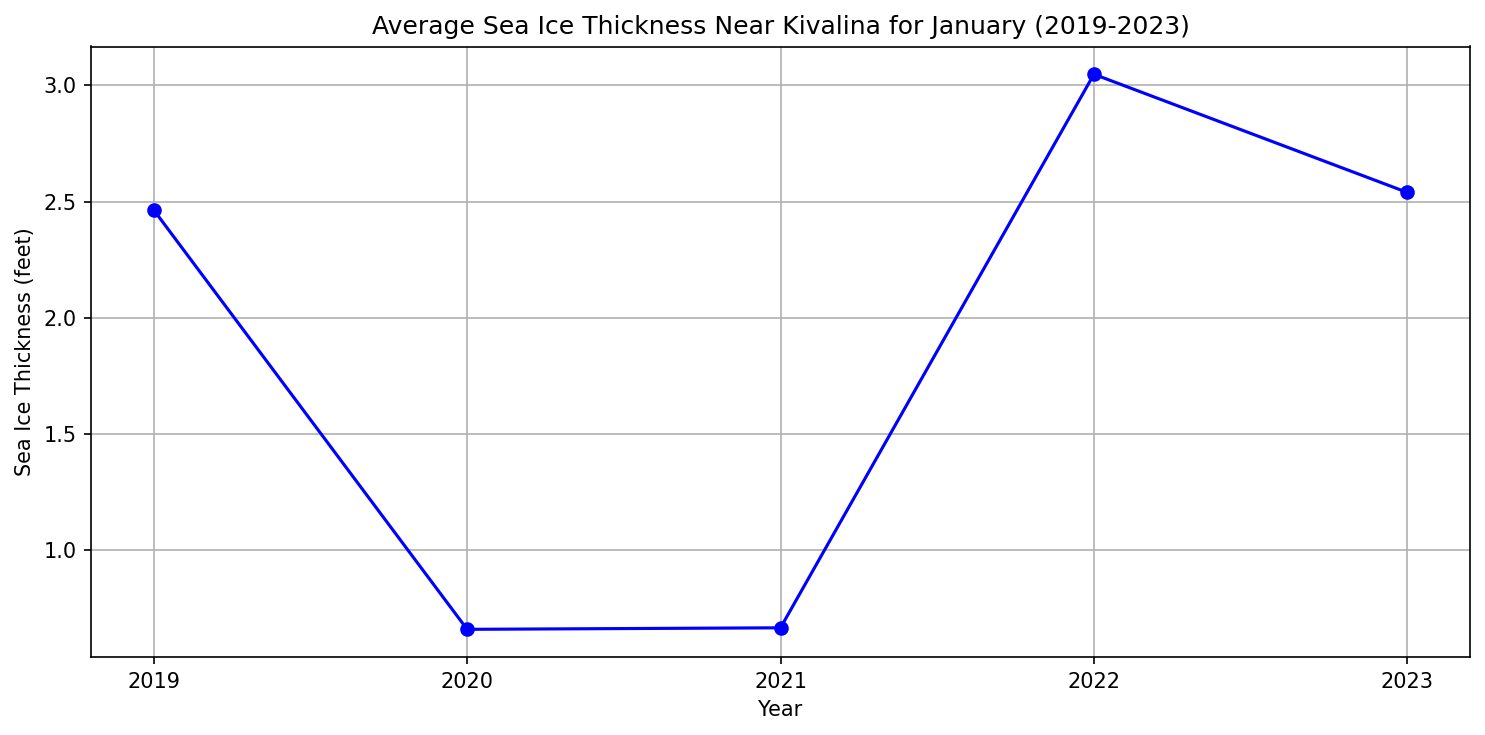

In [89]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

# Kivalina coordinates
kivalina_longitude = -164.5636
kivalina_latitude = 67.7316

# Function to find the indices of the two closest grid cells to a given point
def find_two_closest_grid_cells(latitudes, longitudes, lat_point, lon_point):
    # Calculate the distance from each point to Kivalina
    distances = np.sqrt((latitudes - lat_point)**2 + (longitudes - lon_point)**2)
    
    # Find the indices of the two smallest distances
    idx_closest = np.unravel_index(np.argsort(distances, axis=None)[:2], distances.shape)
    return idx_closest

# Load your dataset here
# IS2SITMOGR4_all = xr.open_dataset('path_to_your_dataset.nc') # Uncomment and set your dataset

# Get the latitude and longitude values from the dataset
latitudes = IS2SITMOGR4_all['latitude'].values
longitudes = IS2SITMOGR4_all['longitude'].values

# Find the indices of the two closest grid cells to Kivalina
idx_closest_cells = find_two_closest_grid_cells(latitudes, longitudes, kivalina_latitude, kivalina_longitude)

# Initialize lists to hold the years and the corresponding average thickness values
years = []
average_thickness_values = []

# Loop through each January from 2019 to 2023 and collect data
for year in range(2019, 2024):
    # Select the data for January of the given year
    january_data = IS2SITMOGR4_all.sel(time=IS2SITMOGR4_all['time'].dt.month == 1)
    year_data = january_data.sel(time=january_data['time'].dt.year == year)

    if year_data.sizes['time'] > 0:
        # Extract values for the two closest grid cells
        values = year_data.isel(x=xr.DataArray(idx_closest_cells[1], dims="points"), 
                                y=xr.DataArray(idx_closest_cells[0], dims="points")).ice_thickness_int.values
        
        # Convert from meters to feet and average the values
        average_thickness = np.nanmean(values) * METERS_TO_FEET
        years.append(year)
        average_thickness_values.append(average_thickness)
        print(f"Average sea ice thickness near Kivalina for January {year}: {average_thickness:.2f} feet")
    else:
        print(f"No data available for January {year}.")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(years, average_thickness_values, marker='o', linestyle='-', color='blue')
plt.title('Average Sea Ice Thickness Near Kivalina for January (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Sea Ice Thickness (feet)')
plt.grid(True)
plt.xticks(years)  # Ensure only the years in the dataset are used as x-ticks
plt.tight_layout()
plt.show()


Average sea ice thickness near Kivalina for February 2019: 2.19 feet
Average sea ice thickness near Kivalina for February 2020: 3.71 feet
Average sea ice thickness near Kivalina for February 2021: 1.35 feet
Average sea ice thickness near Kivalina for February 2022: 4.99 feet
Average sea ice thickness near Kivalina for February 2023: 2.76 feet


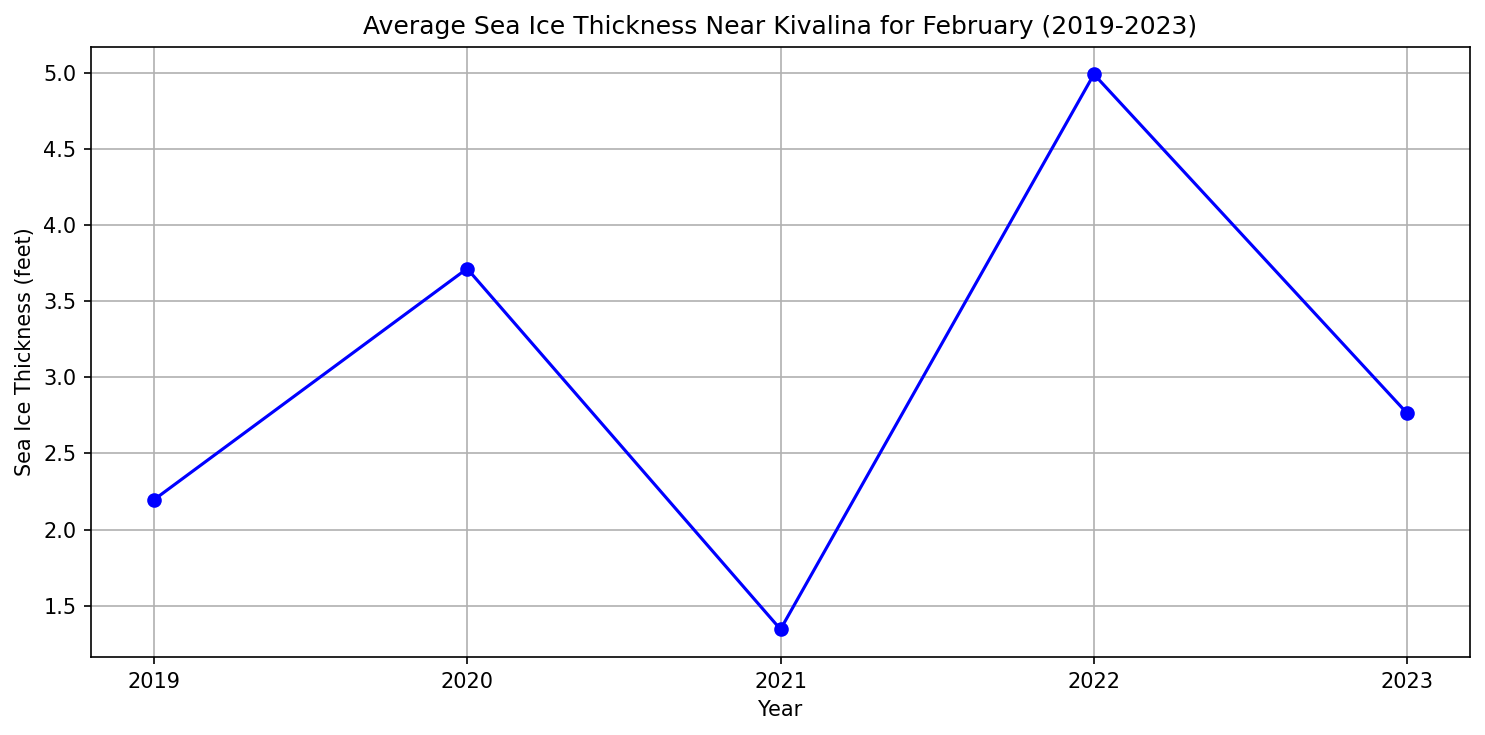

In [90]:
#February Ice Thickness 
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

# Kivalina coordinates
kivalina_longitude = -164.5636
kivalina_latitude = 67.7316

# Function to find the indices of the two closest grid cells to a given point
def find_two_closest_grid_cells(latitudes, longitudes, lat_point, lon_point):
    # Calculate the distance from each point to Kivalina
    distances = np.sqrt((latitudes - lat_point)**2 + (longitudes - lon_point)**2)
    
    # Find the indices of the two smallest distances
    idx_closest = np.unravel_index(np.argsort(distances, axis=None)[:2], distances.shape)
    return idx_closest

# Load your dataset here
# IS2SITMOGR4_all = xr.open_dataset('path_to_your_dataset.nc') # Uncomment and set your dataset

# Get the latitude and longitude values from the dataset
latitudes = IS2SITMOGR4_all['latitude'].values
longitudes = IS2SITMOGR4_all['longitude'].values

# Find the indices of the two closest grid cells to Kivalina
idx_closest_cells = find_two_closest_grid_cells(latitudes, longitudes, kivalina_latitude, kivalina_longitude)

# Initialize lists to hold the years and the corresponding average thickness values
years = []
average_thickness_values = []

# Loop through each February from 2019 to 2023 and collect data
for year in range(2019, 2024):
    # Select the data for February of the given year
    february_data = IS2SITMOGR4_all.sel(time=IS2SITMOGR4_all['time'].dt.month == 2)
    year_data = february_data.sel(time=february_data['time'].dt.year == year)

    if year_data.sizes['time'] > 0:
        # Extract values for the two closest grid cells
        values = year_data.isel(x=xr.DataArray(idx_closest_cells[1], dims="points"), 
                                y=xr.DataArray(idx_closest_cells[0], dims="points")).ice_thickness_int.values
        
        # Convert from meters to feet and average the values
        average_thickness = np.nanmean(values) * METERS_TO_FEET
        years.append(year)
        average_thickness_values.append(average_thickness)
        print(f"Average sea ice thickness near Kivalina for February {year}: {average_thickness:.2f} feet")
    else:
        print(f"No data available for February {year}.")

# Plotting the results for February
plt.figure(figsize=(10, 5))
plt.plot(years, average_thickness_values, marker='o', linestyle='-', color='blue')
plt.title('Average Sea Ice Thickness Near Kivalina for February (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Sea Ice Thickness (feet)')
plt.grid(True)
plt.xticks(years)  # Ensure only the years in the dataset are used as x-ticks
plt.tight_layout()
plt.show()


Average sea ice thickness near Kivalina for March 2019: 0.75 feet
Average sea ice thickness near Kivalina for March 2020: 2.98 feet
Average sea ice thickness near Kivalina for March 2021: 1.76 feet
Average sea ice thickness near Kivalina for March 2022: 1.04 feet
Average sea ice thickness near Kivalina for March 2023: 5.74 feet


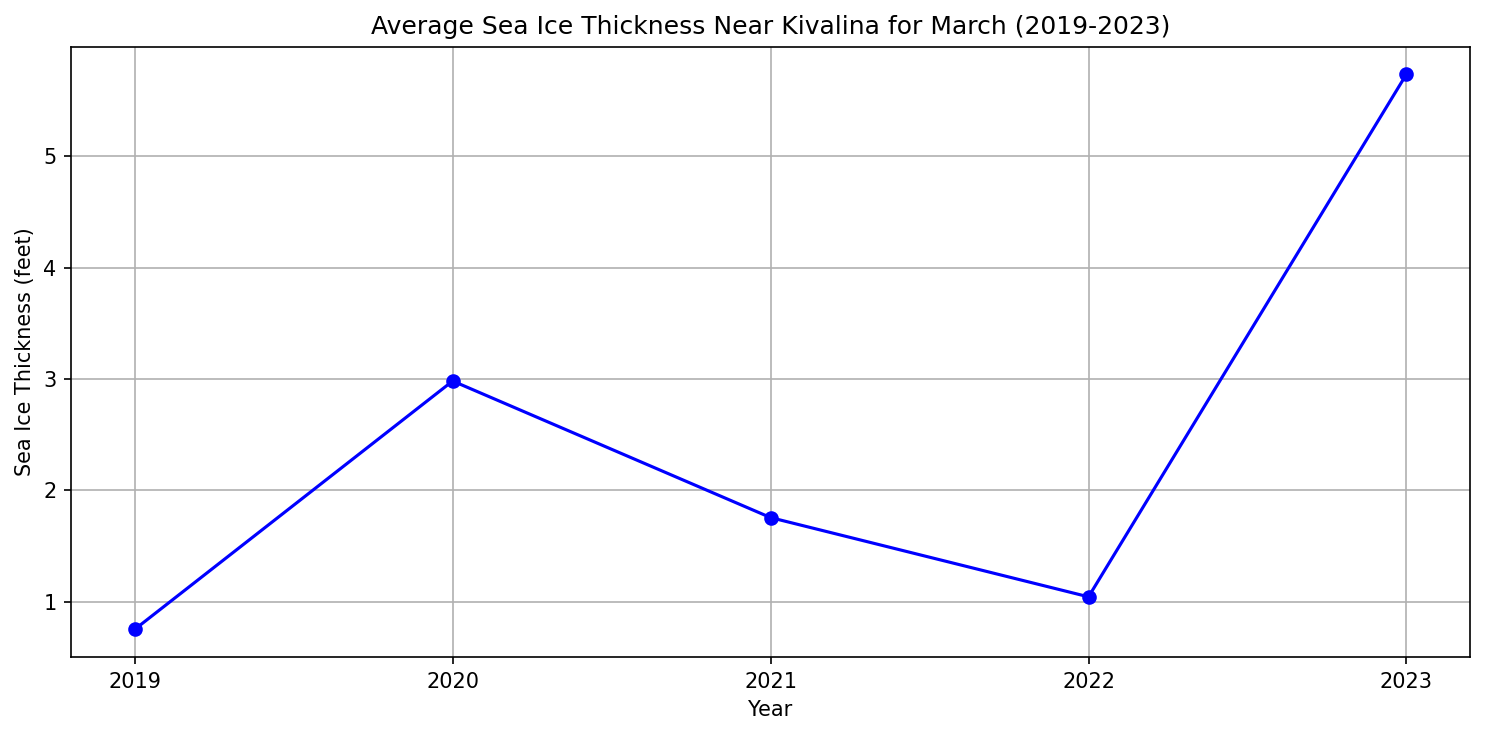

In [91]:
#March Thickness
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

# Kivalina coordinates
kivalina_longitude = -164.5636
kivalina_latitude = 67.7316

# Function to find the indices of the two closest grid cells to a given point
def find_two_closest_grid_cells(latitudes, longitudes, lat_point, lon_point):
    # Calculate the distance from each point to Kivalina
    distances = np.sqrt((latitudes - lat_point)**2 + (longitudes - lon_point)**2)
    
    # Find the indices of the two smallest distances
    idx_closest = np.unravel_index(np.argsort(distances, axis=None)[:2], distances.shape)
    return idx_closest

# Load your dataset here
# IS2SITMOGR4_all = xr.open_dataset('path_to_your_dataset.nc') # Uncomment and set your dataset

# Get the latitude and longitude values from the dataset
latitudes = IS2SITMOGR4_all['latitude'].values
longitudes = IS2SITMOGR4_all['longitude'].values

# Find the indices of the two closest grid cells to Kivalina
idx_closest_cells = find_two_closest_grid_cells(latitudes, longitudes, kivalina_latitude, kivalina_longitude)

# Initialize lists to hold the years and the corresponding average thickness values
years = []
average_thickness_values = []

# Loop through each March from 2019 to 2023 and collect data
for year in range(2019, 2024):
    # Select the data for March of the given year
    march_data = IS2SITMOGR4_all.sel(time=IS2SITMOGR4_all['time'].dt.month == 3)
    year_data = march_data.sel(time=march_data['time'].dt.year == year)

    if year_data.sizes['time'] > 0:
        # Extract values for the two closest grid cells
        values = year_data.isel(x=xr.DataArray(idx_closest_cells[1], dims="points"), 
                                y=xr.DataArray(idx_closest_cells[0], dims="points")).ice_thickness_int.values
        
        # Convert from meters to feet and average the values
        average_thickness = np.nanmean(values) * METERS_TO_FEET
        years.append(year)
        average_thickness_values.append(average_thickness)
        print(f"Average sea ice thickness near Kivalina for March {year}: {average_thickness:.2f} feet")
    else:
        print(f"No data available for March {year}.")

# Plotting the results for March
plt.figure(figsize=(10, 5))
plt.plot(years, average_thickness_values, marker='o', linestyle='-', color='blue')
plt.title('Average Sea Ice Thickness Near Kivalina for March (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Sea Ice Thickness (feet)')
plt.grid(True)
plt.xticks(years)  # Ensure only the years in the dataset are used as x-ticks
plt.tight_layout()
plt.show()


Average sea ice thickness near Kivalina for April 2019: 1.01 feet
Average sea ice thickness near Kivalina for April 2020: 2.80 feet
Average sea ice thickness near Kivalina for April 2021: 2.82 feet
Average sea ice thickness near Kivalina for April 2022: 1.02 feet
Average sea ice thickness near Kivalina for April 2023: 2.90 feet


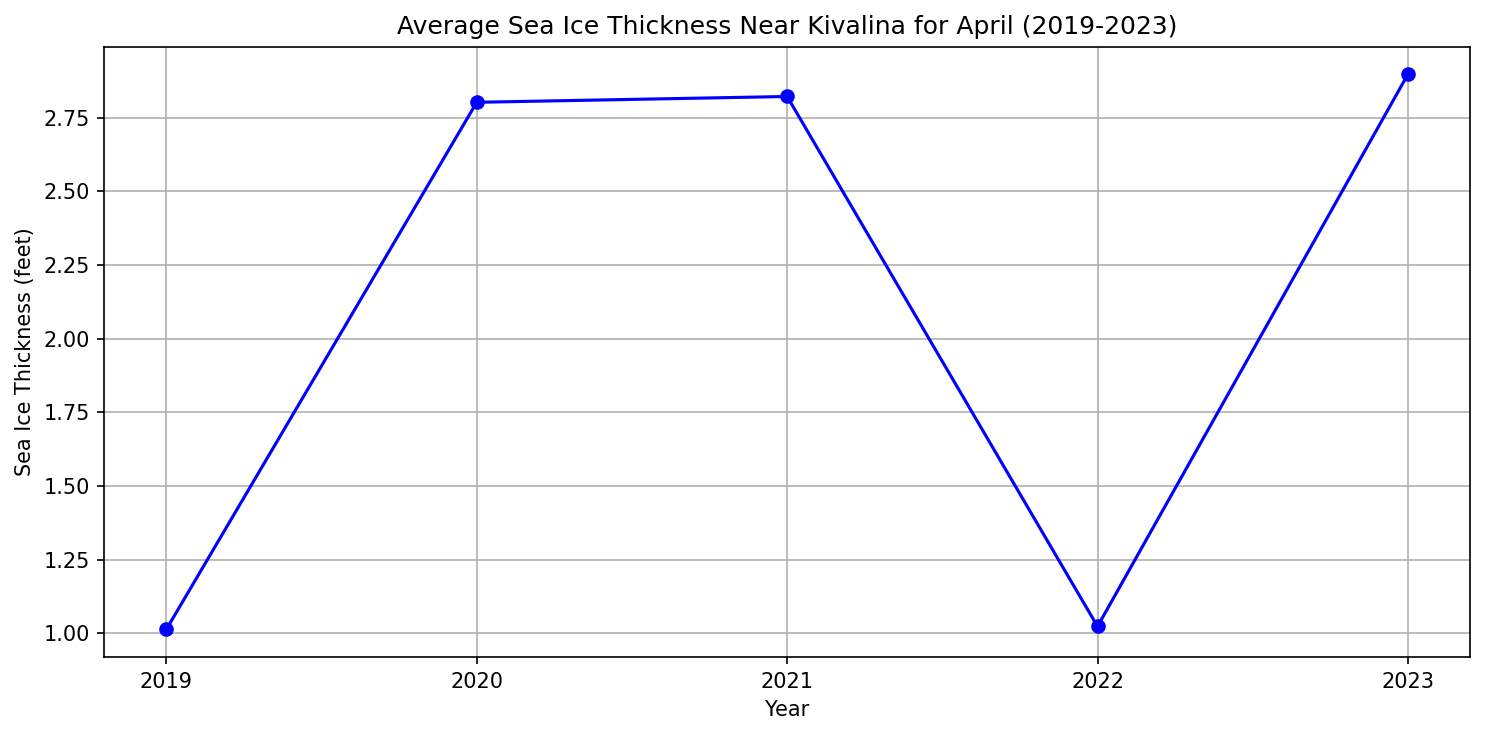

In [92]:
#April Thickness
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

# Kivalina coordinates
kivalina_longitude = -164.5636
kivalina_latitude = 67.7316

# Function to find the indices of the two closest grid cells to a given point
def find_two_closest_grid_cells(latitudes, longitudes, lat_point, lon_point):
    # Calculate the distance from each point to Kivalina
    distances = np.sqrt((latitudes - lat_point)**2 + (longitudes - lon_point)**2)
    
    # Find the indices of the two smallest distances
    idx_closest = np.unravel_index(np.argsort(distances, axis=None)[:2], distances.shape)
    return idx_closest

# Load your dataset here
# IS2SITMOGR4_all = xr.open_dataset('path_to_your_dataset.nc') # Uncomment and set your dataset

# Get the latitude and longitude values from the dataset
latitudes = IS2SITMOGR4_all['latitude'].values
longitudes = IS2SITMOGR4_all['longitude'].values

# Find the indices of the two closest grid cells to Kivalina
idx_closest_cells = find_two_closest_grid_cells(latitudes, longitudes, kivalina_latitude, kivalina_longitude)

# Initialize lists to hold the years and the corresponding average thickness values
years = []
average_thickness_values = []

# Loop through each April from 2019 to 2023 and collect data
for year in range(2019, 2024):
    # Select the data for April of the given year
    march_data = IS2SITMOGR4_all.sel(time=IS2SITMOGR4_all['time'].dt.month == 4)
    year_data = march_data.sel(time=march_data['time'].dt.year == year)

    if year_data.sizes['time'] > 0:
        # Extract values for the two closest grid cells
        values = year_data.isel(x=xr.DataArray(idx_closest_cells[1], dims="points"), 
                                y=xr.DataArray(idx_closest_cells[0], dims="points")).ice_thickness_int.values
        
        # Convert from meters to feet and average the values
        average_thickness = np.nanmean(values) * METERS_TO_FEET
        years.append(year)
        average_thickness_values.append(average_thickness)
        print(f"Average sea ice thickness near Kivalina for April {year}: {average_thickness:.2f} feet")
    else:
        print(f"No data available for April  {year}.")

# Plotting the results for March
plt.figure(figsize=(10, 5))
plt.plot(years, average_thickness_values, marker='o', linestyle='-', color='blue')
plt.title('Average Sea Ice Thickness Near Kivalina for April (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Sea Ice Thickness (feet)')
plt.grid(True)
plt.xticks(years)  # Ensure only the years in the dataset are used as x-ticks
plt.tight_layout()
plt.show()


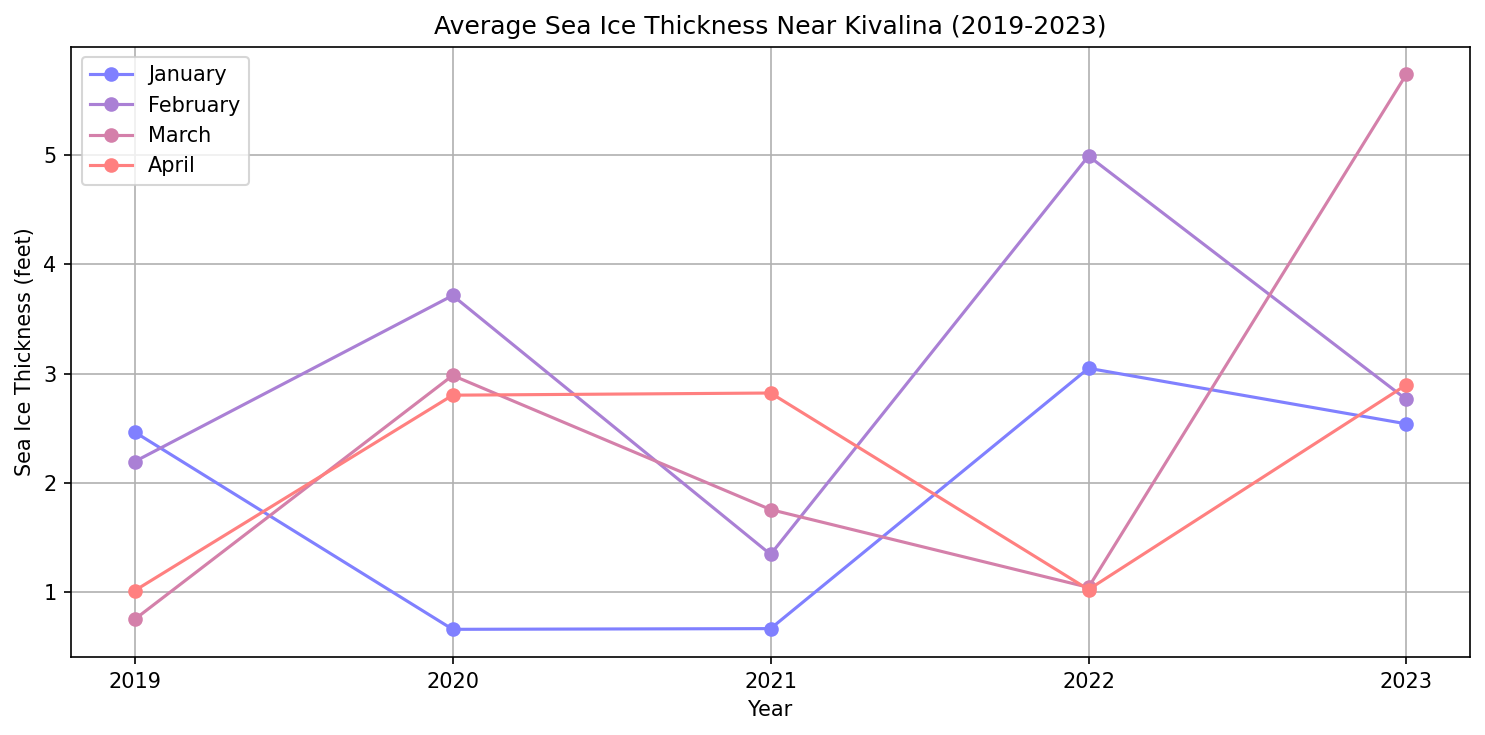

In [93]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

# Kivalina coordinates
kivalina_longitude = -164.5636
kivalina_latitude = 67.7316

# Function to find the indices of the two closest grid cells to a given point
def find_two_closest_grid_cells(latitudes, longitudes, lat_point, lon_point):
    # Calculate the distance from each point to Kivalina
    distances = np.sqrt((latitudes - lat_point)**2 + (longitudes - lon_point)**2)
    
    # Find the indices of the two smallest distances
    idx_closest = np.unravel_index(np.argsort(distances, axis=None)[:2], distances.shape)
    return idx_closest

# Load your dataset here
# IS2SITMOGR4_all = xr.open_dataset('path_to_your_dataset.nc') # Uncomment and set your dataset

# Get the latitude and longitude values from the dataset
latitudes = IS2SITMOGR4_all['latitude'].values
longitudes = IS2SITMOGR4_all['longitude'].values

# Find the indices of the two closest grid cells to Kivalina
idx_closest_cells = find_two_closest_grid_cells(latitudes, longitudes, kivalina_latitude, kivalina_longitude)

# Initialize a dictionary to hold the results for each month
thickness_values = {month: [] for month in range(1, 5)} # 1 for January, 2 for February, etc.

# Loop through each month and each year, collect data
for month in range(1, 5):
    for year in range(2019, 2024):
        # Select the data for the current month of the given year
        month_data = IS2SITMOGR4_all.sel(time=IS2SITMOGR4_all['time'].dt.month == month)
        year_data = month_data.sel(time=month_data['time'].dt.year == year)

        if year_data.sizes['time'] > 0:
            # Extract values for the two closest grid cells
            values = year_data.isel(x=xr.DataArray(idx_closest_cells[1], dims="points"), 
                                    y=xr.DataArray(idx_closest_cells[0], dims="points")).ice_thickness_int.values
            
            # Convert from meters to feet and average the values
            average_thickness = np.nanmean(values) * METERS_TO_FEET
            thickness_values[month].append(average_thickness)
        else:
            # If no data available for the month, append a NaN
            thickness_values[month].append(np.nan)

# Create a custom colormap from light blue to red
colors = [(0.5, 0.5, 1), (1, 0.5, 0.5)]  # Light blue to red
cmap_name = "custom_color_map"
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=4)  # N=4 for 4 months

# Plotting the results with the custom colormap
plt.figure(figsize=(10, 5))
labels = ['January', 'February', 'March', 'April']
years = range(2019, 2024)

for i, month in enumerate(range(1, 5)):
    plt.plot(years, thickness_values[month], marker='o', linestyle='-', color=custom_cmap(i / 3), label=labels[i])

plt.title('Average Sea Ice Thickness Near Kivalina (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Sea Ice Thickness (feet)')
plt.grid(True)
plt.xticks(list(years))
plt.legend()
plt.tight_layout()
plt.show()





In [116]:
#January formatting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

def compute_gridcell_monthly_data(data, month, year):
    monthly_data = data.sel(time=(data['time'].dt.year == year) & (data['time'].dt.month == month))
    _, index = np.unique(monthly_data['time'], return_index=True)
    monthly_data = monthly_data.isel(time=index)
    return monthly_data

# Define the region extent and other parameters for the plot
region_extent = [-168, -156, 65, 70]
central_longitude = (region_extent[0] + region_extent[1]) / 2

# Coordinates of Kivalina
kivalina_longitude = -164.5636
kivalina_latitude = 67.7316

# Create a figure for the subplots
fig = plt.figure(figsize=(15, 22))

# Define the number of plots based on the years of data you have
years = [2018, 2019, 2020, 2021, 2022, 2023]
num_plots = len(years)
num_cols = 2
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

# Loop through each year and create a plot for March
for i, year in enumerate(years):
    ax = fig.add_subplot(num_rows, num_cols, i + 1, projection=ccrs.NorthPolarStereo(central_longitude=central_longitude))
    monthly_data = compute_gridcell_monthly_data(IS2SITMOGR4_all.ice_thickness_int, 1, year)

    if monthly_data.sizes['time'] > 0:
        ax.set_extent(region_extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')

        sea_ice_thickness_in_feet = monthly_data.values.squeeze() * METERS_TO_FEET

        sea_ice_plot = ax.pcolormesh(
            monthly_data['longitude'], 
            monthly_data['latitude'], 
            sea_ice_thickness_in_feet,
            transform=ccrs.PlateCarree(),
            cmap='coolwarm',
            vmin=0, 
            vmax=6
        )

        ax.plot(kivalina_longitude, kivalina_latitude, marker='o', markersize=10, color='red', transform=ccrs.PlateCarree())
        ax.set_title(f'Sea Ice Thickness - January {year}')

# Add a colorbar to the right of the subplots
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.825, 0.15, 0.025, 0.7])
fig.colorbar(sea_ice_plot, cax=cbar_ax, orientation='vertical', extend='both').set_label('Sea Ice Thickness (ft)')

# Adjust the layout to make room for the colorbar
plt.tight_layout(rect=[0, 0, 0.8, 1])

# Save the figure to a file
plt.savefig('sea_ice_thickness_maps.png', dpi=300, bbox_inches='tight')
plt.close(fig)


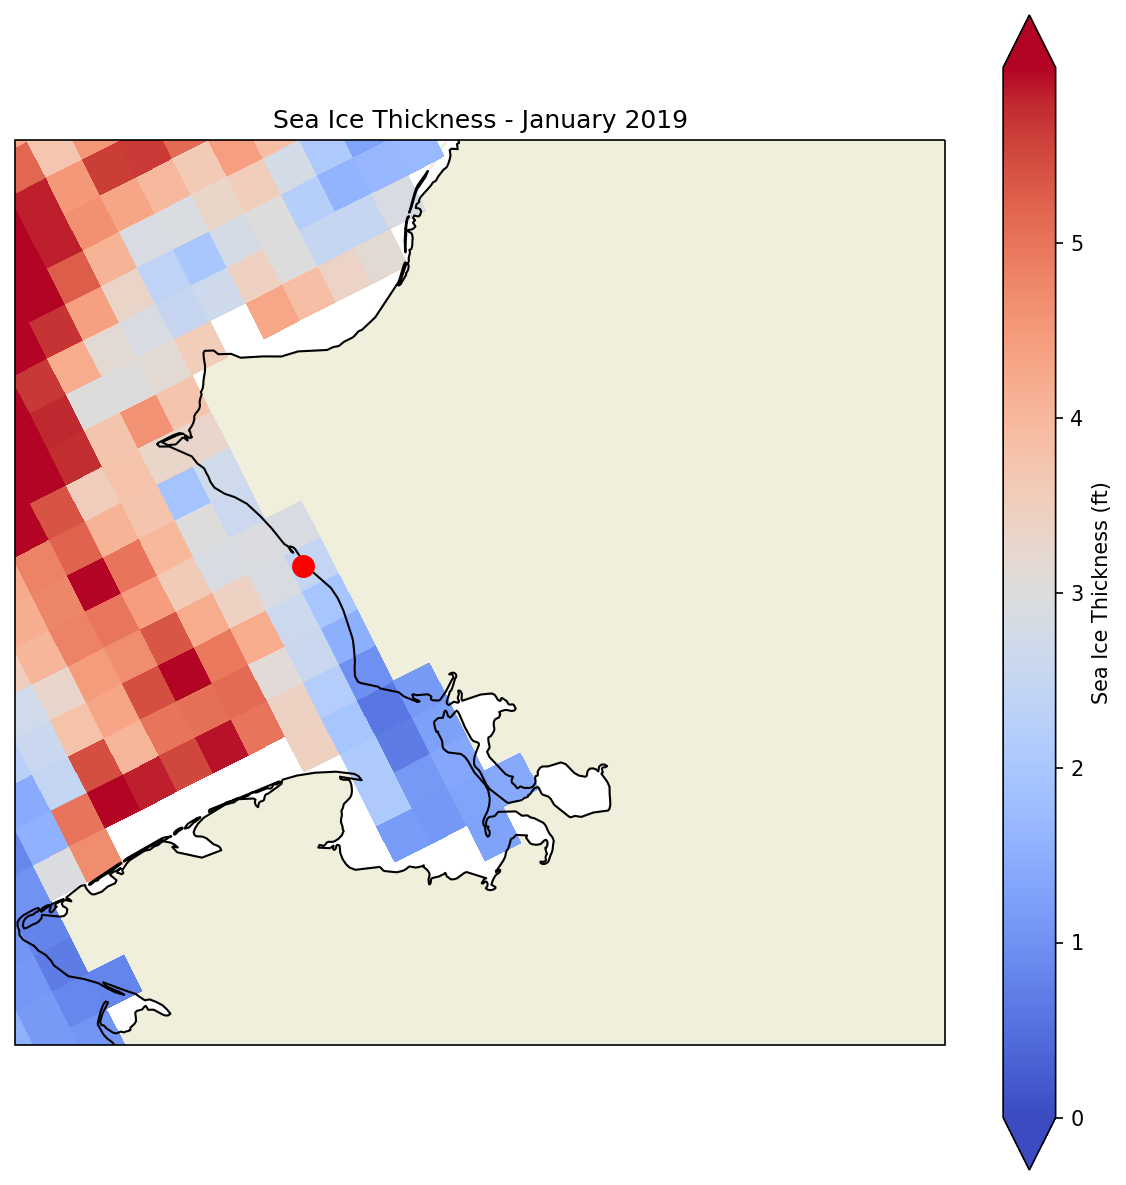

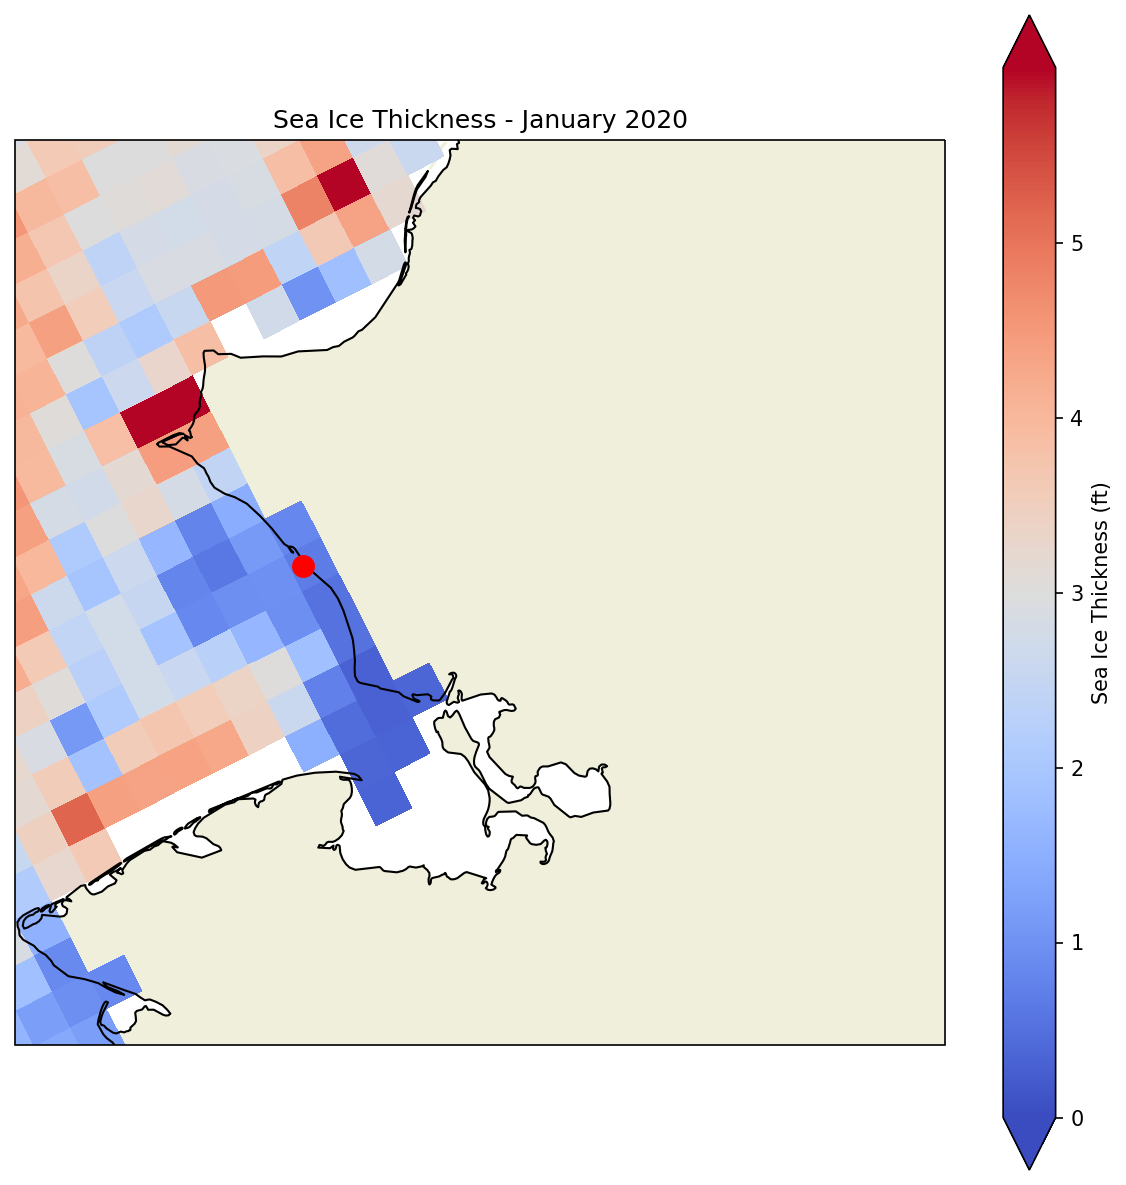

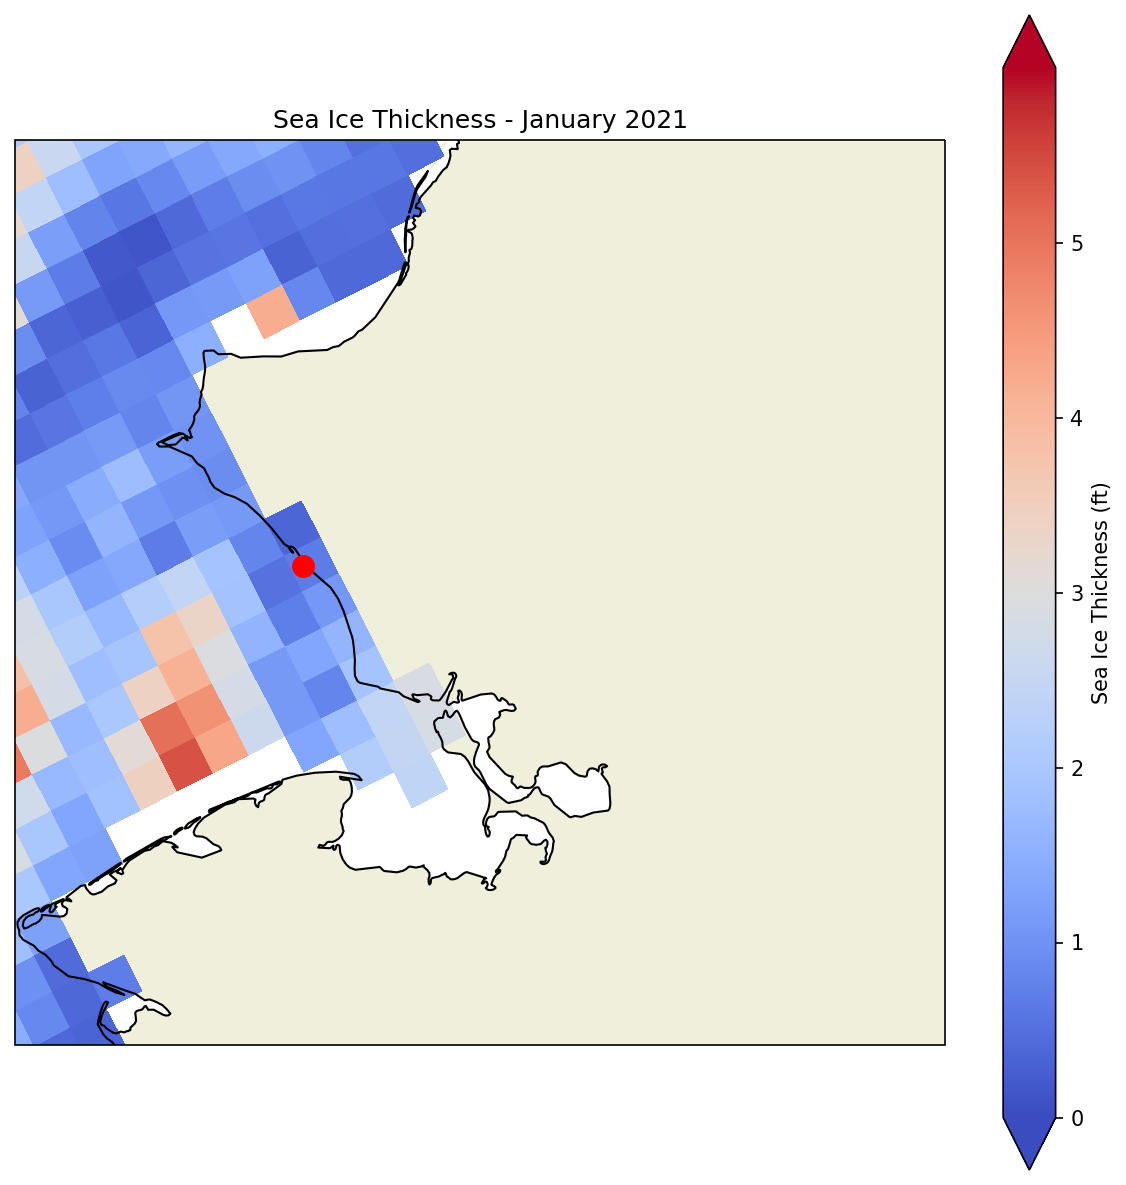

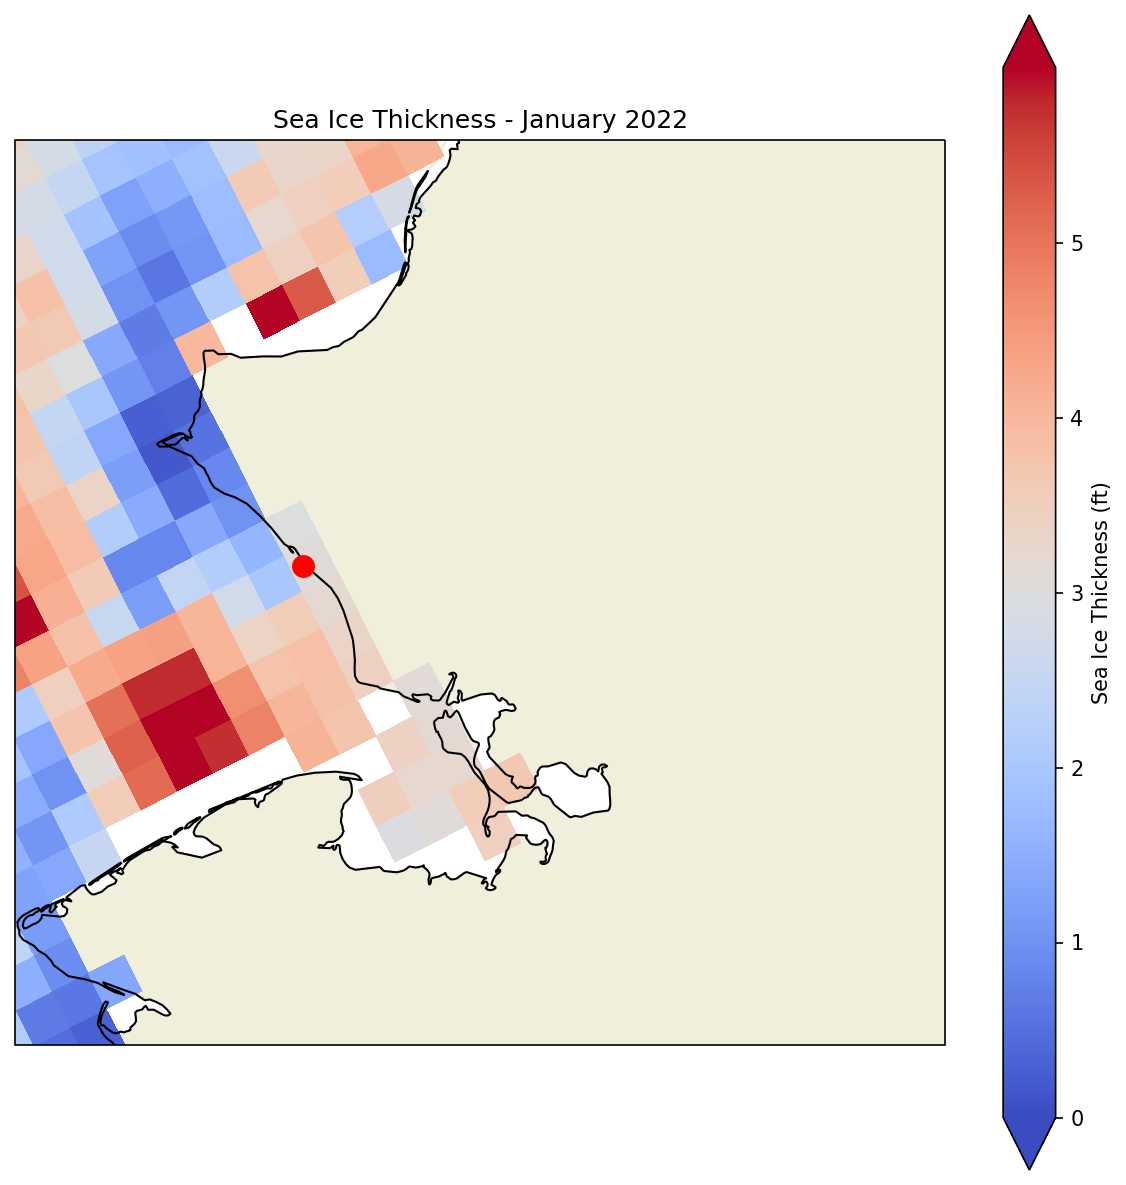

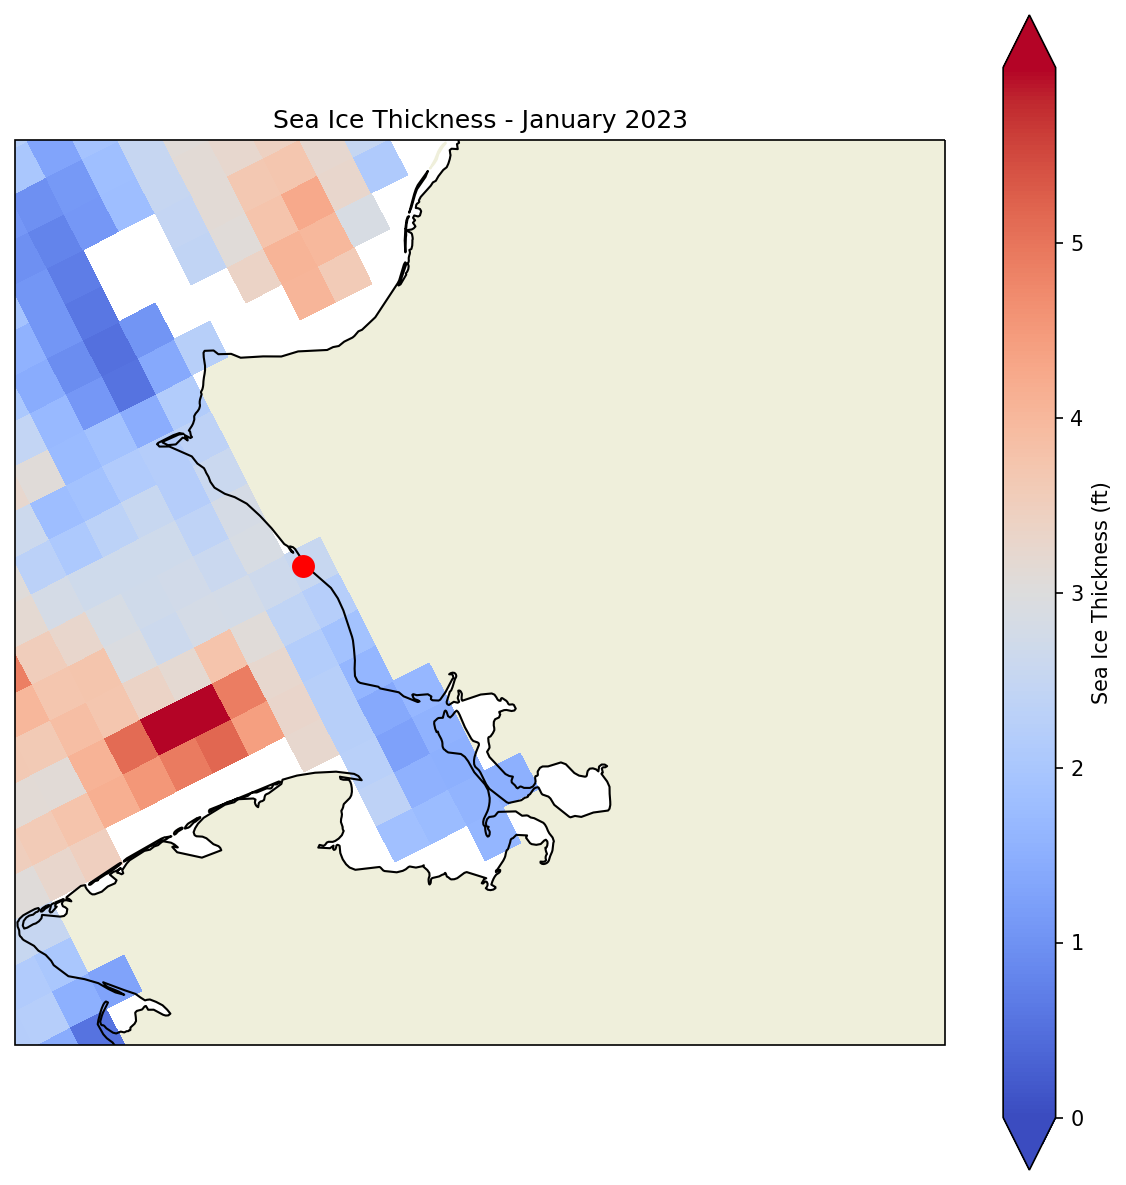

In [95]:
##January Static Maps

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

def compute_gridcell_monthly_data(data, month, year):
    monthly_data = data.sel(time=(data['time'].dt.year == year) & (data['time'].dt.month == month))
    
    # Drop non-unique times (this step might remove some data, so use cautiously)
    _, index = np.unique(monthly_data['time'], return_index=True)
    monthly_data = monthly_data.isel(time=index)
    
    return monthly_data

# Assuming 'freeboard_winter_means' has already been processed to have the correct time format
# Define the region extent and other parameters for the plot
region_extent = [-168, -156, 65, 70]  # [west, east, south, north]
projection = ccrs.NorthPolarStereo(central_longitude=(region_extent[0] + region_extent[1]) / 2)

# Coordinates of Kivalina
kivalina_longitude = -164.5636  # Replace with the actual longitude of Kivalina
kivalina_latitude = 67.7316  # Replace with the actual latitude of Kivalina

# Loop through each year and create a plot for January
years = [2018, 2019, 2020, 2021, 2022, 2023]
for year in years:
    # Assuming you have a way to compute or select the data for January of each year
    monthly_data = compute_gridcell_monthly_data(IS2SITMOGR4_all.ice_thickness_int, 1, year)

    # Proceed only if there's data for the given January
    if monthly_data.sizes['time'] > 0:
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': projection})
        ax.set_extent(region_extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')

        # Convert the sea ice thickness data from meters to feet
        sea_ice_thickness_in_feet = monthly_data.values.squeeze() * METERS_TO_FEET  # Adjust as necessary for your data's dimensions

        # Plot the data with the max value set to 5 feet
        sea_ice_plot = ax.pcolormesh(
            monthly_data['longitude'], 
            monthly_data['latitude'], 
            sea_ice_thickness_in_feet,
            transform=ccrs.PlateCarree(),
            cmap='coolwarm',
            vmin=0,  # Minimum value for the color scale
            vmax=6  # Maximum value for the color scale (5 feet)
        )

        # Add colorbar and title
        cbar = plt.colorbar(sea_ice_plot, ax=ax, orientation='vertical', extend='both')
        cbar.set_label('Sea Ice Thickness (ft)')
        cbar.set_ticks([0, 1, 2, 3, 4, 5])  # Optional: Set specific tick marks
        cbar.ax.set_yticklabels(['0', '1', '2', '3', '4', '5'])  # Optional: Format tick labels
        
        # Add a symbol for Kivalina
        ax.plot(kivalina_longitude, kivalina_latitude, marker='o', markersize=10, color='red', transform=ccrs.PlateCarree())
        
        plt.title(f'Sea Ice Thickness - January {year}')
        plt.show()


In [115]:
#March formatting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

def compute_gridcell_monthly_data(data, month, year):
    monthly_data = data.sel(time=(data['time'].dt.year == year) & (data['time'].dt.month == month))
    _, index = np.unique(monthly_data['time'], return_index=True)
    monthly_data = monthly_data.isel(time=index)
    return monthly_data

# Define the region extent and other parameters for the plot
region_extent = [-168, -156, 65, 70]
central_longitude = (region_extent[0] + region_extent[1]) / 2

# Coordinates of Kivalina
kivalina_longitude = -164.5636
kivalina_latitude = 67.7316

# Create a figure for the subplots
fig = plt.figure(figsize=(15, 22))

# Define the number of plots based on the years of data you have
years = [2018, 2019, 2020, 2021, 2022, 2023]
num_plots = len(years)
num_cols = 2
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

# Loop through each year and create a plot for March
for i, year in enumerate(years):
    ax = fig.add_subplot(num_rows, num_cols, i + 1, projection=ccrs.NorthPolarStereo(central_longitude=central_longitude))
    monthly_data = compute_gridcell_monthly_data(IS2SITMOGR4_all.ice_thickness_int, 3, year)

    if monthly_data.sizes['time'] > 0:
        ax.set_extent(region_extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')

        sea_ice_thickness_in_feet = monthly_data.values.squeeze() * METERS_TO_FEET

        sea_ice_plot = ax.pcolormesh(
            monthly_data['longitude'], 
            monthly_data['latitude'], 
            sea_ice_thickness_in_feet,
            transform=ccrs.PlateCarree(),
            cmap='coolwarm',
            vmin=0, 
            vmax=6
        )

        ax.plot(kivalina_longitude, kivalina_latitude, marker='o', markersize=10, color='red', transform=ccrs.PlateCarree())
        ax.set_title(f'Sea Ice Thickness - March {year}')

# Add a colorbar to the right of the subplots
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.825, 0.15, 0.025, 0.7])
fig.colorbar(sea_ice_plot, cax=cbar_ax, orientation='vertical', extend='both').set_label('Sea Ice Thickness (ft)')

# Adjust the layout to make room for the colorbar
plt.tight_layout(rect=[0, 0, 0.8, 1])

# Save the figure to a file
plt.savefig('sea_ice_thickness_maps.png', dpi=300, bbox_inches='tight')
plt.close(fig)


In [118]:
#February formatting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

def compute_gridcell_monthly_data(data, month, year):
    monthly_data = data.sel(time=(data['time'].dt.year == year) & (data['time'].dt.month == month))
    _, index = np.unique(monthly_data['time'], return_index=True)
    monthly_data = monthly_data.isel(time=index)
    return monthly_data

# Define the region extent and other parameters for the plot
region_extent = [-168, -156, 65, 70]
central_longitude = (region_extent[0] + region_extent[1]) / 2

# Coordinates of Kivalina
kivalina_longitude = -164.5636
kivalina_latitude = 67.7316

# Create a figure for the subplots
fig = plt.figure(figsize=(15, 22))

# Define the number of plots based on the years of data you have
years = [2018, 2019, 2020, 2021, 2022, 2023]
num_plots = len(years)
num_cols = 2
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

# Loop through each year and create a plot for March
for i, year in enumerate(years):
    ax = fig.add_subplot(num_rows, num_cols, i + 1, projection=ccrs.NorthPolarStereo(central_longitude=central_longitude))
    monthly_data = compute_gridcell_monthly_data(IS2SITMOGR4_all.ice_thickness_int, 4, year)

    if monthly_data.sizes['time'] > 0:
        ax.set_extent(region_extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')

        sea_ice_thickness_in_feet = monthly_data.values.squeeze() * METERS_TO_FEET

        sea_ice_plot = ax.pcolormesh(
            monthly_data['longitude'], 
            monthly_data['latitude'], 
            sea_ice_thickness_in_feet,
            transform=ccrs.PlateCarree(),
            cmap='coolwarm',
            vmin=0, 
            vmax=6
        )

        ax.plot(kivalina_longitude, kivalina_latitude, marker='o', markersize=10, color='red', transform=ccrs.PlateCarree())
        ax.set_title(f'Sea Ice Thickness - April{year}')

# Add a colorbar to the right of the subplots
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.825, 0.15, 0.025, 0.7])
fig.colorbar(sea_ice_plot, cax=cbar_ax, orientation='vertical', extend='both').set_label('Sea Ice Thickness (ft)')

# Adjust the layout to make room for the colorbar
plt.tight_layout(rect=[0, 0, 0.8, 1])

# Save the figure to a file
plt.savefig('sea_ice_thickness_maps.apr.png', dpi=300, bbox_inches='tight')
plt.close(fig)


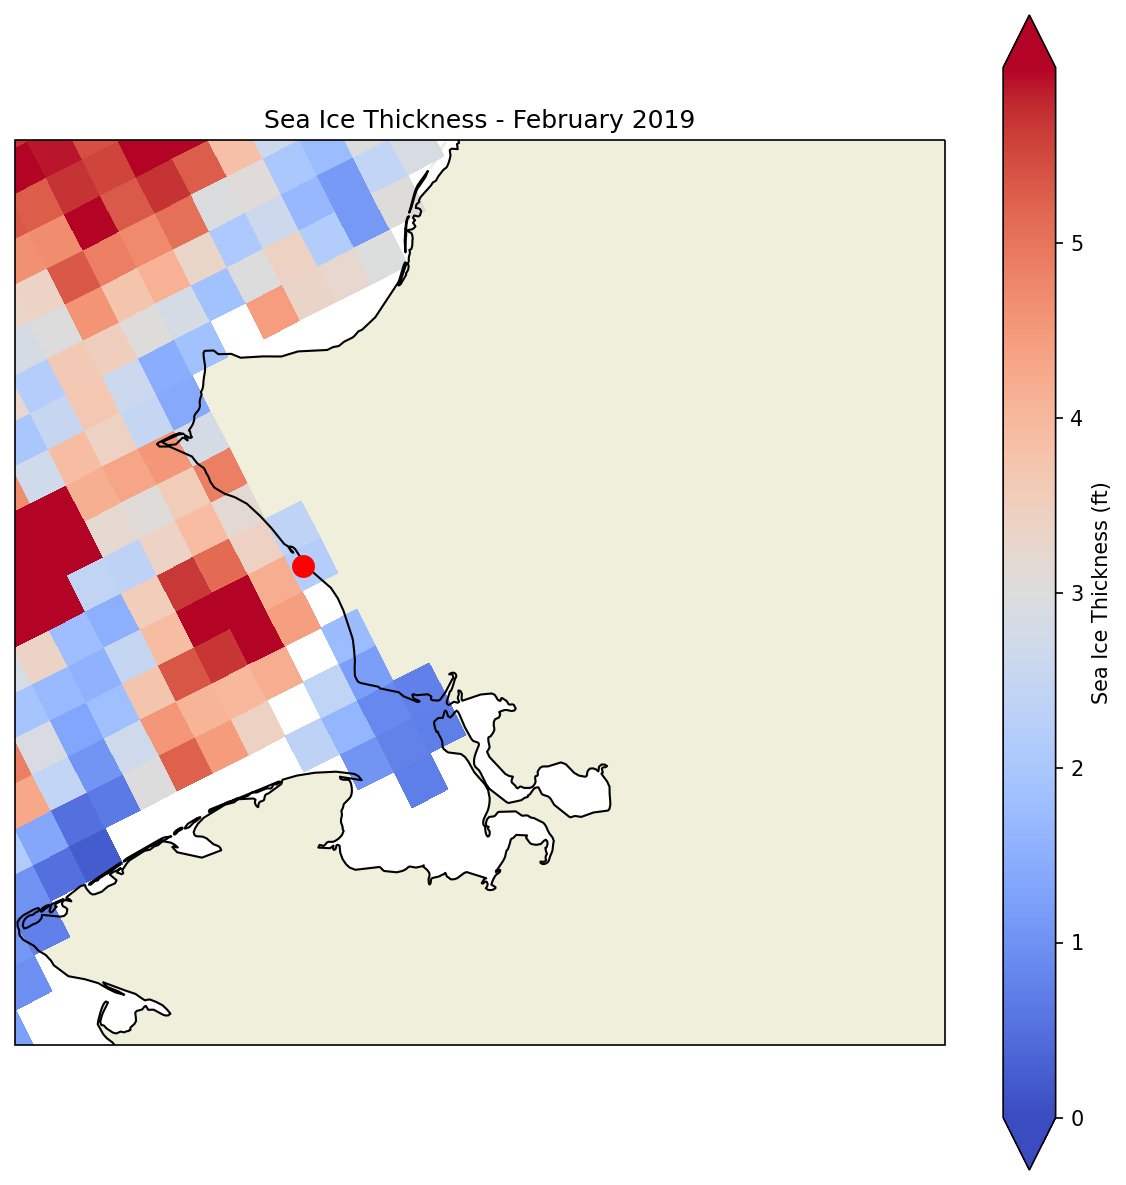

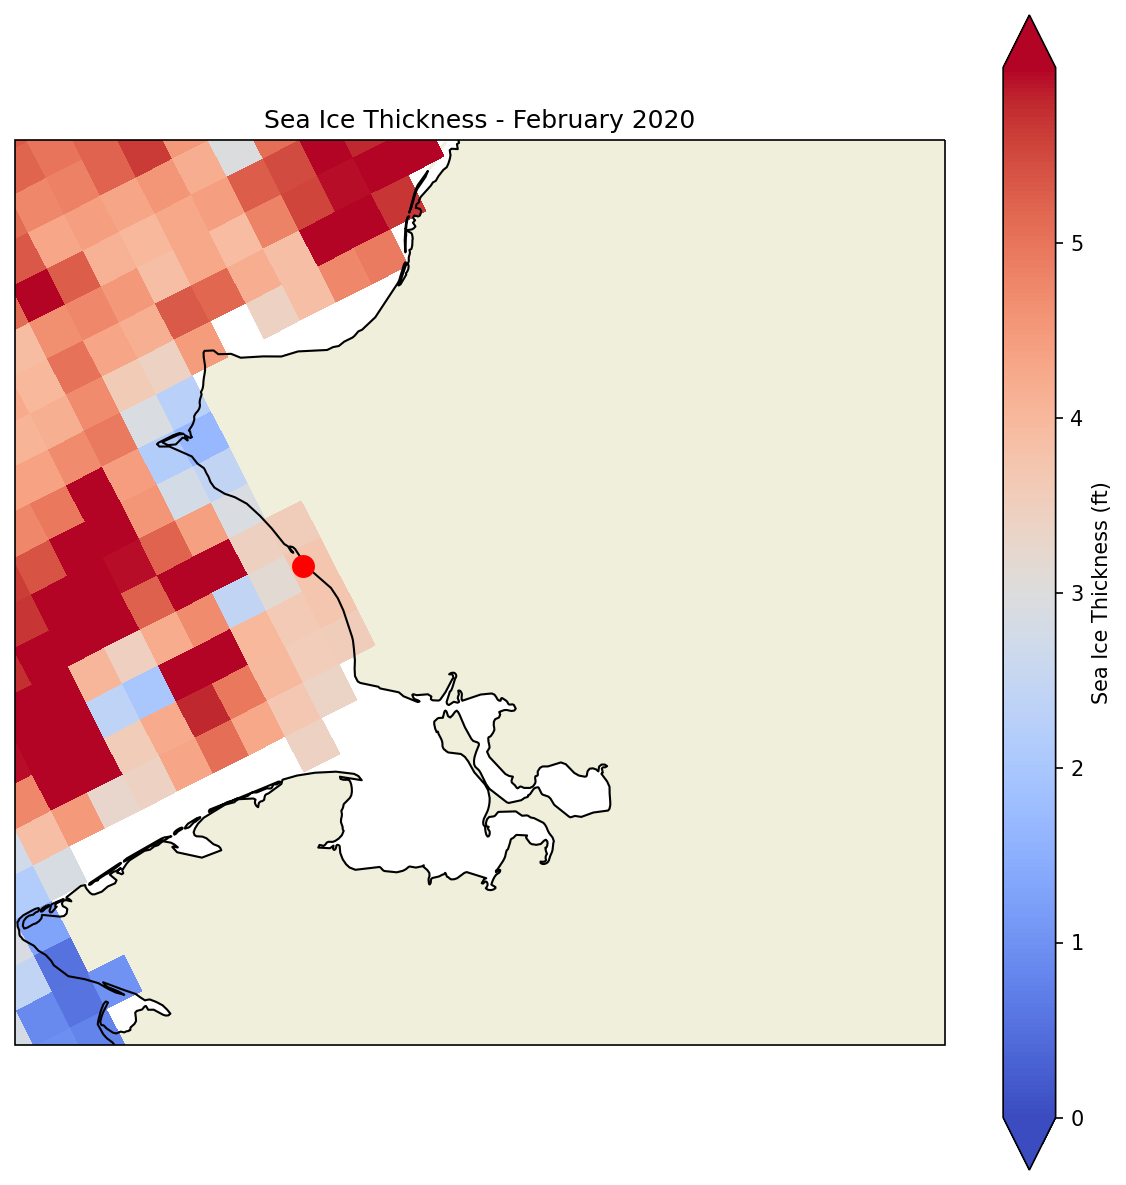

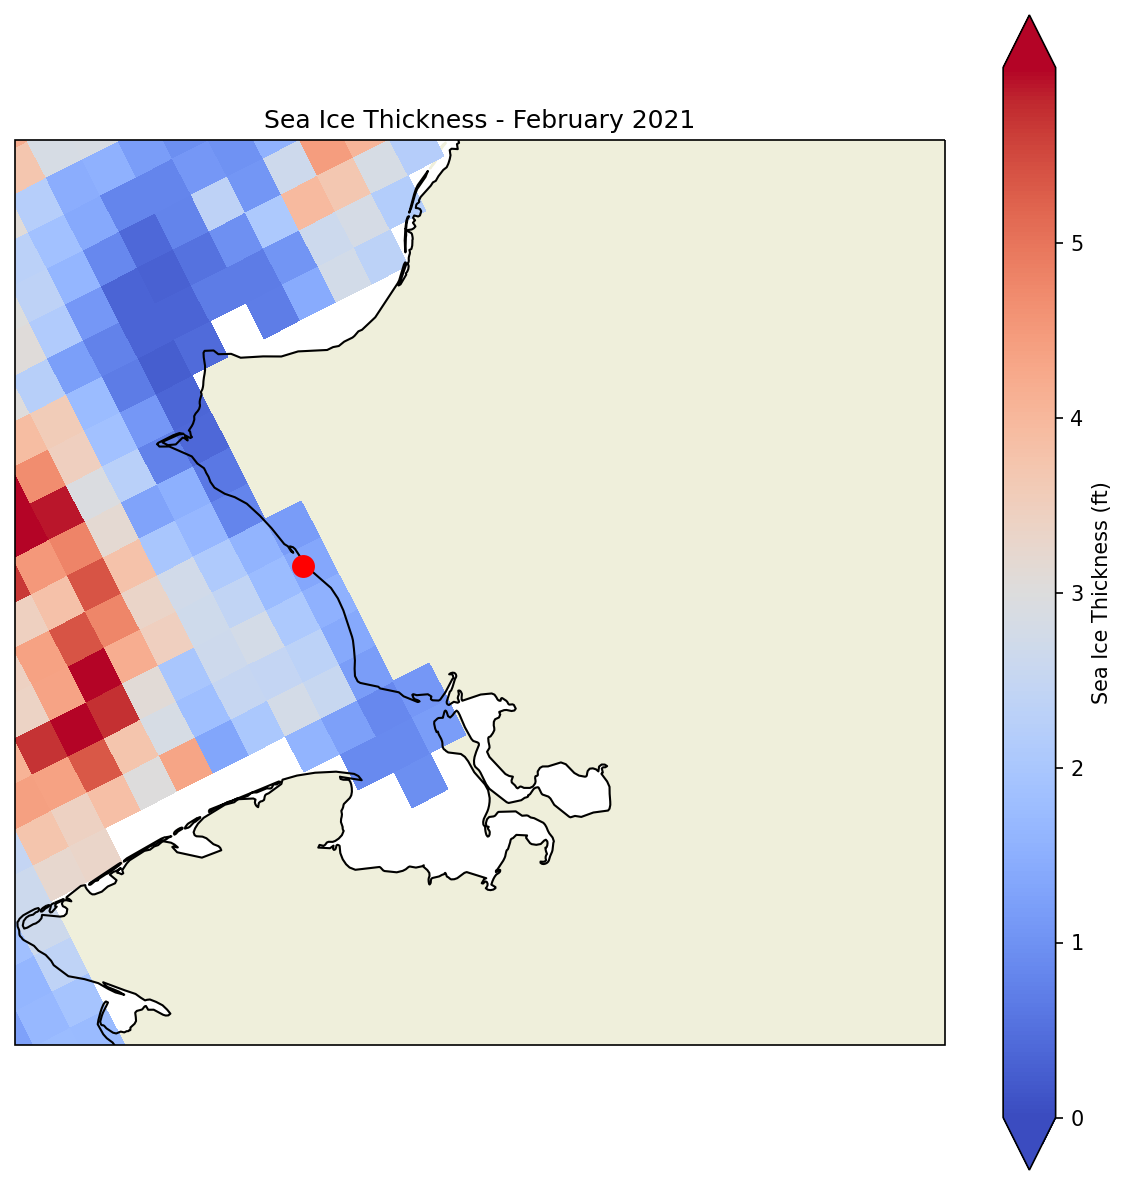

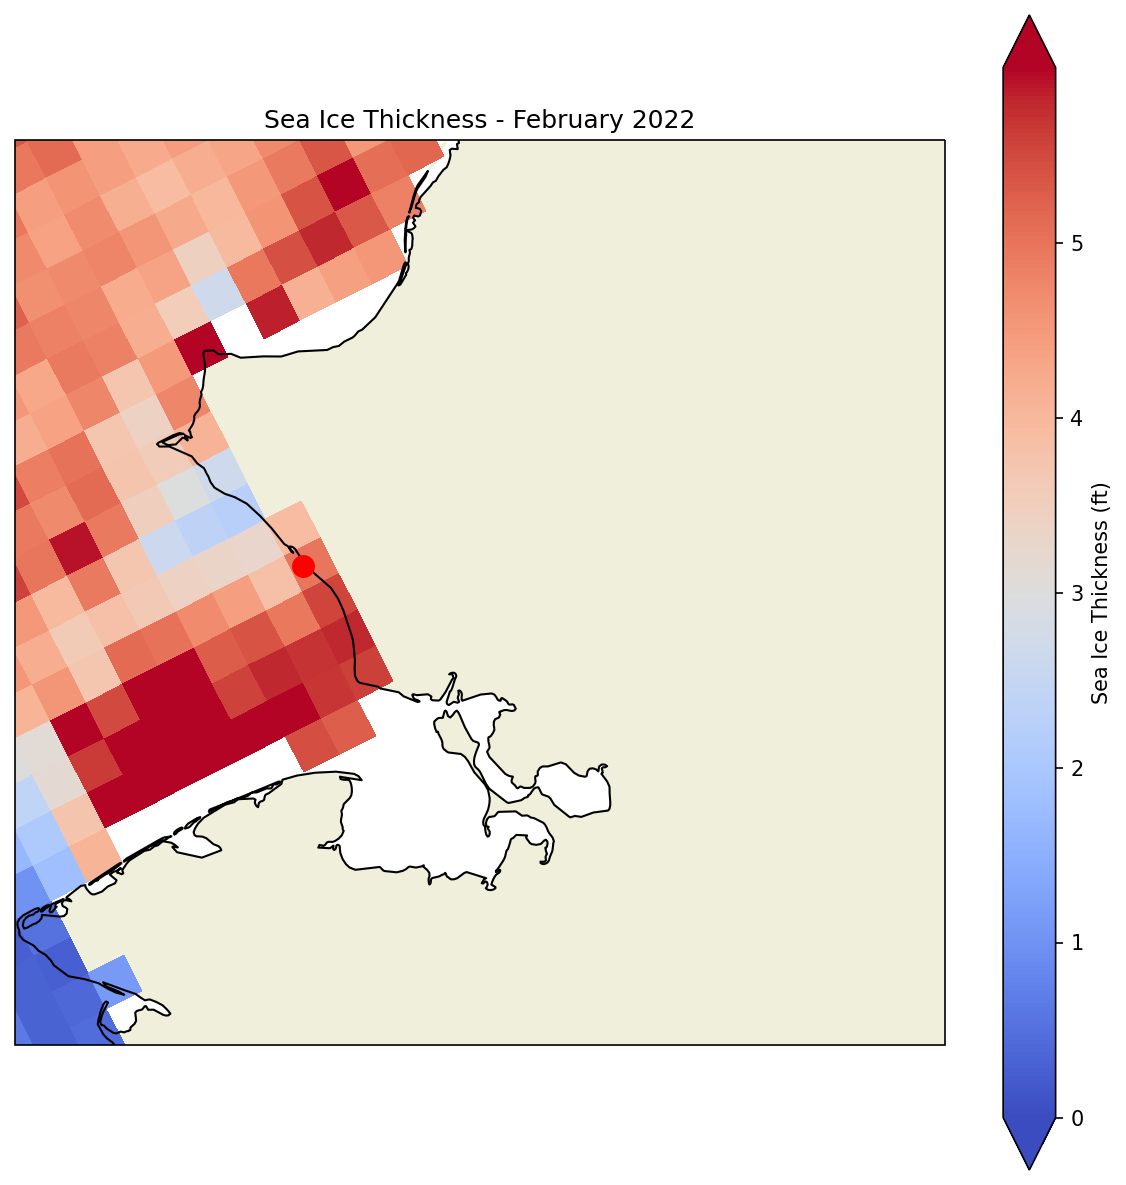

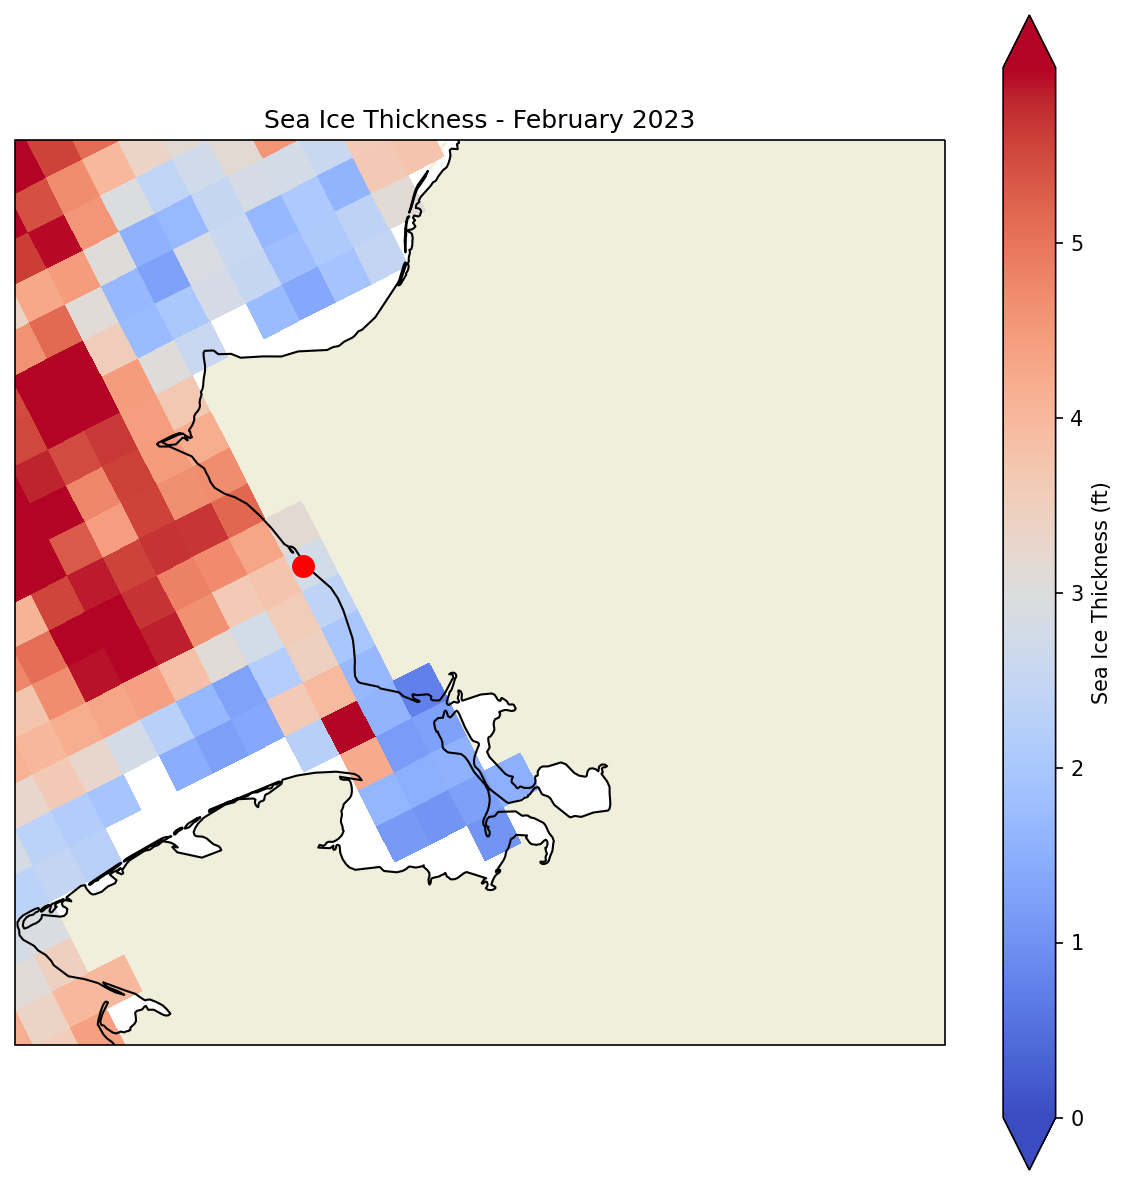

In [98]:
#static february maps 

def compute_gridcell_monthly_data(data, month, year):
    monthly_data = data.sel(time=(data['time'].dt.year == year) & (data['time'].dt.month == month))
    
    # Drop non-unique times (this step might remove some data, so use cautiously)
    _, index = np.unique(monthly_data['time'], return_index=True)
    monthly_data = monthly_data.isel(time=index)
    
    return monthly_data

# Assuming 'IS2SITMOGR4_all' has already been processed to have the correct time format
# Define the region extent and other parameters for the plot
region_extent = [-168, -156, 65, 70]  # [west, east, south, north]
projection = ccrs.NorthPolarStereo(central_longitude=(region_extent[0] + region_extent[1]) / 2)

# Loop through each year and create a plot for February
years = [2018, 2019, 2020, 2021, 2022, 2023]
for year in years:
    # Compute the data for February of the specified year
    monthly_data = compute_gridcell_monthly_data(IS2SITMOGR4_all.ice_thickness_int, 2, year)

    # Proceed only if there's data for the given February
    if monthly_data.sizes['time'] > 0:
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': projection})
        ax.set_extent(region_extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')

        # Convert the sea ice thickness data from meters to feet
        sea_ice_thickness_in_feet = monthly_data.values.squeeze() * METERS_TO_FEET  # Adjust as necessary for your data's dimensions

        # Plot the data with the max value set to 5 feet
        sea_ice_plot = ax.pcolormesh(
            monthly_data['longitude'], 
            monthly_data['latitude'], 
            sea_ice_thickness_in_feet,
            transform=ccrs.PlateCarree(),
            cmap='coolwarm',
            vmin=0,  # Minimum value for the color scale
            vmax=6  # Maximum value for the color scale (5 feet)
        )

    # Add a symbol for Kivalina
        ax.plot(kivalina_longitude, kivalina_latitude, marker='o', markersize=10, color='red', transform=ccrs.PlateCarree())
        # Add colorbar and title
        cbar = plt.colorbar(sea_ice_plot, ax=ax, orientation='vertical', extend='both')
        cbar.set_label('Sea Ice Thickness (ft)')
        cbar.set_ticks([0, 1, 2, 3, 4, 5])  # Optional: Set specific tick marks
        cbar.ax.set_yticklabels(['0', '1', '2', '3', '4', '5'])  # Optional: Format tick labels
        plt.title(f'Sea Ice Thickness - February {year}')
        plt.show()


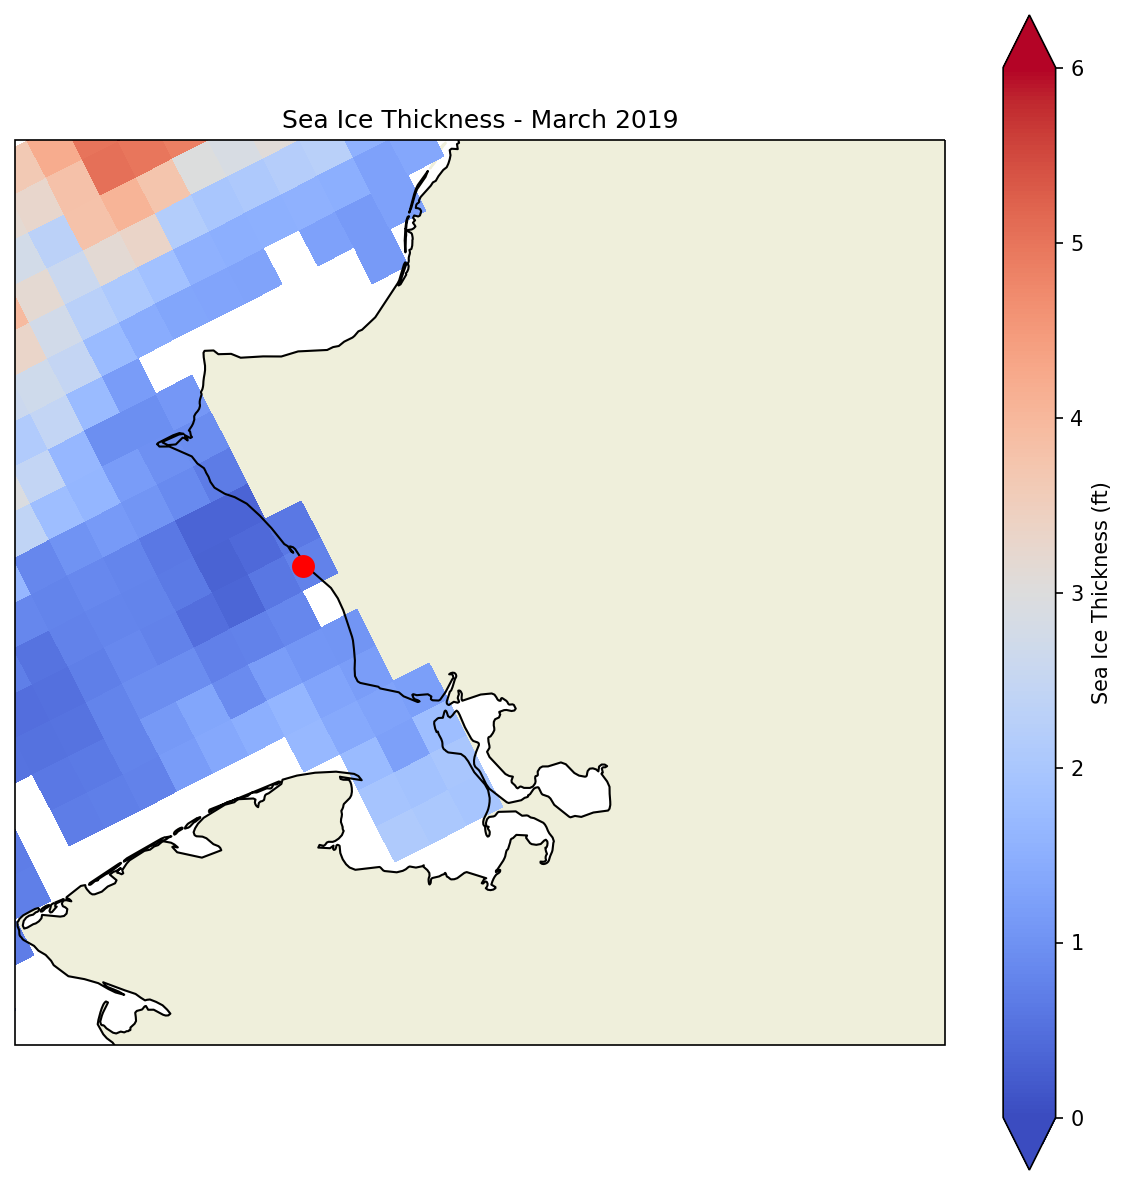

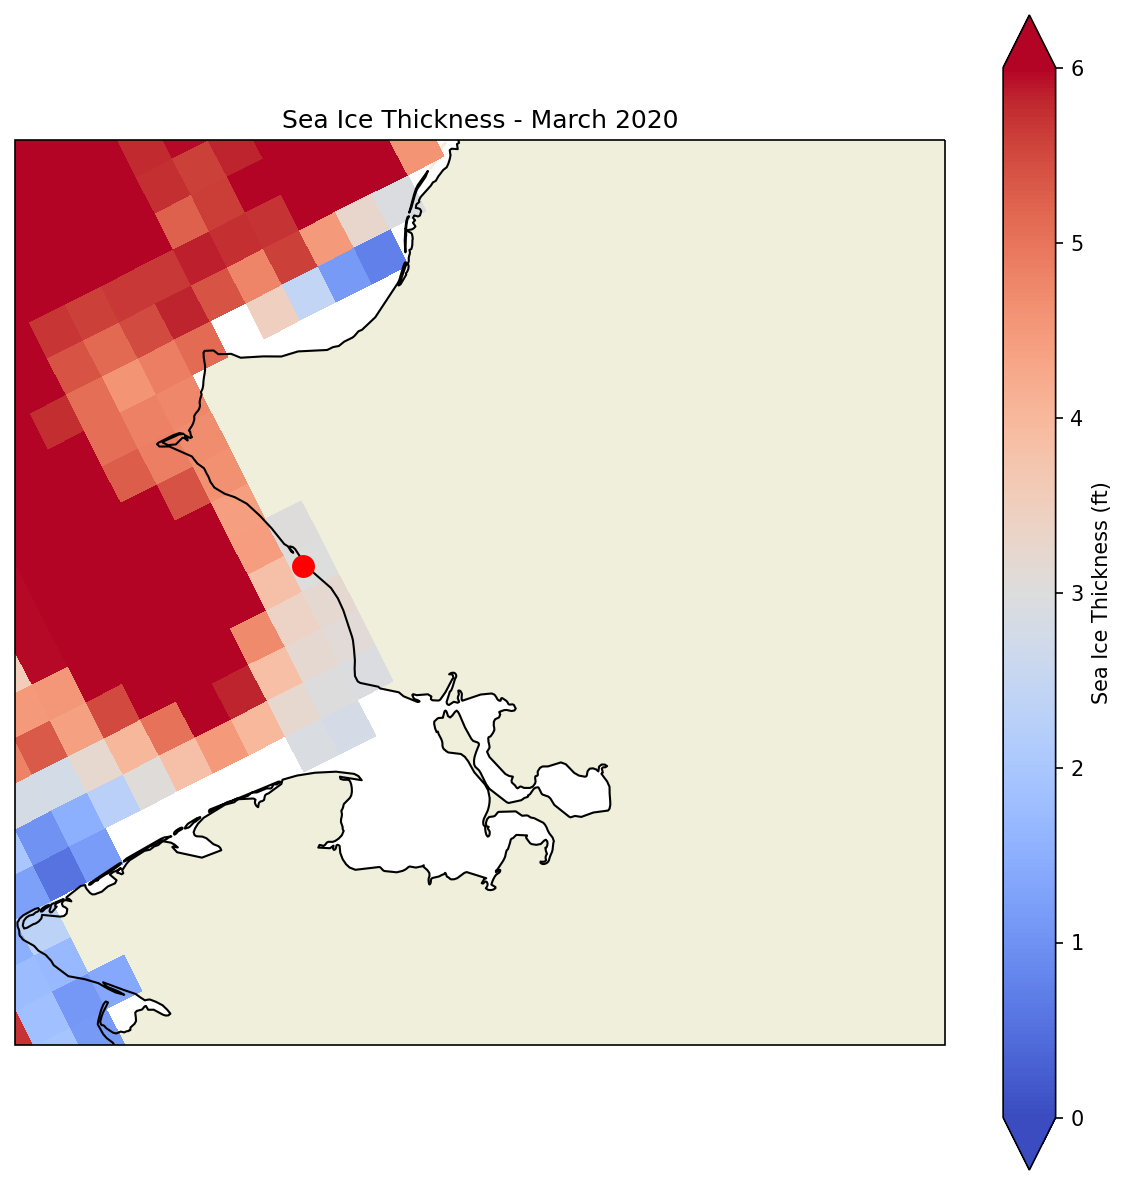

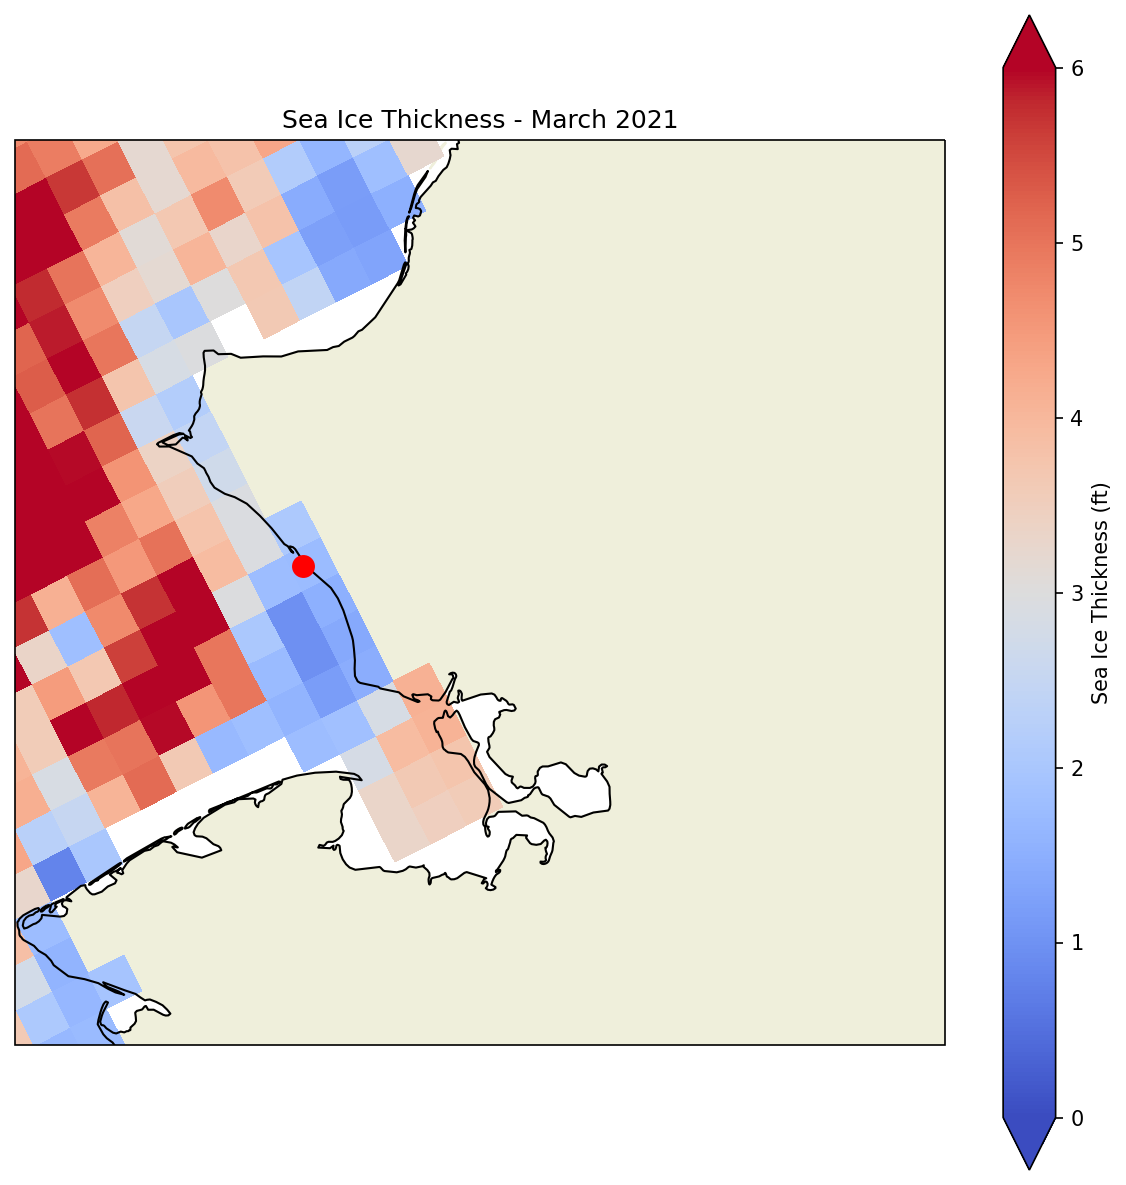

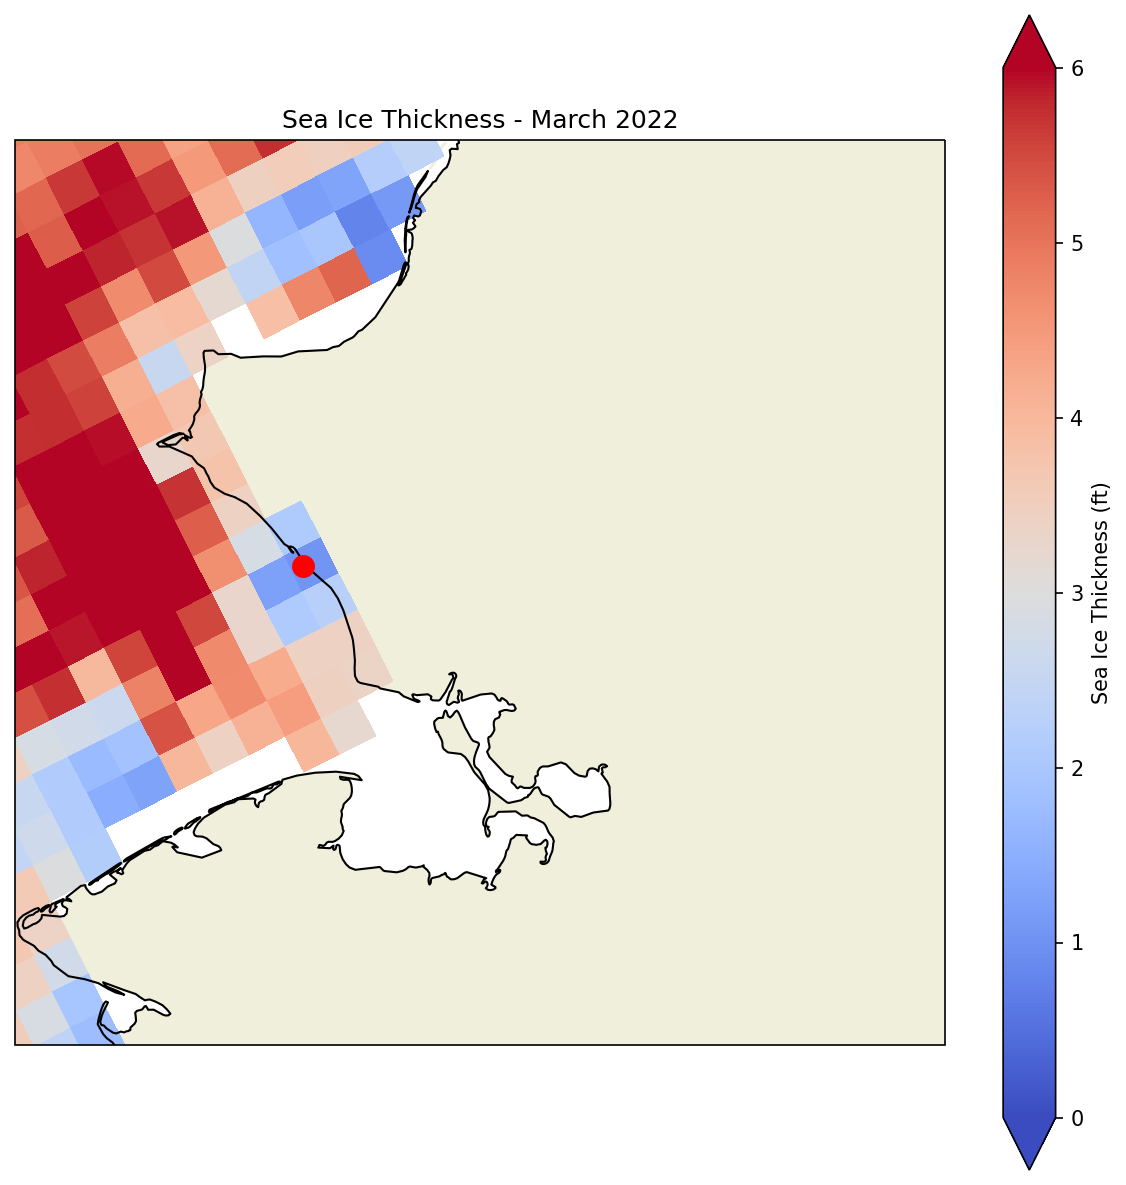

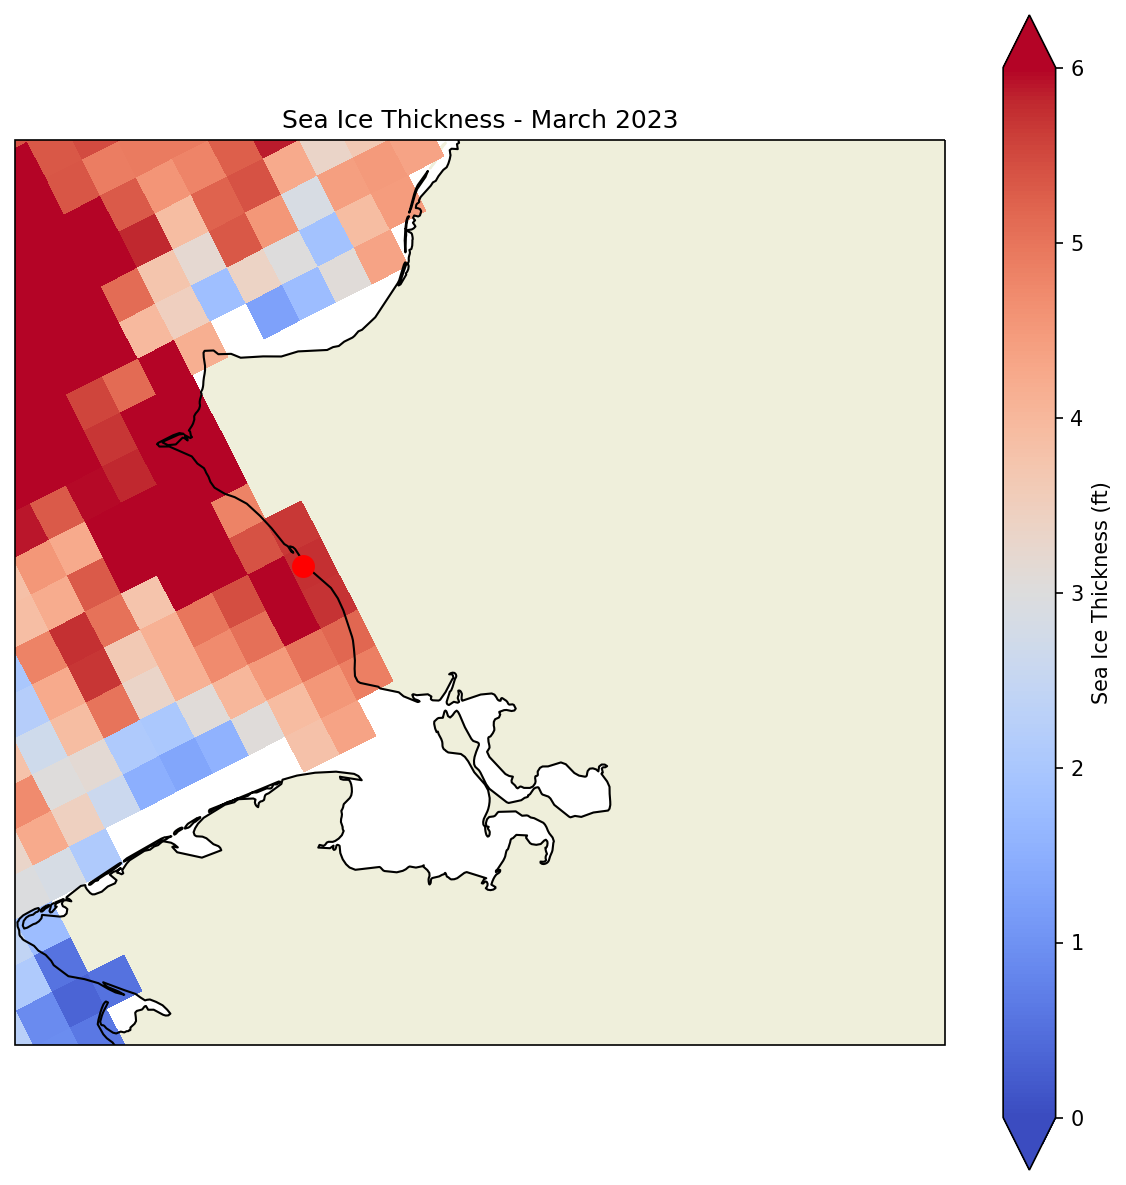

In [99]:
#static march 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

def compute_gridcell_monthly_data(data, month, year):
    monthly_data = data.sel(time=(data['time'].dt.year == year) & (data['time'].dt.month == month))
    _, index = np.unique(monthly_data['time'], return_index=True)
    monthly_data = monthly_data.isel(time=index)
    return monthly_data

# Define the region extent and other parameters for the plot
region_extent = [-168, -156, 65, 70]
projection = ccrs.NorthPolarStereo(central_longitude=(region_extent[0] + region_extent[1]) / 2)

# Loop through each year and create a plot for March
years = [2018, 2019, 2020, 2021, 2022, 2023]
for year in years:
    # Compute the data for March of the specified year
    monthly_data = compute_gridcell_monthly_data(IS2SITMOGR4_all.ice_thickness_int, 3, year)

    # Proceed only if there's data for the given March
    if monthly_data.sizes['time'] > 0:
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': projection})
        ax.set_extent(region_extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')

        # Convert the sea ice thickness data from meters to feet
        sea_ice_thickness_in_feet = monthly_data.values.squeeze() * METERS_TO_FEET

        # Plot the data
        sea_ice_plot = ax.pcolormesh(
            monthly_data['longitude'], 
            monthly_data['latitude'], 
            sea_ice_thickness_in_feet,
            transform=ccrs.PlateCarree(),
            cmap='coolwarm',
            vmin=0, 
            vmax=6
        )

# Add a symbol for Kivalina
        ax.plot(kivalina_longitude, kivalina_latitude, marker='o', markersize=10, color='red', transform=ccrs.PlateCarree())
        # Add colorbar and title
        cbar = plt.colorbar(sea_ice_plot, ax=ax, orientation='vertical', extend='both')
        cbar.set_label('Sea Ice Thickness (ft)')
        plt.title(f'Sea Ice Thickness - March {year}')
        plt.show()


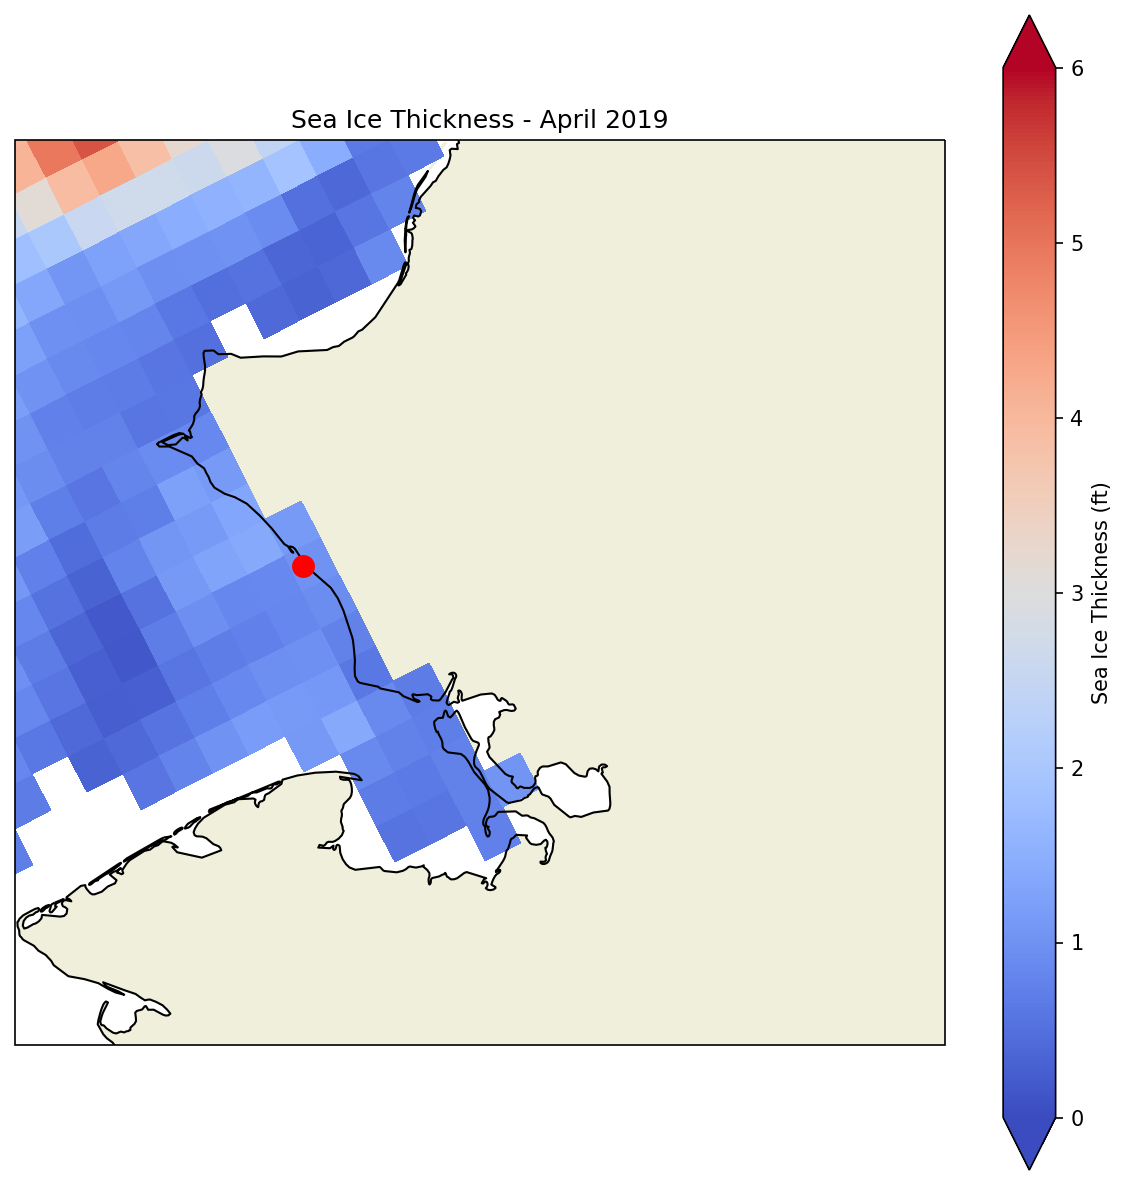

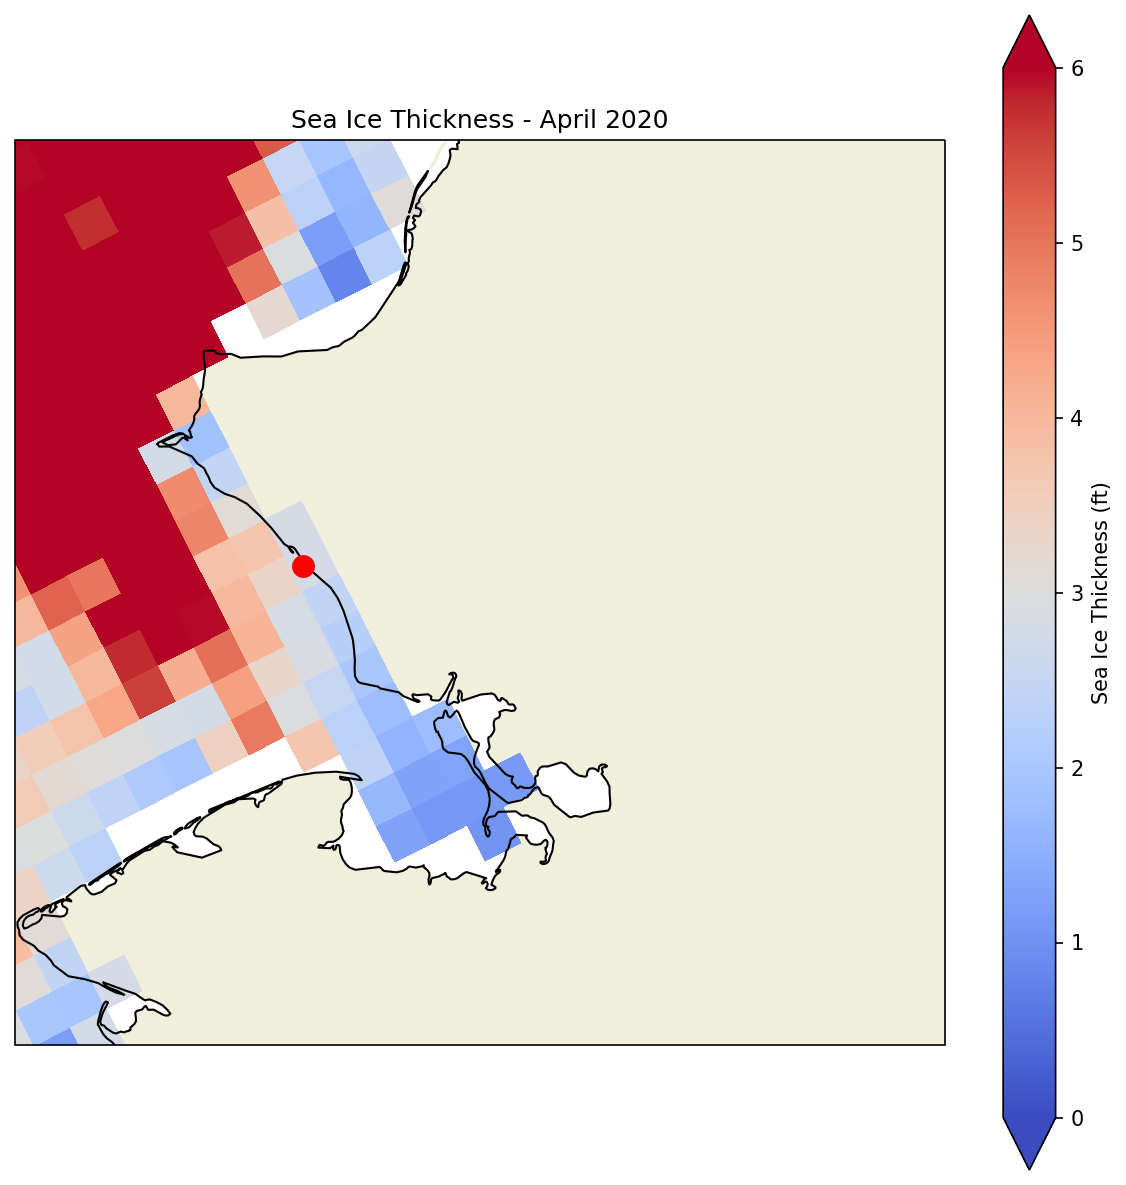

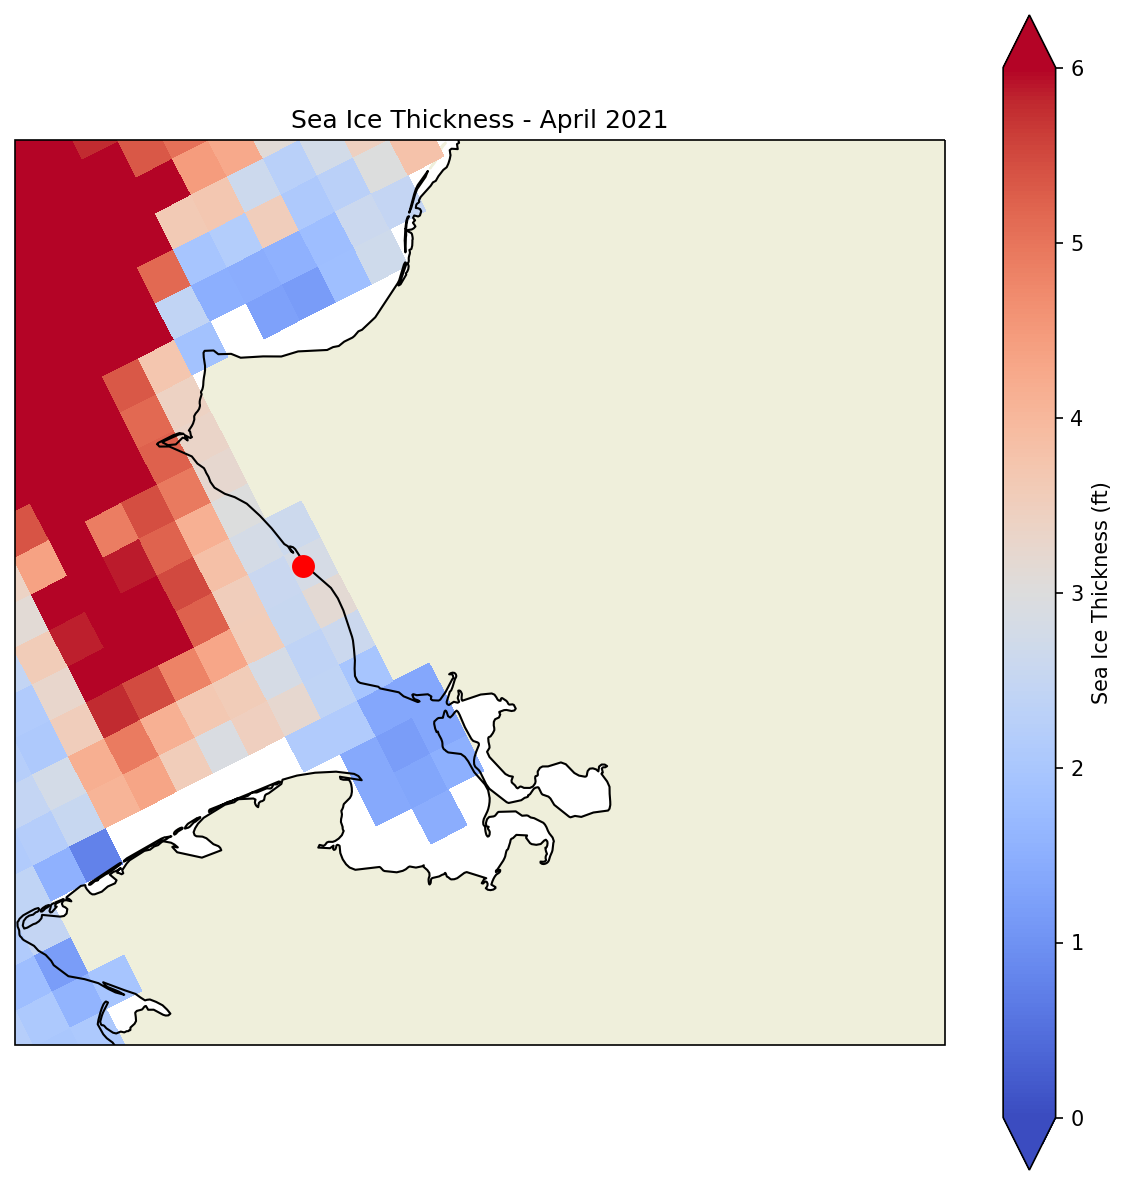

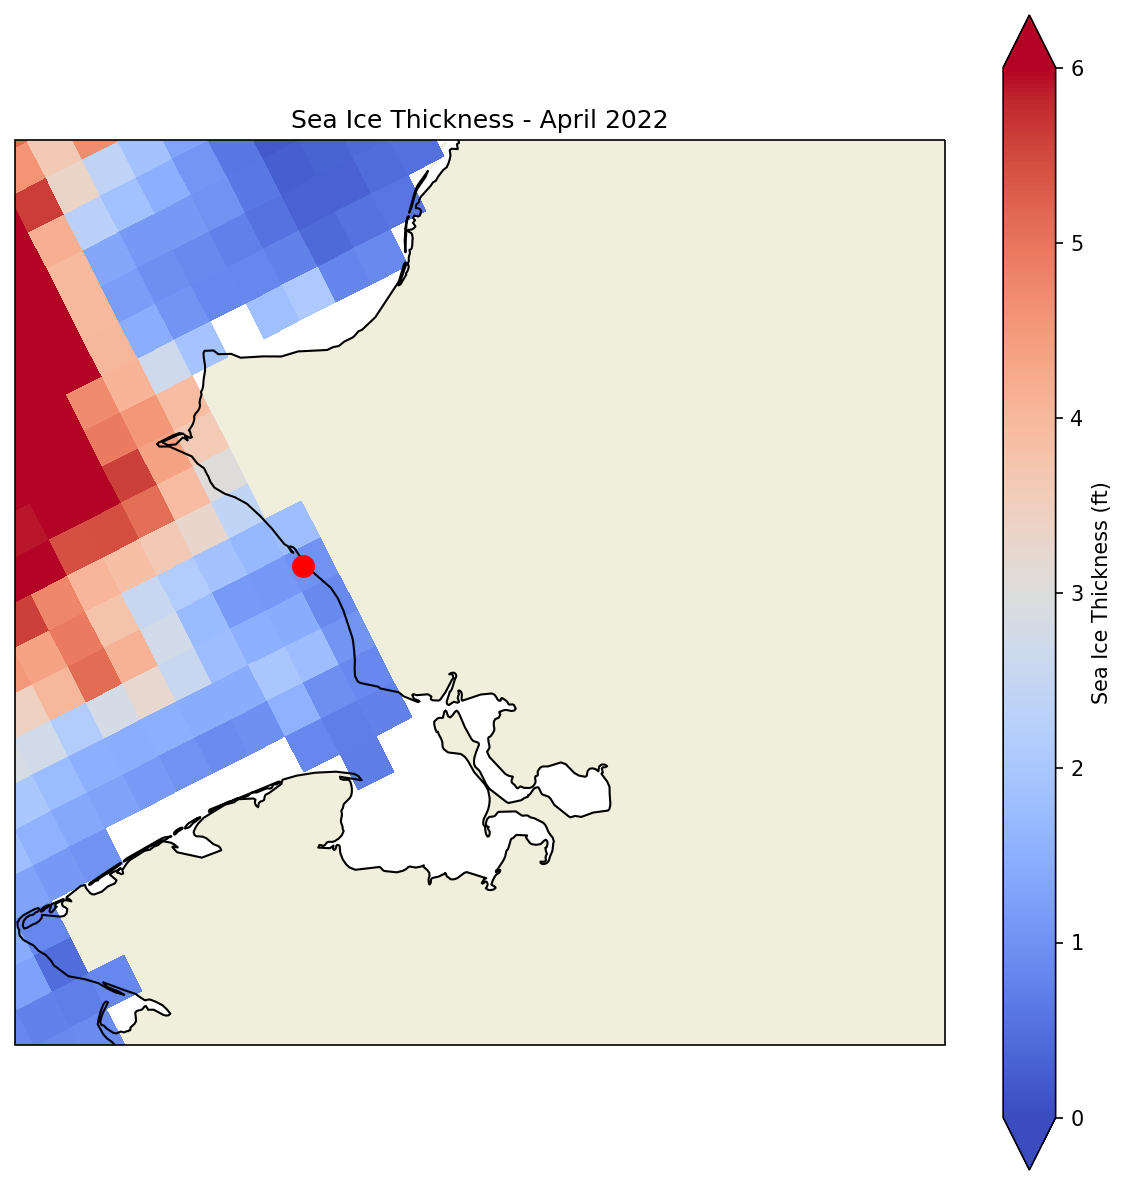

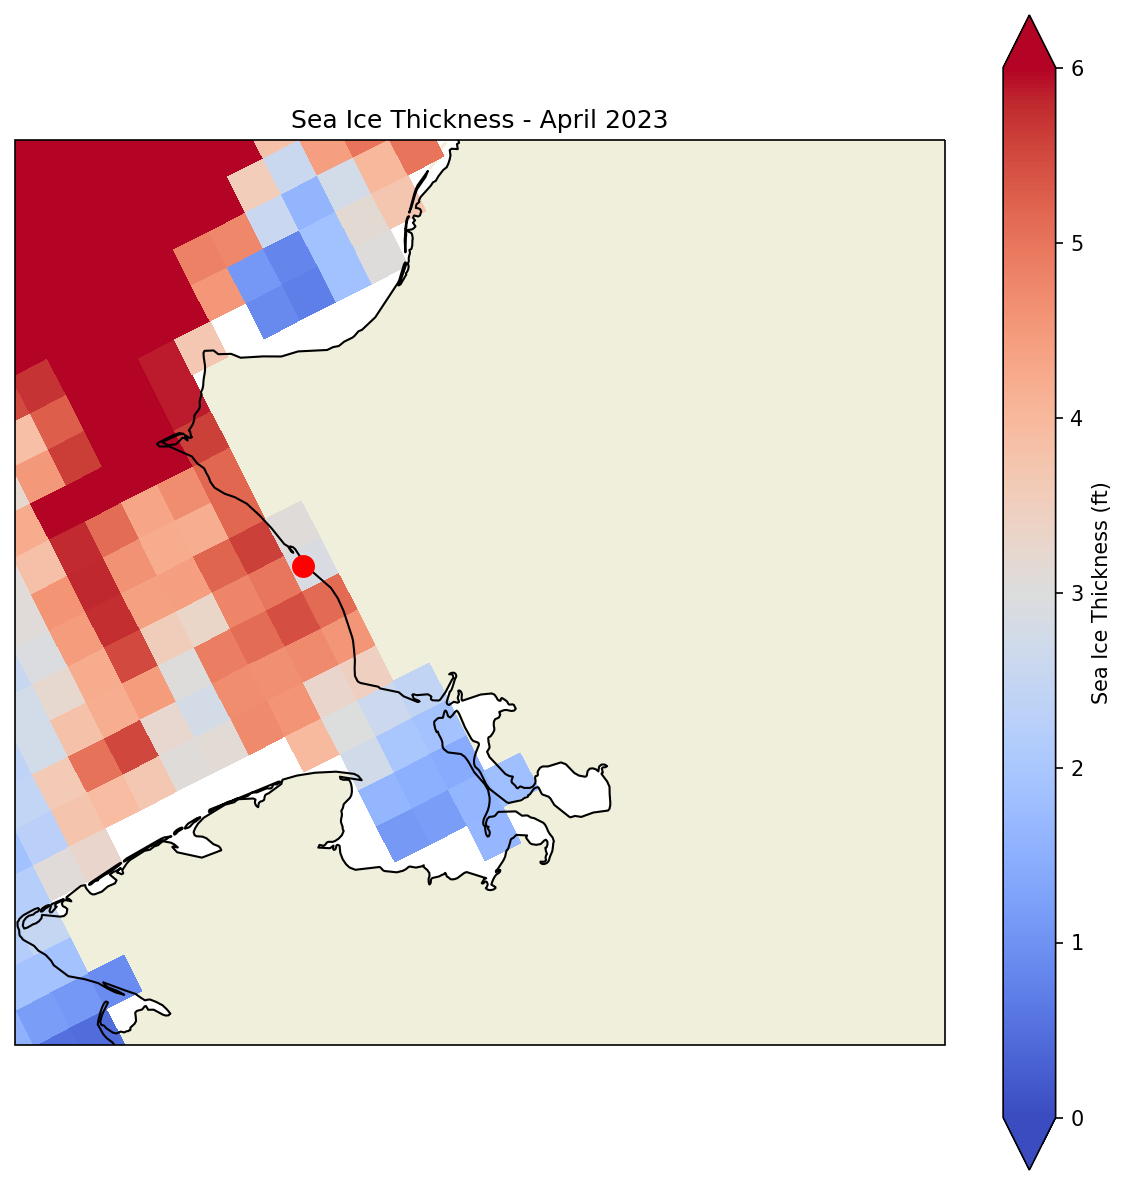

In [100]:
#static april
# Static visualizations for April
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

def compute_gridcell_monthly_data(data, month, year):
    monthly_data = data.sel(time=(data['time'].dt.year == year) & (data['time'].dt.month == month))
    _, index = np.unique(monthly_data['time'], return_index=True)
    monthly_data = monthly_data.isel(time=index)
    return monthly_data

# Define the region extent and other parameters for the plot
region_extent = [-168, -156, 65, 70]
projection = ccrs.NorthPolarStereo(central_longitude=(region_extent[0] + region_extent[1]) / 2)

# Loop through each year and create a plot for April
years = [2018, 2019, 2020, 2021, 2022, 2023]
for year in years:
    # Compute the data for April of the specified year
    monthly_data = compute_gridcell_monthly_data(IS2SITMOGR4_all.ice_thickness_int, 4, year)

    # Proceed only if there's data for the given April
    if monthly_data.sizes['time'] > 0:
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': projection})
        ax.set_extent(region_extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')

        # Convert the sea ice thickness data from meters to feet
        sea_ice_thickness_in_feet = monthly_data.values.squeeze() * METERS_TO_FEET

        # Plot the data
        sea_ice_plot = ax.pcolormesh(
            monthly_data['longitude'], 
            monthly_data['latitude'], 
            sea_ice_thickness_in_feet,
            transform=ccrs.PlateCarree(),
            cmap='coolwarm',
            vmin=0, 
            vmax=6
        )

# Add a symbol for Kivalina
        ax.plot(kivalina_longitude, kivalina_latitude, marker='o', markersize=10, color='red', transform=ccrs.PlateCarree())
        # Add colorbar and title
        cbar = plt.colorbar(sea_ice_plot, ax=ax, orientation='vertical', extend='both')
        cbar.set_label('Sea Ice Thickness (ft)')
        plt.title(f'Sea Ice Thickness - April {year}')
        plt.show()





<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
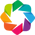

Launching server at http://localhost:12390


2024-02-01 00:10:10.113 200 GET / (::1) 16630.19ms
2024-02-01 00:10:10.151 200 GET /static/extensions/panel/css/debugger.css (::1) 9.22ms
2024-02-01 00:10:10.156 200 GET /static/extensions/panel/css/alerts.css (::1) 1.95ms
2024-02-01 00:10:10.163 200 GET /static/extensions/panel/css/card.css (::1) 8.06ms
2024-02-01 00:10:10.246 200 GET /static/extensions/panel/css/widgets.css (::1) 0.99ms
2024-02-01 00:10:10.250 200 GET /static/extensions/panel/css/markdown.css (::1) 2.08ms
2024-02-01 00:10:10.252 200 GET /static/extensions/panel/css/json.css (::1) 1.23ms
2024-02-01 00:10:10.254 200 GET /static/extensions/panel/css/loading.css (::1) 1.25ms
2024-02-01 00:10:10.257 200 GET /static/extensions/panel/css/dataframe.css (::1) 1.20ms
2024-02-01 00:10:10.260 200 GET /static/js/bokeh.min.js?v=3c61e952b808bb7e346ce828a565a5f23aaf7708d034fa9d0906403813355d45bb4e8d8b0b23a93f032c76831d4f0221846f28699c7f5147caa62e0d31668314 (::1) 2.83ms
2024-02-01 00:10:10.263 200 GET /static/js/bokeh-gl.min.js?v=e5d

In [105]:
## January Interactive
import xarray as xr
import geoviews as gv
import geoviews.feature as gf
import holoviews as hv
from holoviews import opts
from cartopy import crs
import panel as pn

gv.extension('bokeh')

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

# Define the new extent to include Kivalina, Point Hope, and surrounding ocean
kivalina_point_hope_extent = (-167, -163, 67, 69)

# Define the projection with a central longitude that aligns with your region of interest
north_polar_projection = crs.NorthPolarStereo(central_longitude=-160)

# Create a list to hold the map plots for January
map_plots_january = []

# Loop through each year and create a plot for January
years = [2019, 2020, 2021, 2022, 2023]
for year in years:
    # Compute the data for January of the specified year
    monthly_data_january = compute_gridcell_monthly_data(IS2SITMOGR4_all.ice_thickness_int, 1, year)

    # Convert data from meters to feet and squeeze it to remove any size-one dimensions
    sea_ice_thickness_in_feet_january = (monthly_data_january * METERS_TO_FEET).squeeze()

    # Ensure that the data is two-dimensional
    if sea_ice_thickness_in_feet_january.ndim == 2:
        # Create the GeoViews object for January with the specified projection
        gv_plot_january = gv.QuadMesh((sea_ice_thickness_in_feet_january.longitude, sea_ice_thickness_in_feet_january.latitude, sea_ice_thickness_in_feet_january),
                                      kdims=['Longitude', 'Latitude'], vdims=['Sea ice thickness (ft)']).opts(
            projection=north_polar_projection, tools=['hover'], cmap='coolwarm', colorbar=True,
            clabel='Sea Ice Thickness (ft)', title=f'Sea Ice Thickness - January {year}'
        )
        
        # Apply the zoom (extent) to the gv_plot for January
        gv_plot_january = gv_plot_january.redim.range(Longitude=(kivalina_point_hope_extent[0], kivalina_point_hope_extent[1]), 
                                                      Latitude=(kivalina_point_hope_extent[2], kivalina_point_hope_extent[3]))
        
        # Overlay the coastlines for January
        gv_plot_january = gv_plot_january * gf.coastline.opts(scale='10m', color='black')
        
        # Add to the list of map plots for January
        map_plots_january.append(gv_plot_january)

# Display the interactive plot for January
holomap_january = hv.HoloMap({year: plot for year, plot in zip(years, map_plots_january)}, kdims='Year')

# Set options for the holomap for January
holomap_january = holomap_january.opts(
    opts.QuadMesh(cmap='coolwarm', clim=(0, 5), colorbar=True, tools=['hover']),
    opts.Overlay(width=500, height=500, global_extent=False)
)
# Add a symbol for Kivalina
#ax.plot(kivalina_longitude, kivalina_latitude, marker='o', markersize=10, color='red', transform=ccrs.PlateCarree())

# Display inline in Jupyter notebook for January
holomap_january

# Initialize Panel extension
pn.extension()

# Convert the HoloViews object into a Panel object and display it
panel_obj_january = pn.panel(holomap_january)
panel_obj_january.show(port=12390)  # This will open a new browser window with your plot running on localhost:12360


In [29]:
##February Interactive 
# Loop through each year and create a plot for February
## February Interactive

# Reuse: METERS_TO_FEET, north_polar_projection, compute_gridcell_monthly_data, and years from January code

# Create a list to hold the map plots for February
map_plots_february = []

# Loop through each year and create a plot for February
for year in years:
    # Compute the data for February of the specified year
    monthly_data_february = compute_gridcell_monthly_data(IS2SITMOGR4_all.ice_thickness_int, 2, year)

    # Convert data from meters to feet and squeeze it to remove any size-one dimensions
    sea_ice_thickness_in_feet_february = (monthly_data_february * METERS_TO_FEET).squeeze()

    # Ensure that the data is two-dimensional
    if sea_ice_thickness_in_feet_february.ndim == 2:
        # Create the GeoViews object for February with the specified projection
        gv_plot_february = gv.QuadMesh((sea_ice_thickness_in_feet_february.longitude, sea_ice_thickness_in_feet_february.latitude, sea_ice_thickness_in_feet_february),
                                       kdims=['Longitude', 'Latitude'], vdims=['Sea ice thickness (ft)']).opts(
            projection=north_polar_projection, tools=['hover'], cmap='coolwarm', colorbar=True,
            clabel='Sea Ice Thickness (ft)', title=f'Sea Ice Thickness - February {year}'
        )
        
        # Apply the zoom (extent) to the gv_plot for February
        gv_plot_february = gv_plot_february.redim.range(Longitude=(kivalina_point_hope_extent[0], kivalina_point_hope_extent[1]), 
                                                        Latitude=(kivalina_point_hope_extent[2], kivalina_point_hope_extent[3]))
        
        # Overlay the coastlines for February
        gv_plot_february = gv_plot_february * gf.coastline.opts(scale='10m', color='black')
        
        # Add to the list of map plots for February
        map_plots_february.append(gv_plot_february)

# Display the interactive plot for February
holomap_february = hv.HoloMap({year: plot for year, plot in zip(years, map_plots_february)}, kdims='Year')

# Set options for the holomap for February
holomap_february = holomap_february.opts(
    opts.QuadMesh(cmap='coolwarm', clim=(0, 5), colorbar=True, tools=['hover']),
    opts.Overlay(width=500, height=500, global_extent=False)
)

# Display inline in Jupyter notebook for April
holomap_february

import panel as pn
pn.extension()

# Convert the HoloViews object into a Panel object and display it
panel_obj = pn.panel(holomap_february)
panel_obj.show(port=12347)  # This will open a new browser window with your plot running on localhost:12345



Launching server at http://localhost:12347


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
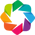

Launching server at http://localhost:12346


In [28]:
##March Interactive 
gv.extension('bokeh')

# Define the conversion factor from meters to feet
METERS_TO_FEET = 3.28084

# Define the new extent to include Kivalina, Point Hope, and surrounding ocean
# Adjust the values as needed to get the desired view
kivalina_point_hope_extent = (-167, -163, 67, 69)

# Define your compute_gridcell_monthly_data function and load your data source here

# Create a list to hold the map plots
map_plots = []

# Define the projection with a central longitude that aligns with your region of interest
north_polar_projection = crs.NorthPolarStereo(central_longitude=-160)

# Loop through each year and create a plot for January
years = [2019, 2020, 2021, 2022, 2023]
for year in years:
    # Compute the data for January of the specified year
    # Replace with your actual data function and variable
    monthly_data = compute_gridcell_monthly_data(IS2SITMOGR4_all.ice_thickness_int, 3, year)

    # Convert data from meters to feet and squeeze it to remove any size-one dimensions
    sea_ice_thickness_in_feet = (monthly_data * METERS_TO_FEET).squeeze()

    # Ensure that the data is two-dimensional
    if sea_ice_thickness_in_feet.ndim == 2:
        # Create the GeoViews object with the specified projection
        gv_plot = gv.QuadMesh((sea_ice_thickness_in_feet.longitude, sea_ice_thickness_in_feet.latitude, sea_ice_thickness_in_feet),
                              kdims=['Longitude', 'Latitude'], vdims=['Sea ice thickness (ft)']).opts(
            projection=north_polar_projection, tools=['hover'], cmap='coolwarm', colorbar=True,
            clabel='Sea Ice Thickness (ft)', title=f'Sea Ice Thickness - March {year}'
        )
        
        # Apply the zoom (extent) to the gv_plot
        gv_plot = gv_plot.redim.range(Longitude=(kivalina_point_hope_extent[0], kivalina_point_hope_extent[1]), 
                                       Latitude=(kivalina_point_hope_extent[2], kivalina_point_hope_extent[3]))
        
        # Overlay the coastlines
        gv_plot = gv_plot * gf.coastline.opts(scale='10m', color='black')
        
        # Add to the list of map plots
        map_plots.append(gv_plot)

# Display the interactive plot
holomap_march = hv.HoloMap({year: plot for year, plot in zip(years, map_plots)}, kdims='Year')

# Set options for the holomap
holomap_march = holomap.opts(
    opts.QuadMesh(cmap='coolwarm', clim=(0, 5), colorbar=True, tools=['hover']),
    opts.Overlay(width=500, height=500, global_extent=False)  # Set global_extent to False to enable zooming
)

# Display inline in Jupyter notebook
holomap_march

import panel as pn
pn.extension()

# Convert the HoloViews object into a Panel object and display it
panel_obj = pn.panel(holomap_march)
panel_obj.show(port=12346)  # This will open a new browser window with your plot running on localhost:12345




<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
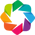

Launching server at http://localhost:12345


In [25]:
## April Interactive
gv.extension('bokeh')

# Reuse: METERS_TO_FEET, north_polar_projection, kivalina_point_hope_extent, compute_gridcell_monthly_data, and years from previous code

# Create a list to hold the map plots for April
map_plots_april = []

# Loop through each year and create a plot for April
for year in years:
    # Compute the data for April of the specified year
    monthly_data_april = compute_gridcell_monthly_data(IS2SITMOGR4_all.ice_thickness_int, 4, year)

    # Convert data from meters to feet and squeeze it to remove any size-one dimensions
    sea_ice_thickness_in_feet_april = (monthly_data_april * METERS_TO_FEET).squeeze()

    # Ensure that the data is two-dimensional
    if sea_ice_thickness_in_feet_april.ndim == 2:
        # Create the GeoViews object for April with the specified projection
        gv_plot_april = gv.QuadMesh((sea_ice_thickness_in_feet_april.longitude, sea_ice_thickness_in_feet_april.latitude, sea_ice_thickness_in_feet_april),
                                    kdims=['Longitude', 'Latitude'], vdims=['Sea ice thickness (ft)']).opts(
            projection=north_polar_projection, tools=['hover'], cmap='coolwarm', colorbar=True,
            clabel='Sea Ice Thickness (ft)', title=f'Sea Ice Thickness - April {year}'
        )
        
        # Apply the zoom (extent) to the gv_plot for April
        gv_plot_april = gv_plot_april.redim.range(Longitude=(kivalina_point_hope_extent[0], kivalina_point_hope_extent[1]), 
                                                  Latitude=(kivalina_point_hope_extent[2], kivalina_point_hope_extent[3]))
        
        # Overlay the coastlines for April
        gv_plot_april = gv_plot_april * gf.coastline.opts(scale='10m', color='black')
        
        # Add to the list of map plots for April
        map_plots_april.append(gv_plot_april)

# Display the interactive plot for April
holomap_april = hv.HoloMap({year: plot for year, plot in zip(years, map_plots_april)}, kdims='Year')

# Set options for the holomap for April
holomap_april = holomap_april.opts(
    opts.QuadMesh(cmap='coolwarm', clim=(0, 5), colorbar=True, tools=['hover']),
    opts.Overlay(width=500, height=500, global_extent=False)
)

# Display inline in Jupyter notebook for April
holomap_april

import panel as pn
pn.extension()

# Convert the HoloViews object into a Panel object and display it
panel_obj = pn.panel(holomap_april)
panel_obj.show(port=12345)  # This will open a new browser window with your plot running on localhost:12345



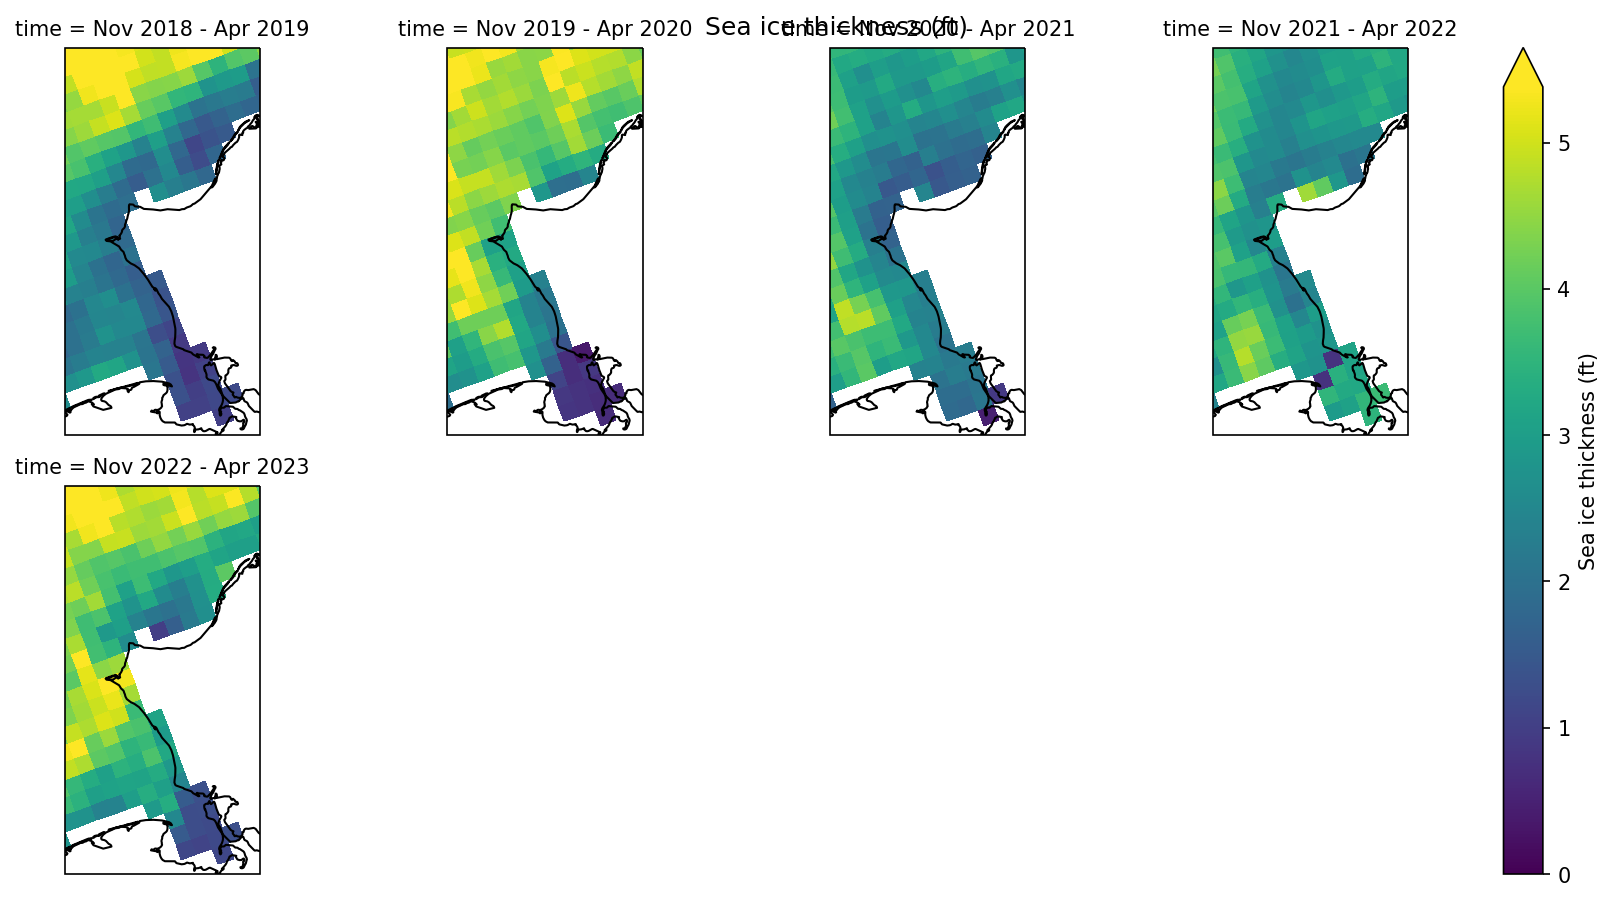

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

<Figure size 960x720 with 1 Axes>

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Constants for conversion
METERS_TO_FEET = 3.28084

# Constants for Kivalina, AK
KIVALINA_LAT = 67.7
KIVALINA_LON = -164.5


# Plot the ice thickness data
staticArcticMaps(thickness_winter_means_in_feet, 
                 dates=thickness_winter_means_in_feet.time.values, 
                 set_cbarlabel="Sea ice thickness (ft)", 
                 cmap="viridis", 
                 col_wrap=4, 
                 vmin=0, 
                 vmax=0.5 * METERS_TO_FEET, 
                 out_str='thickness_winter_region_2018_2023',
                 map_extent=map_extent)

# Adding a marker for Kivalina, AK
plt.scatter(KIVALINA_LON, KIVALINA_LAT, color='black', s=50, transform=ccrs.PlateCarree(), zorder=5)

# Save and show the figure with the marker
plt.savefig('/Users/anastringer_1/icesat2-book/content/figures/sea_ice_winter_thick_averages_map.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Constants for conversion
METERS_TO_FEET = 3.28084

# Constants for Kivalina, AK
KIVALINA_LAT = 67.7
KIVALINA_LON = -164.5

# Plot the ice thickness data
staticArcticMaps(thickness_winter_means_in_feet, 
                 dates=thickness_winter_means_in_feet.time.values, 
                 set_cbarlabel="Sea ice thickness (ft)", 
                 cmap="viridis", 
                 col_wrap=4, 
                 vmin=0, 
                 vmax=0.5 * METERS_TO_FEET, 
                 out_str='thickness_winter_region_2018_2023',
                 map_extent=map_extent)

# Get current figure and axes
fig = plt.gcf()
axes = fig.get_axes()

# Adding a marker for Kivalina, AK on each subplot
for ax in axes:
    ax.scatter(KIVALINA_LON, KIVALINA_LAT, color='black', s=50, transform=ccrs.PlateCarree(), zorder=5)

# Save and show the figure with the marker
plt.savefig('/Users/anastringer_1/icesat2-book/content/figures/sea_ice_winter_thick_averages_map.png')
plt.show()


No data available for month 1 in year 2018
No data available for month 2 in year 2018
No data available for month 3 in year 2018
No data available for month 4 in year 2018


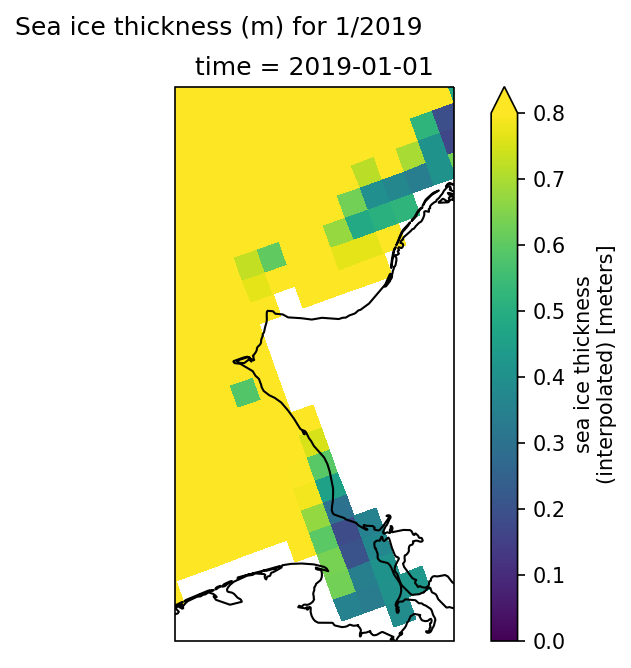

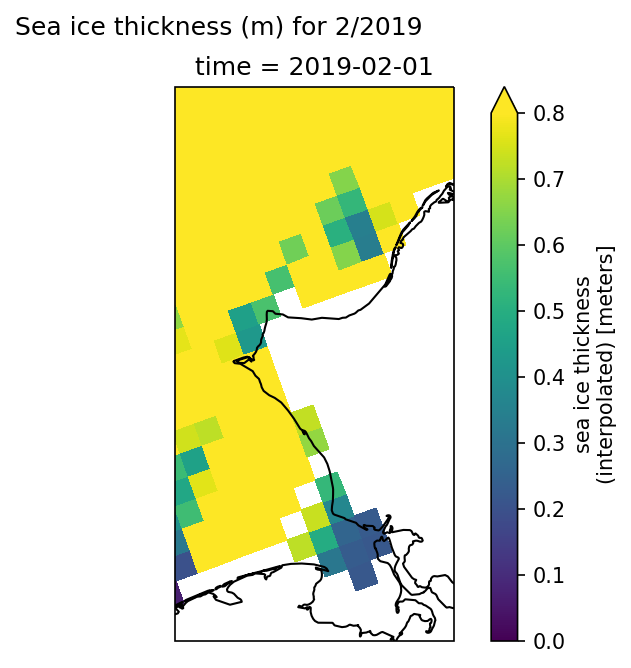

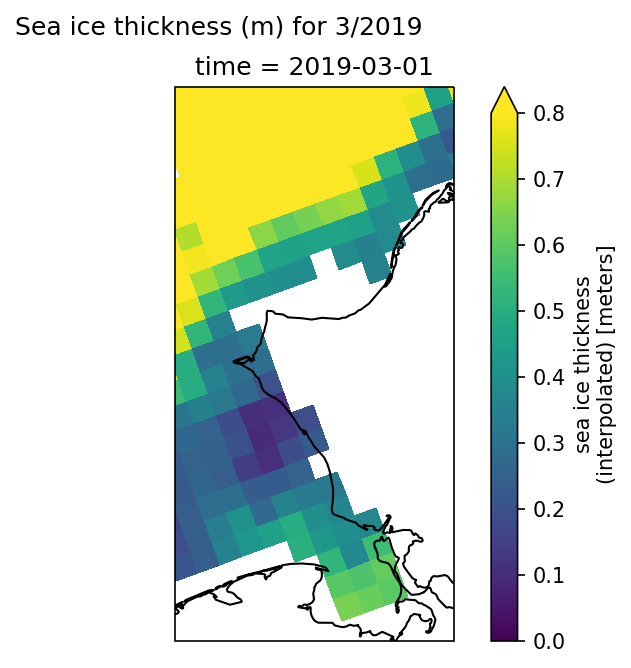

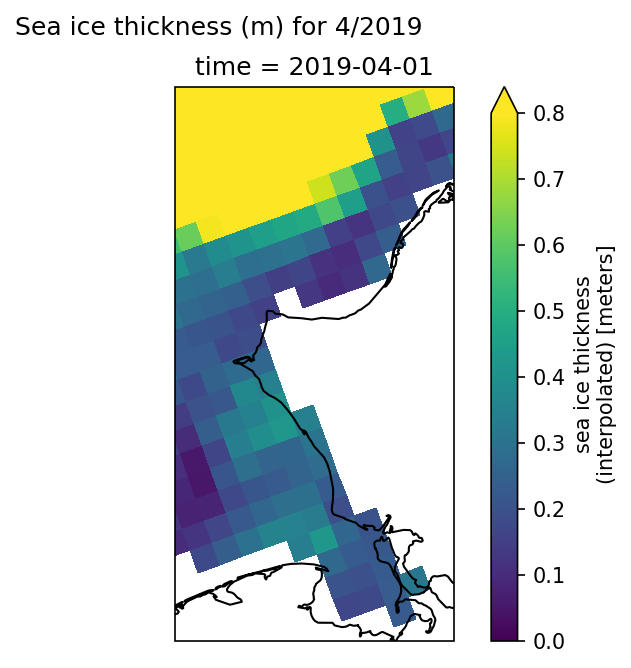

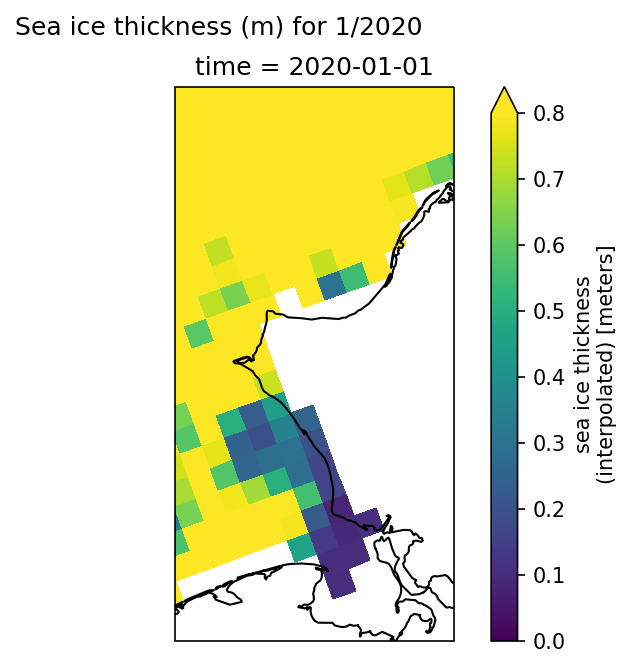

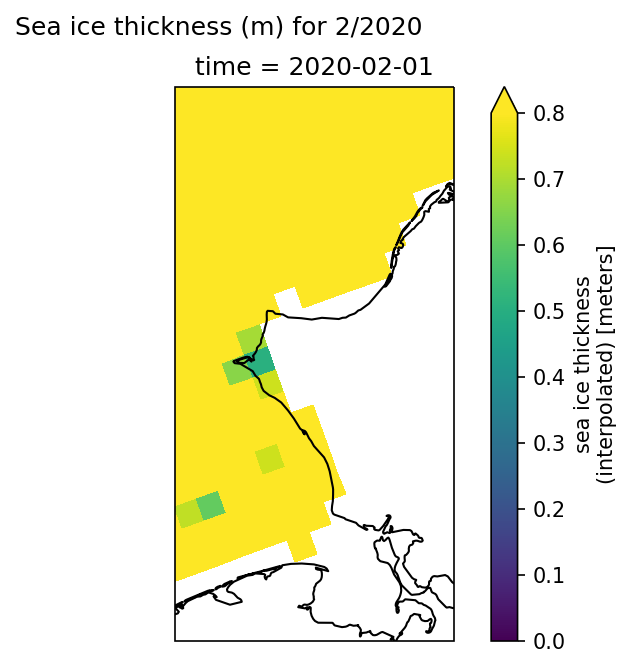

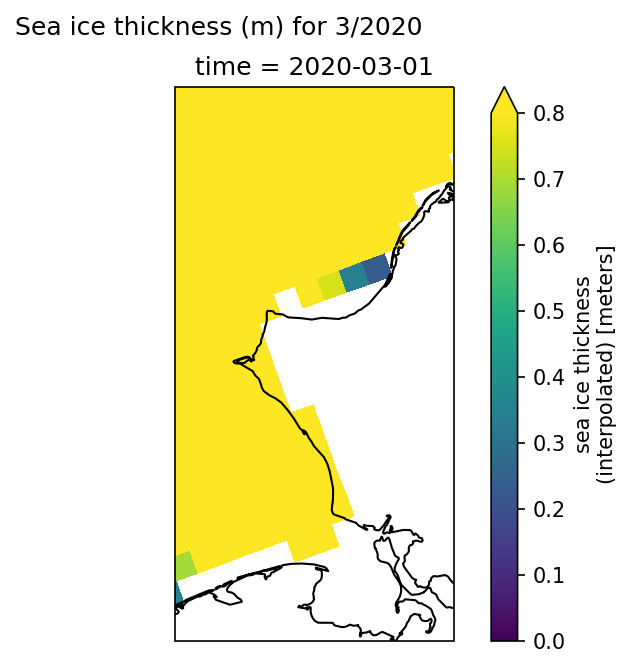

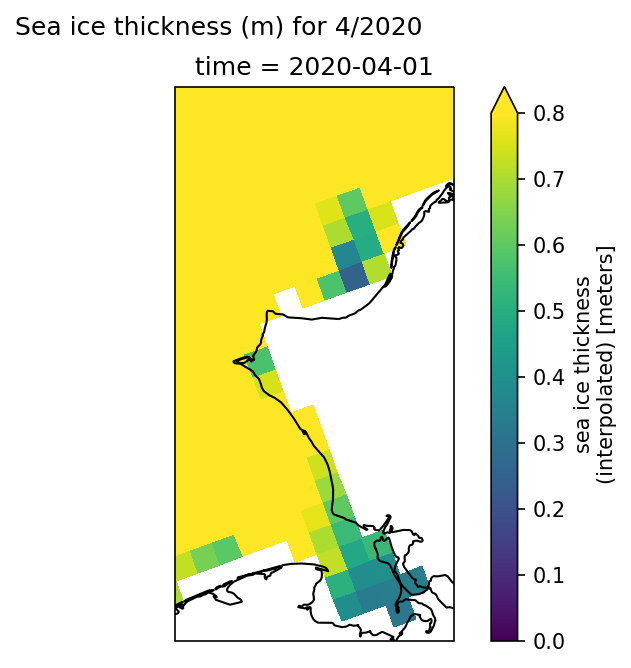

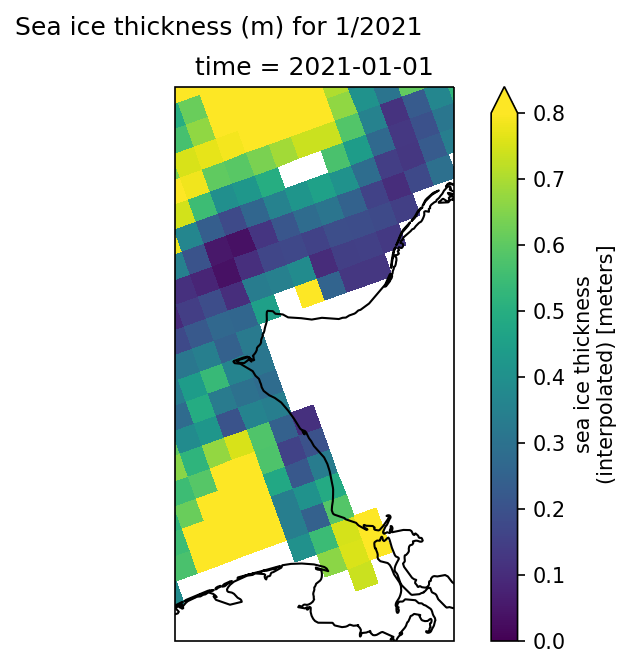

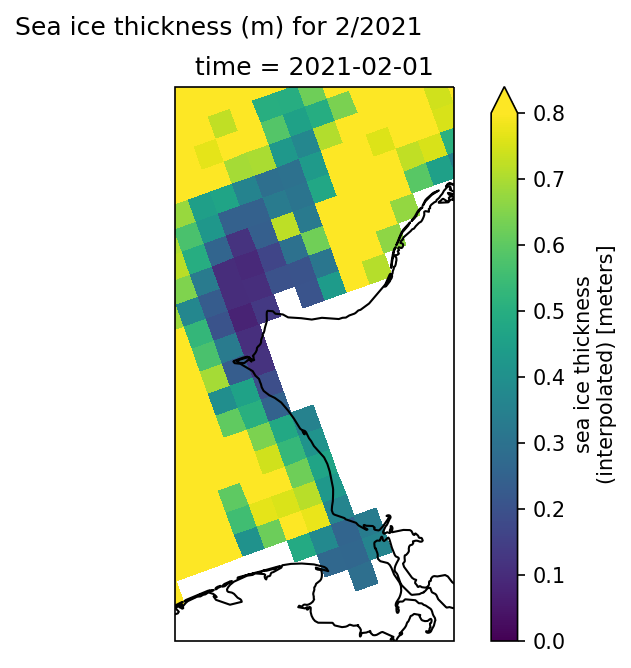

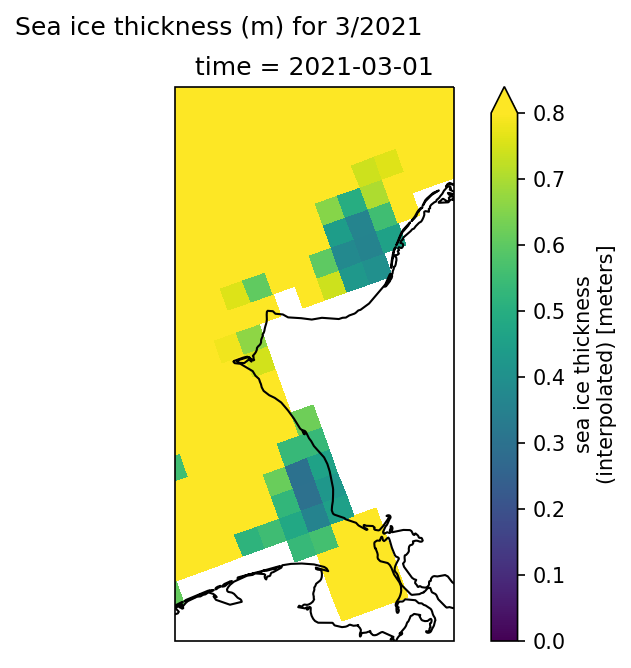

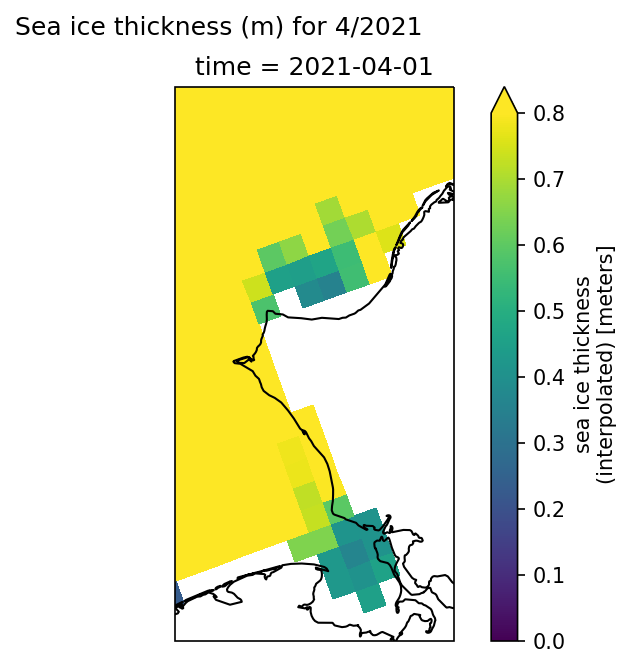

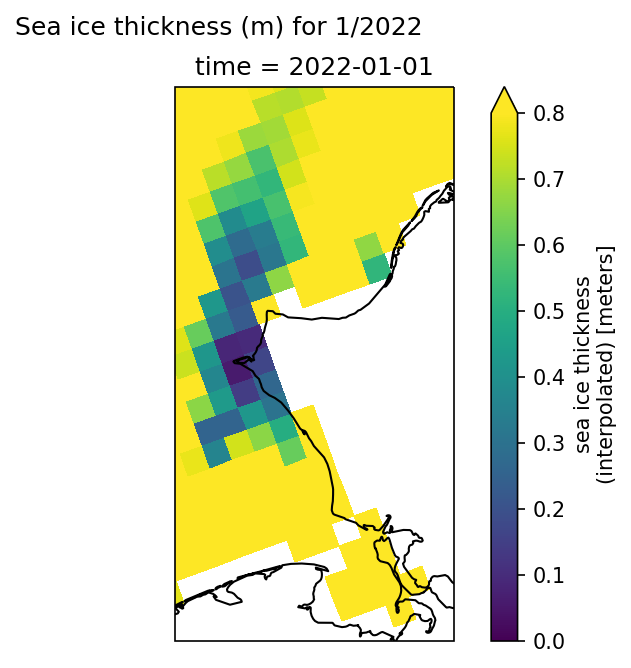

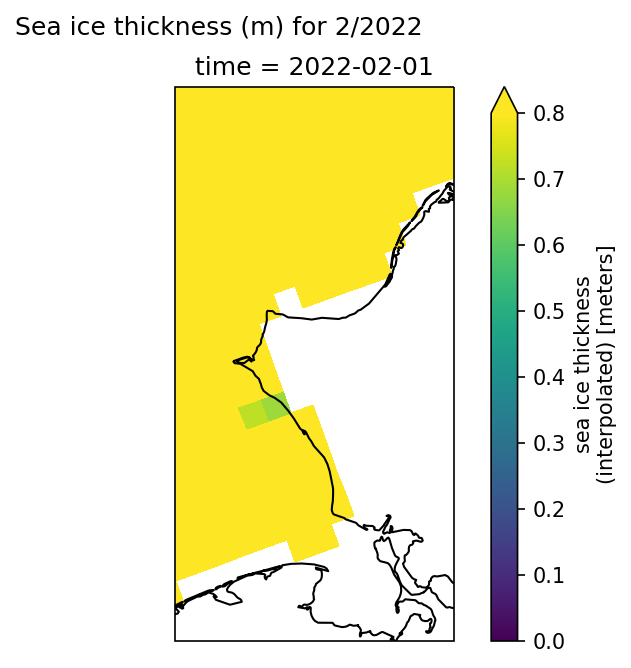

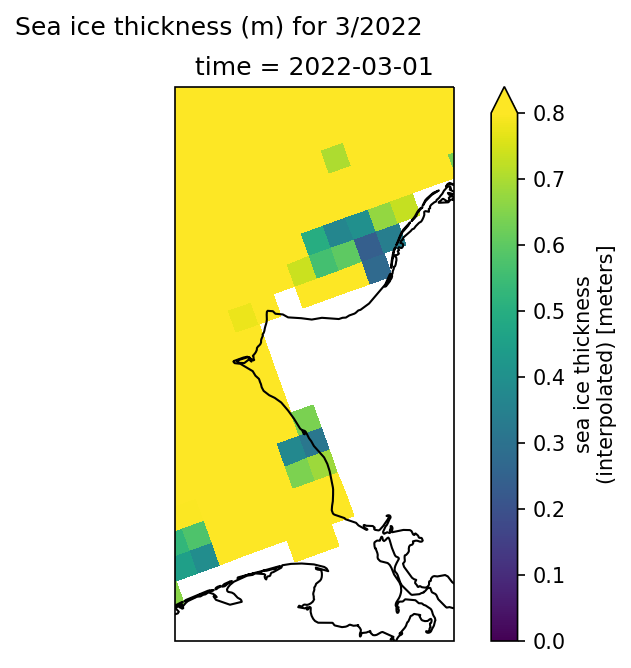

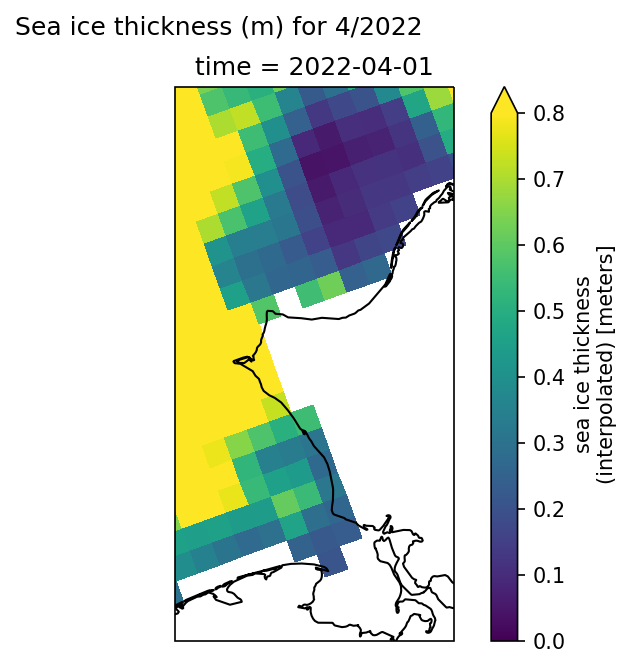

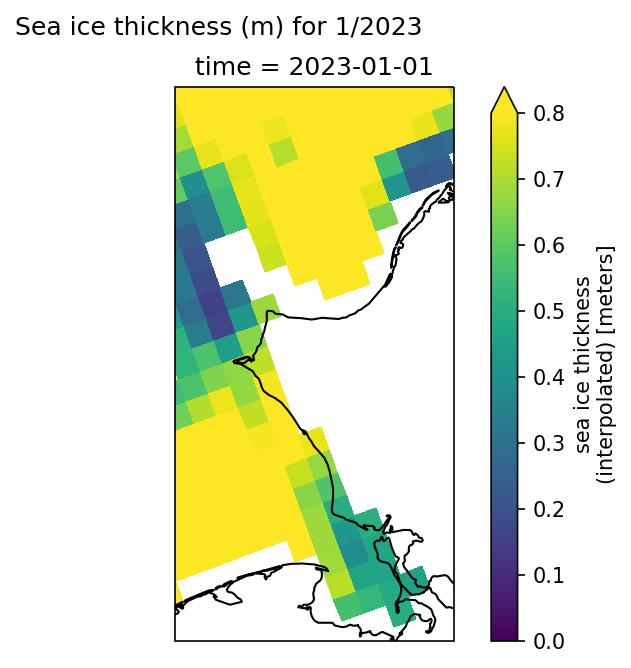

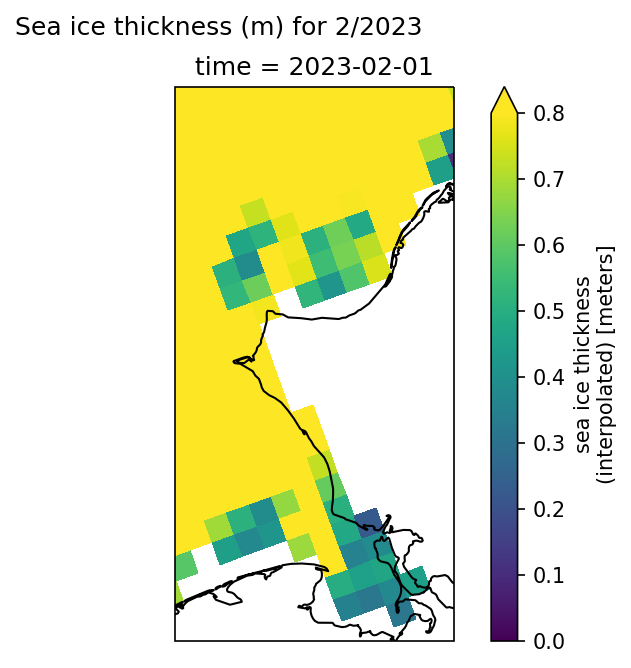

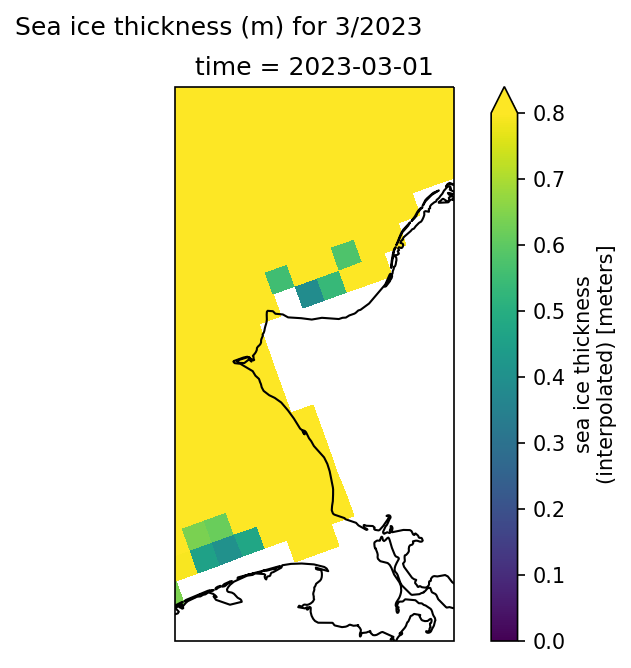

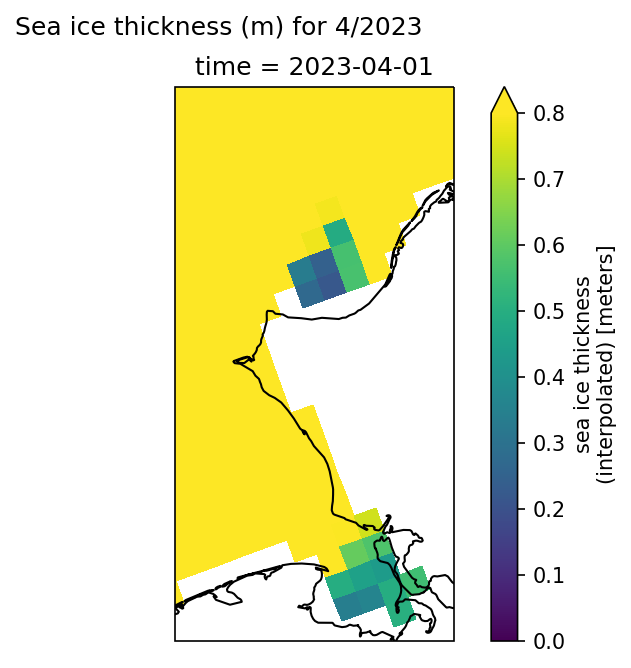

In [12]:
#January - April (2018 - 2023) 
#Breaking Down Kivalina Winter Freeboard Maps by Month, and Year for a More Helpful Look at the Data

import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

def staticArcticMaps(data, dates, set_cbarlabel, cmap, col_wrap, vmin, vmax, out_str, map_extent=None):
    if data.sizes['time'] == 1:
        p = data.squeeze('time').plot(x="longitude", y="latitude", 
                                      vmin=vmin, vmax=vmax, cmap=cmap,
                                      subplot_kws={'projection': ccrs.NorthPolarStereo(central_longitude=-155)}, 
                                      transform=ccrs.PlateCarree())
        p.axes.coastlines()
        if map_extent:
            p.axes.set_extent(map_extent, ccrs.PlateCarree())
    else:
        p = data.plot(x="longitude", y="latitude", col="time", 
                      col_wrap=col_wrap, vmin=vmin, vmax=vmax, cmap=cmap,
                      subplot_kws={'projection': ccrs.NorthPolarStereo(central_longitude=-155)}, 
                      transform=ccrs.PlateCarree())

        for ax in p.axes.flat:
            ax.coastlines()
            if map_extent:
                ax.set_extent(map_extent, ccrs.PlateCarree())
    
    plt.suptitle(set_cbarlabel)
    plt.show()

def compute_gridcell_monthly_data(data, month, year):
    monthly_data = data.sel(time=(data['time'].dt.year == year) & (data['time'].dt.month == month))
    
    # Drop non-unique times (this step might remove some data, so use cautiously)
    _, index = np.unique(monthly_data['time'], return_index=True)
    monthly_data = monthly_data.isel(time=index)
    
    return monthly_data

months = [1, 2, 3, 4]  # Winter months: November to April
years = [2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    for month in months:
        monthly_data = compute_gridcell_monthly_data(IS2SITMOGR4_all.ice_thickness_int, month, year)

        # Check if data exists for the given month and year
        if monthly_data.sizes['time'] > 0:
            staticArcticMaps(monthly_data, 
                             dates=monthly_data.time.values, 
                             set_cbarlabel=f"Sea ice thickness (m) for {month}/{year}", 
                             cmap="viridis", 
                             col_wrap=1, 
                             vmin=0, 
                             vmax=0.8, 
                             out_str=f'thickness_month_{month}_year_{year}',
                             map_extent=map_extent)
        else:
            print(f"No data available for month {month} in year {year}")



In [13]:
# import os

# def staticArcticMaps(data, dates, set_cbarlabel, cmap, col_wrap, vmin, vmax, out_str, map_extent=None):
#     if data.sizes['time'] == 1:
#         p = data.squeeze('time').plot(x="longitude", y="latitude", 
#                                       vmin=vmin, vmax=vmax, cmap=cmap,
#                                       subplot_kws={'projection': ccrs.NorthPolarStereo(central_longitude=-155)}, 
#                                       transform=ccrs.PlateCarree())
#         p.axes.coastlines()
#         if map_extent:
#             p.axes.set_extent(map_extent, ccrs.PlateCarree())
#     else:
#         p = data.plot(x="longitude", y="latitude", col="time", 
#                       col_wrap=col_wrap, vmin=vmin, vmax=vmax, cmap=cmap,
#                       subplot_kws={'projection': ccrs.NorthPolarStereo(central_longitude=-155)}, 
#                       transform=ccrs.PlateCarree())

#         for ax in p.axes.flat:
#             ax.coastlines()
#             if map_extent:
#                 ax.set_extent(map_extent, ccrs.PlateCarree())
    
#     plt.suptitle(set_cbarlabel)
    
#     # Define the directory where the figures will be saved
#     output_directory = "icesat2-book/content/figures"
#     os.makedirs(output_directory, exist_ok=True)

#     # Construct the file path
#     file_path = os.path.join(output_directory, f"{out_str}.png")

#     # Save the figure
#     plt.savefig(file_path, bbox_inches='tight', dpi=300)

#     # Show the plot
#     plt.show()


In [14]:
# def staticArcticMaps(data, dates, set_cbarlabel, cmap, col_wrap, vmin, vmax, out_str, map_extent=None):
#     # Coordinates for Kivalina, AK
#     kivalina_coords = (-164.5356, 67.7256)  # (longitude, latitude)
    
#     if data.sizes['time'] == 1:
#         p = data.squeeze('time').plot(x="longitude", y="latitude", 
#                                       vmin=vmin, vmax=vmax, cmap=cmap,
#                                       subplot_kws={'projection': ccrs.NorthPolarStereo(central_longitude=-155)}, 
#                                       transform=ccrs.PlateCarree())
#         p.axes.coastlines()
#         if map_extent:
#             p.axes.set_extent(map_extent, ccrs.PlateCarree())
#         # Plot the black dot for Kivalina
#         p.axes.plot(kivalina_coords[0], kivalina_coords[1], marker='o', color='black', markersize=2,
#                     transform=ccrs.PlateCarree())
#         p.colorbar.set_label(set_cbarlabel)
#     else:
#         p = data.plot(x="longitude", y="latitude", col="time", 
#                       col_wrap=col_wrap, vmin=vmin, vmax=vmax, cmap=cmap,
#                       subplot_kws={'projection': ccrs.NorthPolarStereo(central_longitude=-155)}, 
#                       transform=ccrs.PlateCarree())

#         for ax in p.axes.flat:
#             ax.coastlines()
#             if map_extent:
#                 ax.set_extent(map_extent, ccrs.PlateCarree())
#             # Plot the black dot for Kivalina on each subplot
#             ax.plot(kivalina_coords[0], kivalina_coords[1], marker='o', color='black', markersize=2,
#                     transform=ccrs.PlateCarree())
    
#     plt.suptitle(set_cbarlabel)
#     plt.show()


In [4]:
#weather data
import pandas as pd

# Load the CSV file
df = pd.read_csv('KivalinaWeatherdata.csv')

# Print the first few lines of the DataFrame
print(df.head())


       STATION                     NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788        5.7   
1  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788        5.7   
2  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788        5.7   
3  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788        5.7   
4  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788        5.7   

         DATE   AWND AWND_ATTRIBUTES    FMTM FMTM_ATTRIBUTES  ...  WSF5  \
0  2000-01-01  14.09             ,,W  2357.0             ,,W  ...  19.9   
1  2000-01-02  13.42             ,,W  1135.0             ,,W  ...  23.9   
2  2000-01-03   4.92             ,,W  1239.0             ,,W  ...   8.9   
3  2000-01-04   3.36             ,,W  2228.0             ,,W  ...  10.1   
4  2000-01-05   3.36             ,,W   235.0             ,,W  ...   8.9   

  WSF5_ATTRIBUTES  WT01 WT01_ATTRIBUTES  WT02 WT02_ATTRIBUTES  WT08  \
0             ,,W   NaN    

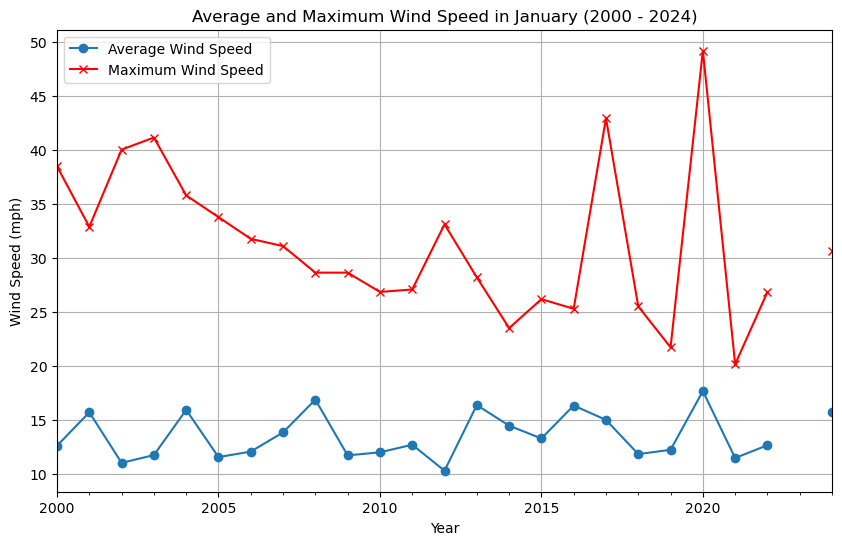

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('KivalinaWeatherdata.csv')

# Create a datetime index
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

# Filter January data across all years
january_data = data[data.index.month == 1]

##Average Wind Speed 

# Resample to get the average for each January
january_monthly_avg = january_data.resample('A')['AWND'].mean()

# Calculate the maximum wind speed for each January
january_monthly_max = january_data.resample('A')['AWND'].max()

# Plotting both average and maximum wind speeds
plt.figure(figsize=(10, 6))

# Plot average wind speeds
january_monthly_avg.plot(kind='line', marker='o', label='Average Wind Speed')

# Plot maximum wind speeds
january_monthly_max.plot(kind='line', marker='x', color='red', label='Maximum Wind Speed')

plt.title('Average and Maximum Wind Speed in January (2000 - 2024)')
plt.xlabel('Year')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.grid(True)
plt.show()



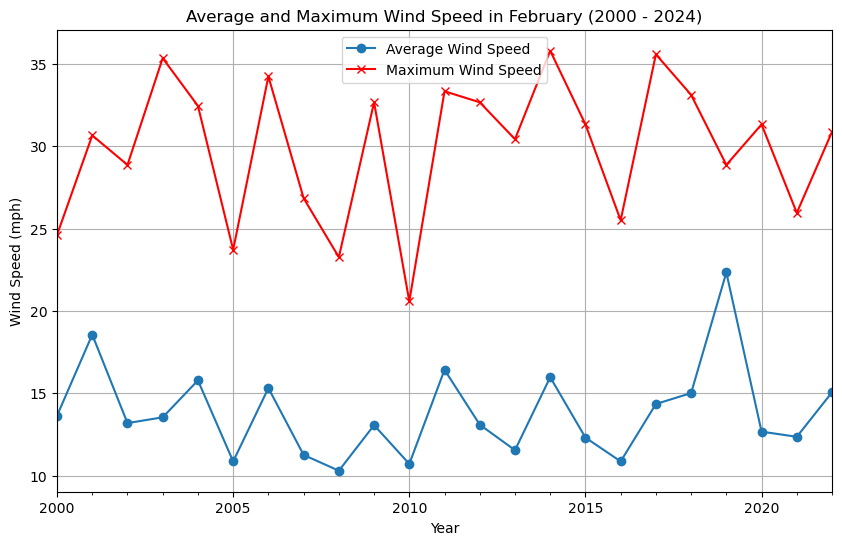

In [53]:
##February Winds
# Filter February data across all years
february_data = data[data.index.month == 2]

# Resample to get the average for each February
february_monthly_avg = february_data.resample('A')['AWND'].mean()

# Calculate the maximum wind speed for each February
february_monthly_max = february_data.resample('A')['AWND'].max()

# Plotting both average and maximum wind speeds
plt.figure(figsize=(10, 6))

# Plot average wind speeds
february_monthly_avg.plot(kind='line', marker='o', label='Average Wind Speed')

# Plot maximum wind speeds
february_monthly_max.plot(kind='line', marker='x', color='red', label='Maximum Wind Speed')

plt.title('Average and Maximum Wind Speed in February (2000 - 2024)')
plt.xlabel('Year')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.grid(True)
plt.show()

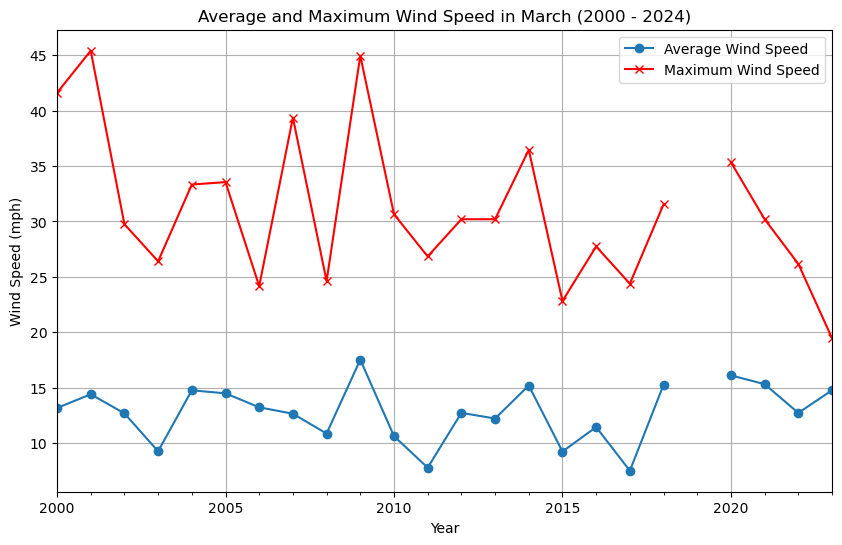

Missing Data in March:
                STATION                     NAME  LATITUDE  LONGITUDE  \
DATE                                                                    
2009-03-12  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788   
2016-03-26  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788   
2017-03-17  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788   
2018-03-08  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788   
2020-03-19  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788   

            ELEVATION  AWND AWND_ATTRIBUTES  FMTM FMTM_ATTRIBUTES    PGTM  \
DATE                                                                        
2009-03-12        5.7   NaN             NaN   NaN             NaN   926.0   
2016-03-26        5.7   NaN             NaN   NaN             NaN  1633.0   
2017-03-17        5.7   NaN             NaN   NaN             NaN  1514.0   
2018-03-08        5.7   NaN             NaN   NaN             NaN   126.0   
202

In [54]:
##March Winds 
# Filter March data across all years
march_data = data[data.index.month == 3]

# Resample to get the average for each March
march_monthly_avg = march_data.resample('A')['AWND'].mean()

# Calculate the maximum wind speed for each March
march_monthly_max = march_data.resample('A')['AWND'].max()

# Plotting both average and maximum wind speeds
plt.figure(figsize=(10, 6))

# Plot average wind speeds
march_monthly_avg.plot(kind='line', marker='o', label='Average Wind Speed')

# Plot maximum wind speeds
march_monthly_max.plot(kind='line', marker='x', color='red', label='Maximum Wind Speed')

plt.title('Average and Maximum Wind Speed in March (2000 - 2024)')
plt.xlabel('Year')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.grid(True)
plt.show()

# Assuming 'data' is already loaded and filtered for March as per previous code
march_data = data[data.index.month == 3]

# Check for missing data in the 'AWND' column
missing_data = march_data[march_data['AWND'].isnull()]

# Print out the missing data
print("Missing Data in March:")
print(missing_data)

# Additionally, you can check for any large gaps between dates
date_gaps = march_data.index.to_series().diff().sort_values(ascending=False).head()

# Print out the largest gaps between dates
print("\nLargest Gaps Between Dates:")
print(date_gaps)

# You may also want to inspect the rows around the first large gap
if not date_gaps.empty:
    largest_gap = date_gaps.index[0]
    surrounding_data = march_data.loc[largest_gap - pd.Timedelta(days=5):largest_gap + pd.Timedelta(days=5)]

    print("\nData around the largest gap:")
    print(surrounding_data)


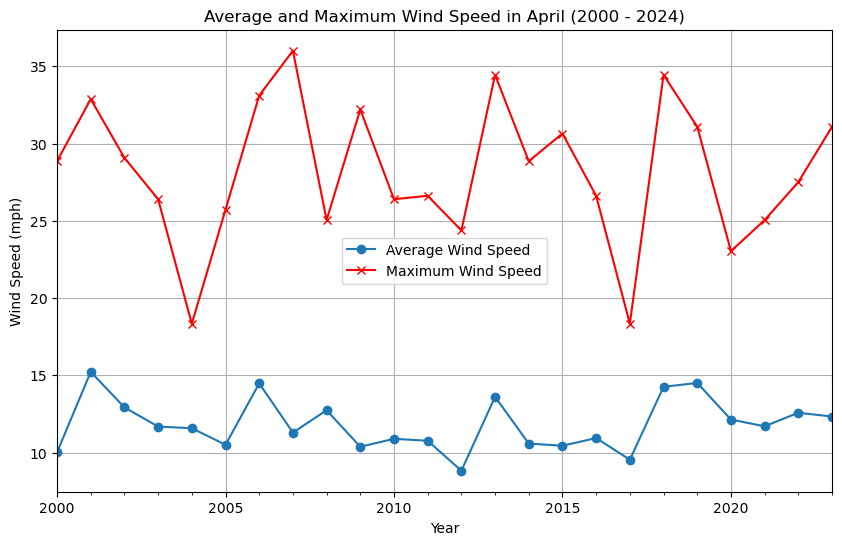

In [15]:
#April 
##March Winds 
# Filter April data across all years
april_data = data[data.index.month == 4]

# Resample to get the average for each April
april_monthly_avg = april_data.resample('A')['AWND'].mean()

# Calculate the maximum wind speed for each March
april_monthly_max = april_data.resample('A')['AWND'].max()

# Plotting both average and maximum wind speeds
plt.figure(figsize=(10, 6))

# Plot average wind speeds
april_monthly_avg.plot(kind='line', marker='o', label='Average Wind Speed')

# Plot maximum wind speeds
april_monthly_max.plot(kind='line', marker='x', color='red', label='Maximum Wind Speed')

plt.title('Average and Maximum Wind Speed in April (2000 - 2024)')
plt.xlabel('Year')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.grid(True)
plt.show()

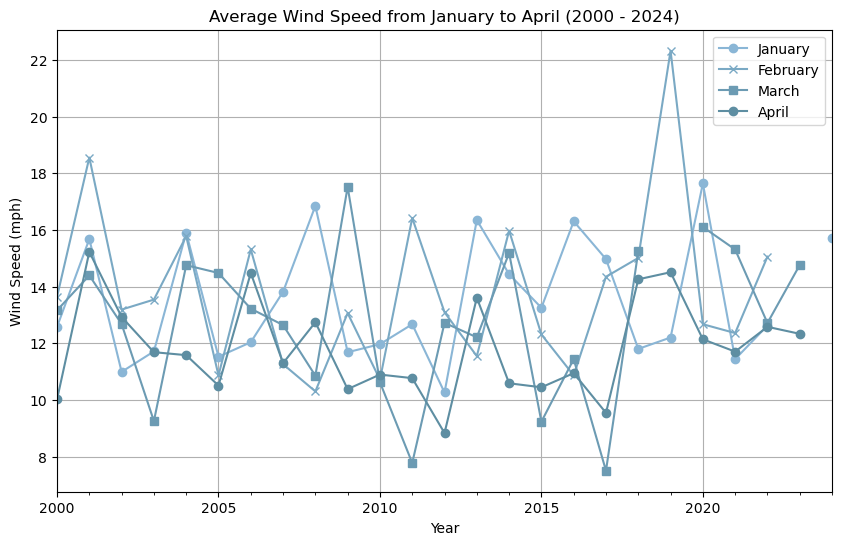

In [38]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Define different shades of light blue
light_blue_palette = ['#8AB6D6', '#7AA9C4', '#6C9BB3', '#5E8EA2']

# Plot average wind speeds for each month with different shades of light blue
january_monthly_avg.plot(kind='line', marker='o', label='January', color=light_blue_palette[0])
february_monthly_avg.plot(kind='line', marker='x', label='February', color=light_blue_palette[1])
march_monthly_avg.plot(kind='line', marker='s', label='March', color=light_blue_palette[2])
april_monthly_avg.plot(kind='line', marker='o', label='April', color=light_blue_palette[3])

plt.title('Average Wind Speed from January to April (2000 - 2024)')
plt.xlabel('Year')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
import pandas as pd
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, ColumnDataSource, CheckboxButtonGroup, CustomJS
from bokeh.layouts import column

# Sample data generation for debugging purposes (replace with your actual data)
dates = pd.date_range('2000', '2024', freq='YS')
january_monthly_avg = pd.Series(range(len(dates)), index=dates)
february_monthly_avg = pd.Series(range(len(dates)), index=dates)
march_monthly_avg = pd.Series(range(len(dates)), index=dates)
april_monthly_avg = pd.Series(range(len(dates)), index=dates)

# Check data
print("January data:", january_monthly_avg.head())
print("February data:", february_monthly_avg.head())
print("March data:", march_monthly_avg.head())
print("April data:", april_monthly_avg.head())

# Check for NaN values
print("NaN check:")
print("January NaN count:", january_monthly_avg.isna().sum())
print("February NaN count:", february_monthly_avg.isna().sum())
print("March NaN count:", march_monthly_avg.isna().sum())
print("April NaN count:", april_monthly_avg.isna().sum())

# Prepare the data
data = {
    'Year': january_monthly_avg.index.year,
    'January': january_monthly_avg.values,
    'February': february_monthly_avg.values,
    'March': march_monthly_avg.values,
    'April': april_monthly_avg.values
}
source = ColumnDataSource(data)

# Create a new interactive plot
p = figure(title='Average Wind Speed from January to April (2000 - 2024)', 
           x_axis_label='Year', y_axis_label='Wind Speed (mph)', 
           x_range=(str(data['Year'][0]), str(data['Year'][-1])), tools="")

# Add lines for each month
colors = ['#8AB6D6', '#7AA9C4', '#6C9BB3', '#5E8EA2']
months = ['January', 'February', 'March', 'April']
for month, color in zip(months, colors):
    p.line(x='Year', y=month, source=source, color=color, legend_label=month)
    p.circle(x='Year', y=month, source=source, color=color, fill_alpha=0.1, size=10)

# Add hover tool
hover = HoverTool(tooltips=[('Year', '@Year'), ('Value', '@$name')])
p.add_tools(hover)

# Create checkbox buttons for interactivity
checkbox_button_group = CheckboxButtonGroup(labels=months, active=list(range(len(months))))
checkbox_callback = CustomJS(args=dict(renderers=p.renderers, source=source), code="""
    for (var i = 0; i < renderers.length; i++) {
        renderers[i].visible = cb_obj.active.includes(i);
    }
""")
checkbox_button_group.js_on_click(checkbox_callback)

# Layout and show
layout = column(checkbox_button_group, p)
output_file("interactive_wind_speed_plot.html")
show(layout)

# Check if HTML file is generated
import os
print("Check if HTML file exists:", os.path.isfile("interactive_wind_speed_plot.html"))


January data: 2000-01-01    0
2001-01-01    1
2002-01-01    2
2003-01-01    3
2004-01-01    4
Freq: AS-JAN, dtype: int64
February data: 2000-01-01    0
2001-01-01    1
2002-01-01    2
2003-01-01    3
2004-01-01    4
Freq: AS-JAN, dtype: int64
March data: 2000-01-01    0
2001-01-01    1
2002-01-01    2
2003-01-01    3
2004-01-01    4
Freq: AS-JAN, dtype: int64
April data: 2000-01-01    0
2001-01-01    1
2002-01-01    2
2003-01-01    3
2004-01-01    4
Freq: AS-JAN, dtype: int64
NaN check:
January NaN count: 0
February NaN count: 0
March NaN count: 0
April NaN count: 0


Check if HTML file exists: True


In [48]:
# Check the type of the index and values
print(type(january_monthly_avg.index), type(january_monthly_avg.values))

# Display the first few rows of the data to confirm its structure
print(january_monthly_avg.head())


<class 'pandas.core.indexes.datetimes.DatetimeIndex'> <class 'numpy.ndarray'>
2000-12-31    0
2001-12-31    1
2002-12-31    2
2003-12-31    3
2004-12-31    4
Freq: A-DEC, dtype: int64


In [78]:
##Interactive Map code works with the hovering feature 

import pandas as pd
from bokeh.plotting import figure, show, output_file
from bokeh.models import CheckboxGroup, CustomJS, HoverTool
from bokeh.layouts import column
from bokeh.io import output_notebook

# Load and process your data
data = pd.read_csv('KivalinaWeatherdata.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

def get_monthly_data(month):
    month_data = data[data.index.month == month]
    monthly_avg = month_data.resample('A')['AWND'].mean()
    monthly_max = month_data.resample('A')['AWND'].max()
    return monthly_avg.to_frame(name='AWND'), monthly_max.to_frame(name='AWND')

# Create a Bokeh plot
plot = figure(title="Wind Speed Data", x_axis_label='Year', y_axis_label='Wind Speed (mph)',
              x_axis_type='datetime', tools="pan,wheel_zoom,box_zoom,reset")

# Plot each month's data
colors = ['blue', 'green', 'red', 'purple']
legend_labels = ['January', 'February', 'March', 'April']
lines = []

for i, month in enumerate(range(1, 5)):
    avg, max = get_monthly_data(month)
    avg['type'] = 'Average'
    max['type'] = 'Maximum'
    avg['month'] = legend_labels[i]
    max['month'] = legend_labels[i]
    avg_source = ColumnDataSource(avg.reset_index())
    max_source = ColumnDataSource(max.reset_index())
    
    avg_line = plot.line('DATE', 'AWND', line_width=2, color=colors[i], legend_label=f'Avg {legend_labels[i]}', source=avg_source)
    max_line = plot.line('DATE', 'AWND', line_width=2, color=colors[i], line_dash='dashed', legend_label=f'Max {legend_labels[i]}', source=max_source)
    lines.extend([avg_line, max_line])

# Create the hover tool
hover = HoverTool(tooltips=[
    ("Type", "@type"),
    ("Month", "@month"),
    ("Date", "@DATE{%F}"),
    ("Wind Speed", "@AWND mph")
], formatters={'@DATE': 'datetime'}, mode='vline')

plot.add_tools(hover)

# Create CheckboxGroup
checkbox_group = CheckboxGroup(labels=["January", "February", "March", "April"], active=list(range(4)))
checkbox_group.js_on_click(CustomJS(args=dict(lines=lines, checkbox_group=checkbox_group), code="""
    for (var i = 0; i < lines.length; i++) {
        lines[i].visible = checkbox_group.active.includes(Math.floor(i / 2));
    }
"""))

layout = column(checkbox_group, plot)

# Show plot
output_notebook()  # To output the plot in the notebook
show(layout)


Loading BokehJS ...

In [79]:
import pandas as pd
from bokeh.plotting import figure, show, output_file
from bokeh.models import CheckboxGroup, CustomJS, HoverTool, ColumnDataSource
from bokeh.layouts import column
from bokeh.io import output_notebook

# Load and process your data
data = pd.read_csv('KivalinaWeatherdata.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

def get_monthly_data(month):
    month_data = data[data.index.month == month]
    monthly_avg = month_data.resample('A')['AWND'].mean()
    monthly_max = month_data.resample('A')['AWND'].max()
    return monthly_avg.to_frame(name='AWND'), monthly_max.to_frame(name='AWND')

# Create a Bokeh plot
plot = figure(title="Wind Speed Data", x_axis_label='Year', y_axis_label='Wind Speed (mph)',
              x_axis_type='datetime', tools="pan,wheel_zoom,box_zoom,reset")

# Plot each month's data
colors = ['blue', 'green', 'red', 'purple']
legend_labels = ['January', 'February', 'March', 'April']
lines = []

for i, month in enumerate(range(1, 5)):
    avg, max = get_monthly_data(month)
    avg['type'] = 'Average'
    max['type'] = 'Maximum'
    avg['month'] = legend_labels[i]
    max['month'] = legend_labels[i]
    avg_source = ColumnDataSource(avg.reset_index())
    max_source = ColumnDataSource(max.reset_index())
    
    avg_line = plot.line('DATE', 'AWND', line_width=2, color=colors[i], legend_label=f'Avg {legend_labels[i]}', source=avg_source)
    max_line = plot.line('DATE', 'AWND', line_width=2, color=colors[i], line_dash='dashed', legend_label=f'Max {legend_labels[i]}', source=max_source)
    lines.extend([avg_line, max_line])

# Create the hover tool
hover = HoverTool(tooltips=[
    ("Type", "@type"),
    ("Month", "@month"),
    ("Date", "@DATE{%F}"),
    ("Wind Speed", "@AWND mph")
], formatters={'@DATE': 'datetime'}, mode='vline')

plot.add_tools(hover)

# Create CheckboxGroup
checkbox_group = CheckboxGroup(labels=["January", "February", "March", "April"], active=list(range(4)))
checkbox_group.js_on_click(CustomJS(args=dict(lines=lines, checkbox_group=checkbox_group), code="""
    for (var i = 0; i < lines.length; i++) {
        lines[i].visible = checkbox_group.active.includes(Math.floor(i / 2));
    }
"""))

layout = column(checkbox_group, plot)

# Specify the output HTML file
output_file("wind_speed_data.html")

# Show plot
show(layout)  # Will save and show the plot in an HTML file


In [64]:
print(data.head())

                STATION                     NAME  LATITUDE  LONGITUDE  \
DATE                                                                    
2000-01-01  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788   
2000-01-02  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788   
2000-01-03  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788   
2000-01-04  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788   
2000-01-05  USW00026642  KIVALINA AIRPORT, AK US   67.7306 -164.54788   

            ELEVATION   AWND AWND_ATTRIBUTES    FMTM FMTM_ATTRIBUTES    PGTM  \
DATE                                                                           
2000-01-01        5.7  14.09             ,,W  2357.0             ,,W  2357.0   
2000-01-02        5.7  13.42             ,,W  1135.0             ,,W  1134.0   
2000-01-03        5.7   4.92             ,,W  1239.0             ,,W  1226.0   
2000-01-04        5.7   3.36             ,,W  2228.0             ,,W  2227.0   
2000-01-

In [72]:
##Dominant Wind Directions - January 
import pandas as pd

def degrees_to_cardinal(d):
    """
    Converts degrees to cardinal directions with primary and secondary intercardinal directions only.
    """
    if d >= 337.5 or d < 22.5:
        return 'N'
    elif 22.5 <= d < 67.5:
        return 'NE'
    elif 67.5 <= d < 112.5:
        return 'E'
    elif 112.5 <= d < 157.5:
        return 'SE'
    elif 157.5 <= d < 202.5:
        return 'S'
    elif 202.5 <= d < 247.5:
        return 'SW'
    elif 247.5 <= d < 292.5:
        return 'W'
    elif 292.5 <= d < 337.5:
        return 'NW'

# Filter for January data
january_data = data[data.index.month == 1]

# Calculate the most common (mode) wind direction for each January
january_dominant_wind = january_data.groupby(january_data.index.year)['WDF2'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Create a DataFrame to hold the year and the dominant wind direction
dominant_wind_direction_df = pd.DataFrame({
    'Year': january_dominant_wind.index,
    'Dominant Wind Direction': january_dominant_wind.values
})

# Add a column with the cardinal direction
dominant_wind_direction_df['Cardinal Direction'] = dominant_wind_direction_df['Dominant Wind Direction'].apply(degrees_to_cardinal)

# Display the DataFrame
print(dominant_wind_direction_df)


    Year  Dominant Wind Direction Cardinal Direction
0   2000                     10.0                  N
1   2001                     20.0                  N
2   2002                     10.0                  N
3   2003                     70.0                  E
4   2004                     20.0                  N
5   2005                     20.0                  N
6   2006                     10.0                  N
7   2007                     20.0                  N
8   2008                     30.0                 NE
9   2009                     20.0                  N
10  2010                     20.0                  N
11  2011                     20.0                  N
12  2012                    160.0                  S
13  2013                     30.0                 NE
14  2014                     20.0                  N
15  2015                     20.0                  N
16  2016                     20.0                  N
17  2017                     20.0             

In [73]:
##Dominant wind direction February 
# Filter for February data
february_data = data[data.index.month == 2]

# Calculate the most common (mode) wind direction for each February
february_dominant_wind = february_data.groupby(february_data.index.year)['WDF2'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Create a DataFrame to hold the year and the dominant wind direction for February
dominant_wind_direction_df = pd.DataFrame({
    'Year': february_dominant_wind.index,
    'Dominant Wind Direction': february_dominant_wind.values
})

# Add a column with the cardinal direction for February
dominant_wind_direction_df['Cardinal Direction'] = dominant_wind_direction_df['Dominant Wind Direction'].apply(degrees_to_cardinal)

# Display the DataFrame for February
print(dominant_wind_direction_df)


    Year  Dominant Wind Direction Cardinal Direction
0   2000                     20.0                  N
1   2001                    100.0                  E
2   2002                     70.0                  E
3   2003                     10.0                  N
4   2004                     20.0                  N
5   2005                     10.0                  N
6   2006                     70.0                  E
7   2007                     60.0                 NE
8   2008                     20.0                  N
9   2009                     30.0                 NE
10  2010                     30.0                 NE
11  2011                    140.0                 SE
12  2012                     20.0                  N
13  2013                     20.0                  N
14  2014                     30.0                 NE
15  2015                    160.0                  S
16  2016                     20.0                  N
17  2017                     20.0             

In [74]:
##Dominant wind direction March
# Filter for March data
mar_data = data[data.index.month == 3]

# Calculate the most common (mode) wind direction for each February
mar_dominant_wind = mar_data.groupby(mar_data.index.year)['WDF2'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Create a DataFrame to hold the year and the dominant wind direction for February
dominant_wind_direction_df = pd.DataFrame({
    'Year': mar_dominant_wind.index,
    'Dominant Wind Direction': mar_dominant_wind.values
})

# Add a column with the cardinal direction for March 
dominant_wind_direction_df['Cardinal Direction'] = dominant_wind_direction_df['Dominant Wind Direction'].apply(degrees_to_cardinal)

# Display the DataFrame for February
print(dominant_wind_direction_df)


    Year  Dominant Wind Direction Cardinal Direction
0   2000                     20.0                  N
1   2001                     70.0                  E
2   2002                     80.0                  E
3   2003                     20.0                  N
4   2004                     20.0                  N
5   2005                     20.0                  N
6   2006                     80.0                  E
7   2007                     30.0                 NE
8   2008                     20.0                  N
9   2009                     20.0                  N
10  2010                    310.0                 NW
11  2011                     80.0                  E
12  2012                     20.0                  N
13  2013                     20.0                  N
14  2014                     20.0                  N
15  2015                     20.0                  N
16  2016                     20.0                  N
17  2017                    340.0             

In [75]:
##Dominant wind direction April 
# Filter for April data
apr_data = data[data.index.month == 4]

# Calculate the most common (mode) wind direction for each February
apr_dominant_wind = apr_data.groupby(apr_data.index.year)['WDF2'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Create a DataFrame to hold the year and the dominant wind direction for February
dominant_wind_direction_df = pd.DataFrame({
    'Year': apr_dominant_wind.index,
    'Dominant Wind Direction': apr_dominant_wind.values
})

# Add a column with the cardinal direction for April 
dominant_wind_direction_df['Cardinal Direction'] = dominant_wind_direction_df['Dominant Wind Direction'].apply(degrees_to_cardinal)

# Display the DataFrame for February
print(dominant_wind_direction_df)


    Year  Dominant Wind Direction Cardinal Direction
0   2000                     20.0                  N
1   2001                     10.0                  N
2   2002                    150.0                 SE
3   2003                     70.0                  E
4   2004                     10.0                  N
5   2005                     20.0                  N
6   2006                     10.0                  N
7   2007                     20.0                  N
8   2008                     70.0                  E
9   2009                     20.0                  N
10  2010                     20.0                  N
11  2011                     20.0                  N
12  2012                     20.0                  N
13  2013                     10.0                  N
14  2014                     20.0                  N
15  2015                     20.0                  N
16  2016                     20.0                  N
17  2017                     80.0             

In [76]:
#July 
##Dominant wind direction April 
# Filter for April data
jul_data = data[data.index.month == 6]

# Calculate the most common (mode) wind direction for each February
jul_dominant_wind = jul_data.groupby(jul_data.index.year)['WDF2'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Create a DataFrame to hold the year and the dominant wind direction for February
dominant_wind_direction_df = pd.DataFrame({
    'Year': apr_dominant_wind.index,
    'Dominant Wind Direction': jul_dominant_wind.values
})

# Add a column with the cardinal direction for July
dominant_wind_direction_df['Cardinal Direction'] = dominant_wind_direction_df['Dominant Wind Direction'].apply(degrees_to_cardinal)

# Display the DataFrame for February
print(dominant_wind_direction_df)


    Year  Dominant Wind Direction Cardinal Direction
0   2000                    290.0                  W
1   2001                     10.0                  N
2   2002                    290.0                  W
3   2003                    290.0                  W
4   2004                    290.0                  W
5   2005                    290.0                  W
6   2006                    150.0                 SE
7   2007                    160.0                  S
8   2008                    150.0                 SE
9   2009                    300.0                 NW
10  2010                    290.0                  W
11  2011                     20.0                  N
12  2012                    290.0                  W
13  2013                    300.0                 NW
14  2014                    290.0                  W
15  2015                     20.0                  N
16  2016                    300.0                 NW
17  2017                    300.0             

In [80]:
#streamlit 
import streamlit as st
import pandas as pd
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, CheckboxGroup, CustomJS, HoverTool
from bokeh.layouts import column

# Load and process your data
data = pd.read_csv('KivalinaWeatherdata.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

def get_monthly_data(month):
    month_data = data[data.index.month == month]
    monthly_avg = month_data.resample('A')['AWND'].mean()
    monthly_max = month_data.resample('A')['AWND'].max()
    return monthly_avg.to_frame(name='AWND'), monthly_max.to_frame(name='AWND')

# Create a Bokeh plot
plot = figure(title="Wind Speed Data", x_axis_label='Year', y_axis_label='Wind Speed (mph)',
              x_axis_type='datetime', tools="pan,wheel_zoom,box_zoom,reset")

# Plot each month's data
colors = ['blue', 'green', 'red', 'purple']
legend_labels = ['January', 'February', 'March', 'April']
lines = []

for i, month in enumerate(range(1, 5)):
    avg, max = get_monthly_data(month)
    avg['type'] = 'Average'
    max['type'] = 'Maximum'
    avg['month'] = legend_labels[i]
    max['month'] = legend_labels[i]
    avg_source = ColumnDataSource(avg.reset_index())
    max_source = ColumnDataSource(max.reset_index())
    
    avg_line = plot.line('DATE', 'AWND', line_width=2, color=colors[i], legend_label=f'Avg {legend_labels[i]}', source=avg_source)
    max_line = plot.line('DATE', 'AWND', line_width=2, color=colors[i], line_dash='dashed', legend_label=f'Max {legend_labels[i]}', source=max_source)
    lines.extend([avg_line, max_line])

# Create the hover tool
hover = HoverTool(tooltips=[
    ("Type", "@type"),
    ("Month", "@month"),
    ("Date", "@DATE{%F}"),
    ("Wind Speed", "@AWND mph")
], formatters={'@DATE': 'datetime'}, mode='vline')

plot.add_tools(hover)

# Create CheckboxGroup
checkbox_group = CheckboxGroup(labels=["January", "February", "March", "April"], active=list(range(4)))
checkbox_group.js_on_click(CustomJS(args=dict(lines=lines, checkbox_group=checkbox_group), code="""
    for (var i = 0; i < lines.length; i++) {
        lines[i].visible = checkbox_group.active.includes(Math.floor(i / 2));
    }
"""))

layout = column(checkbox_group, plot)

# Use Streamlit to render the plot
st.bokeh_chart(layout)


2024-01-31 23:32:55.466 
  command:

    streamlit run /Users/anastringer_1/miniconda3/envs/is2book_p39_env/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()